<a href="https://colab.research.google.com/github/AndreiAf02/Data-Balancing-in-ML-DNN/blob/main/Credit_Default_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Default of Credit Card Clients Dataset - ML Classification with Random Under/Oversampling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# !pip install pytorch-tabnet

# from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Data taken from the UCI Machine Learning repository [here](https://doi.org/10.24432/C55S3H):

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

# metadata
print(default_of_credit_card_clients.metadata)

# variable information
print(default_of_credit_card_clients.variables)



{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [ ]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
data2 = pd.concat([X_scaled, y], axis=1)
data2

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,Y
0,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.0,0.500000,0.333333,0.310345,0.2,0.2,0.2,0.2,0.2,...,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0
29996,0.141414,0.0,0.500000,0.666667,0.379310,0.1,0.1,0.1,0.1,0.2,...,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0
29997,0.020202,0.0,0.333333,0.666667,0.275862,0.6,0.5,0.4,0.1,0.2,...,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1
29998,0.070707,0.0,0.500000,0.333333,0.344828,0.3,0.1,0.2,0.2,0.2,...,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1


In [ ]:
data2['Y'].value_counts()

,count
Y,
0,23364
1,6636


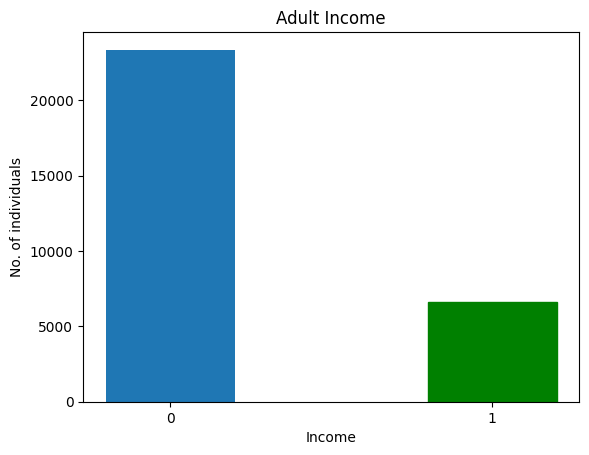

In [ ]:
barlist = plt.bar([str(0),str(1)], data2['Y'].value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Income")
plt.ylabel("No. of individuals")
plt.title("Adult Income")
plt.show()

# Full Dataset:

## DNN Classification Algorithm:

In [ ]:
def create_dnn_model(input_shape):
  model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
    ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

  return model



def train_and_evaluate_ml(model, X_train, X_test, y_train, y_test, domain):

    # time_start = perf_counter()

    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)

    fpr = conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1])
    tnr = 1-fpr

    fnr = conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[1][1])
    tpr = 1 - fnr
    print('FPR', fpr, 'TPR:', tpr, 'FNR:', fnr, 'TNR:', tnr)

    # conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # ## To deactivate after!!! ----------------------------------------
    # ##### Plot ROC curve and Confusion Matrix side by side
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # # ROC Curve
    # ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    # ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    # ax1.set_xlabel('False Positive Rate')
    # ax1.set_ylabel('True Positive Rate')
    # ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    # ax1.legend(loc='lower right')
    # ax1.grid()

    # # Confusion Matrix
    # conf_disp.plot(ax=ax2, cmap='Blues')
    # ax2.set_title('Confusion Matrix')
    # plt.tight_layout()
    # plt.show()
    ## To deactivate after!!! ----------------------------------------

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")

    return fpr, tnr, fnr, tpr


In [ ]:
X_cleaned = data2.iloc[:, :-1]
y_cleaned = data2.iloc[:, -1]

scaler = MinMaxScaler()
scaler.fit(X_cleaned)
X_scaled = scaler.transform(X_cleaned)
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.20, random_state=0)
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (24000, 23)
y_train: (24000,)
X_test: (6000, 23)
y_test: (6000,)


In [ ]:
## Establishing the Under/Oversampling values and imbalance ratio:

undersample_size = min(data_train.iloc[:,-1].value_counts())
oversample_size = max(data_train.iloc[:,-1].value_counts())


data_majority = data_train[data_train.iloc[:,-1]==0]
data_minority = data_train[data_train.iloc[:,-1]==1]

print(undersample_size)
print(oversample_size)

5339
18661


## Imbalanced (Original) data:

In [ ]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    model_source = create_dnn_model(X_train.shape[1])
    result_imbalanced = train_and_evaluate_ml(model_source, X_train, X_test, y_train, y_test, "Source")
    # result_TL_imbalanced = Transductive_TL(model_source, X_T_full, y_T_full, "Target")

    FPR.append(result_imbalanced[0])
    TNR.append(result_imbalanced[1])
    FNR.append(result_imbalanced[2])
    TPR.append(result_imbalanced[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']
# print(ParamFit)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6158 - loss: 0.5128 - val_AUC: 0.7233 - val_loss: 0.4670
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7310 - loss: 0.4558 - val_AUC: 0.7434 - val_loss: 0.4574
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7417 - loss: 0.4524 - val_AUC: 0.7436 - val_loss: 0.4551
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7447 - loss: 0.4493 - val_AUC: 0.7535 - val_loss: 0.4515
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7496 - loss: 0.4465 - val_AUC: 0.7538 - val_loss: 0.4505
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7518 - loss: 0.4455 - val_AUC: 0.7579 - val_loss: 0.4526
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7582 - loss: 0.4434 - val_AUC: 0.7633 - val_loss: 0.4474
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7648 - loss: 0.4357 - val_AUC: 0.7670 - val_loss: 0.4473
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7665 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6134 - loss: 0.5148 - val_AUC: 0.7380 - val_loss: 0.4620
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7422 - loss: 0.4522 - val_AUC: 0.7419 - val_loss: 0.4581
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7463 - loss: 0.4466 - val_AUC: 0.7452 - val_loss: 0.4579
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7461 - loss: 0.4476 - val_AUC: 0.7544 - val_loss: 0.4520
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7546 - loss: 0.4476 - val_AUC: 0.7566 - val_loss: 0.4510
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7564 - loss: 0.4389 - val_AUC: 0.7595 - val_loss: 0.4486
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7677 - loss: 0.4305 - val_AUC: 0.7632 - val_loss: 0.4512
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7655 - loss: 0.4419 - val_AUC: 0.7586 - val_loss: 0.4488
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7727 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6389 - loss: 0.5055 - val_AUC: 0.7334 - val_loss: 0.4632
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7313 - loss: 0.4599 - val_AUC: 0.7462 - val_loss: 0.4569
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7476 - loss: 0.4408 - val_AUC: 0.7517 - val_loss: 0.4519
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7443 - loss: 0.4485 - val_AUC: 0.7548 - val_loss: 0.4496
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7595 - loss: 0.4375 - val_AUC: 0.7592 - val_loss: 0.4486
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7569 - loss: 0.4353 - val_AUC: 0.7644 - val_loss: 0.4544
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7540 - loss: 0.4405 - val_AUC: 0.7612 - val_loss: 0.4457
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7683 - loss: 0.4402 - val_AUC: 0.7581 - val_loss: 0.4470
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7672 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6403 - loss: 0.5067 - val_AUC: 0.7251 - val_loss: 0.4682
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7308 - loss: 0.4555 - val_AUC: 0.7405 - val_loss: 0.4632
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7435 - loss: 0.4510 - val_AUC: 0.7513 - val_loss: 0.4621
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7460 - loss: 0.4447 - val_AUC: 0.7517 - val_loss: 0.4512
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7501 - loss: 0.4457 - val_AUC: 0.7582 - val_loss: 0.4563
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7604 - loss: 0.4345 - val_AUC: 0.7610 - val_loss: 0.4484
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7625 - loss: 0.4358 - val_AUC: 0.7626 - val_loss: 0.4483
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7593 - loss: 0.4403 - val_AUC: 0.7672 - val_loss: 0.4468
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7707 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6098 - loss: 0.5263 - val_AUC: 0.7292 - val_loss: 0.4654
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7300 - loss: 0.4630 - val_AUC: 0.7415 - val_loss: 0.4635
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7370 - loss: 0.4529 - val_AUC: 0.7483 - val_loss: 0.4555
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7558 - loss: 0.4418 - val_AUC: 0.7570 - val_loss: 0.4523
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7420 - loss: 0.4516 - val_AUC: 0.7545 - val_loss: 0.4499
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7544 - loss: 0.4362 - val_AUC: 0.7623 - val_loss: 0.4474
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7589 - loss: 0.4350 - val_AUC: 0.7643 - val_loss: 0.4503
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7651 - loss: 0.4419 - val_AUC: 0.7688 - val_loss: 0.4493
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7665 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6352 - loss: 0.5112 - val_AUC: 0.7326 - val_loss: 0.4642
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7337 - loss: 0.4636 - val_AUC: 0.7378 - val_loss: 0.4578
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7362 - loss: 0.4496 - val_AUC: 0.7495 - val_loss: 0.4619
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7447 - loss: 0.4487 - val_AUC: 0.7526 - val_loss: 0.4573
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7527 - loss: 0.4438 - val_AUC: 0.7538 - val_loss: 0.4524
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7539 - loss: 0.4419 - val_AUC: 0.7633 - val_loss: 0.4518
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7628 - loss: 0.4360 - val_AUC: 0.7644 - val_loss: 0.4549
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7682 - loss: 0.4388 - val_AUC: 0.7649 - val_loss: 0.4468
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7605 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.5830 - loss: 0.5402 - val_AUC: 0.7243 - val_loss: 0.4698
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7272 - loss: 0.4597 - val_AUC: 0.7425 - val_loss: 0.4585
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7405 - loss: 0.4489 - val_AUC: 0.7475 - val_loss: 0.4540
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7414 - loss: 0.4450 - val_AUC: 0.7508 - val_loss: 0.4548
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7448 - loss: 0.4464 - val_AUC: 0.7576 - val_loss: 0.4494
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7476 - loss: 0.4454 - val_AUC: 0.7598 - val_loss: 0.4478
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7524 - loss: 0.4404 - val_AUC: 0.7626 - val_loss: 0.4476
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7654 - loss: 0.4374 - val_AUC: 0.7623 - val_loss: 0.4553
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7619 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6396 - loss: 0.5066 - val_AUC: 0.7259 - val_loss: 0.4667
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7309 - loss: 0.4591 - val_AUC: 0.7419 - val_loss: 0.4582
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7382 - loss: 0.4480 - val_AUC: 0.7515 - val_loss: 0.4539
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7468 - loss: 0.4391 - val_AUC: 0.7469 - val_loss: 0.4546
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7473 - loss: 0.4480 - val_AUC: 0.7620 - val_loss: 0.4548
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7605 - loss: 0.4383 - val_AUC: 0.7629 - val_loss: 0.4472
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7564 - loss: 0.4409 - val_AUC: 0.7605 - val_loss: 0.4478
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7608 - loss: 0.4310 - val_AUC: 0.7653 - val_loss: 0.4463
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7675 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6130 - loss: 0.5246 - val_AUC: 0.7212 - val_loss: 0.4677
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7333 - loss: 0.4528 - val_AUC: 0.7352 - val_loss: 0.4591
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7452 - loss: 0.4378 - val_AUC: 0.7516 - val_loss: 0.4515
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7449 - loss: 0.4434 - val_AUC: 0.7503 - val_loss: 0.4556
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7557 - loss: 0.4427 - val_AUC: 0.7627 - val_loss: 0.4496
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7538 - loss: 0.4425 - val_AUC: 0.7595 - val_loss: 0.4471
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7580 - loss: 0.4383 - val_AUC: 0.7623 - val_loss: 0.4480
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7595 - loss: 0.4410 - val_AUC: 0.7648 - val_loss: 0.4486
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7709 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6311 - loss: 0.5251 - val_AUC: 0.7367 - val_loss: 0.4670
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7302 - loss: 0.4551 - val_AUC: 0.7420 - val_loss: 0.4572
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7453 - loss: 0.4507 - val_AUC: 0.7464 - val_loss: 0.4592
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7505 - loss: 0.4395 - val_AUC: 0.7406 - val_loss: 0.4677
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7515 - loss: 0.4389 - val_AUC: 0.7550 - val_loss: 0.4506
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7575 - loss: 0.4380 - val_AUC: 0.7548 - val_loss: 0.4509
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7627 - loss: 0.4355 - val_AUC: 0.7607 - val_loss: 0.4502
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7550 - loss: 0.4458 - val_AUC: 0.7605 - val_loss: 0.4507
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7619 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.6233 - loss: 0.5124 - val_AUC: 0.7288 - val_loss: 0.4747
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7313 - loss: 0.4545 - val_AUC: 0.7378 - val_loss: 0.4583
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7373 - loss: 0.4513 - val_AUC: 0.7348 - val_loss: 0.4580
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7463 - loss: 0.4436 - val_AUC: 0.7499 - val_loss: 0.4527
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7557 - loss: 0.4422 - val_AUC: 0.7572 - val_loss: 0.4516
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7506 - loss: 0.4487 - val_AUC: 0.7571 - val_loss: 0.4581
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7595 - loss: 0.4381 - val_AUC: 0.7618 - val_loss: 0.4493
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7573 - loss: 0.4420 - val_AUC: 0.7577 - val_loss: 0.4476
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7636 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6156 - loss: 0.5194 - val_AUC: 0.7191 - val_loss: 0.4691
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7315 - loss: 0.4469 - val_AUC: 0.7387 - val_loss: 0.4619
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7416 - loss: 0.4466 - val_AUC: 0.7492 - val_loss: 0.4567
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7391 - loss: 0.4488 - val_AUC: 0.7523 - val_loss: 0.4566
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7507 - loss: 0.4433 - val_AUC: 0.7482 - val_loss: 0.4569
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7577 - loss: 0.4369 - val_AUC: 0.7609 - val_loss: 0.4494
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7572 - loss: 0.4417 - val_AUC: 0.7596 - val_loss: 0.4492
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7645 - loss: 0.4351 - val_AUC: 0.7632 - val_loss: 0.4560
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7543 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6136 - loss: 0.5418 - val_AUC: 0.7244 - val_loss: 0.4664
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7337 - loss: 0.4531 - val_AUC: 0.7349 - val_loss: 0.4612
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7370 - loss: 0.4522 - val_AUC: 0.7329 - val_loss: 0.4627
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7419 - loss: 0.4508 - val_AUC: 0.7448 - val_loss: 0.4544
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7463 - loss: 0.4414 - val_AUC: 0.7553 - val_loss: 0.4504
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7535 - loss: 0.4445 - val_AUC: 0.7511 - val_loss: 0.4532
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7620 - loss: 0.4392 - val_AUC: 0.7610 - val_loss: 0.4478
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7580 - loss: 0.4400 - val_AUC: 0.7666 - val_loss: 0.4471
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7668 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6232 - loss: 0.5177 - val_AUC: 0.7348 - val_loss: 0.4640
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7391 - loss: 0.4520 - val_AUC: 0.7458 - val_loss: 0.4568
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7449 - loss: 0.4505 - val_AUC: 0.7458 - val_loss: 0.4582
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7475 - loss: 0.4439 - val_AUC: 0.7534 - val_loss: 0.4530
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7520 - loss: 0.4410 - val_AUC: 0.7595 - val_loss: 0.4505
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7575 - loss: 0.4399 - val_AUC: 0.7544 - val_loss: 0.4521
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7650 - loss: 0.4347 - val_AUC: 0.7608 - val_loss: 0.4476
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7681 - loss: 0.4394 - val_AUC: 0.7660 - val_loss: 0.4479
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7606 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6381 - loss: 0.5168 - val_AUC: 0.7192 - val_loss: 0.4702
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7237 - loss: 0.4660 - val_AUC: 0.7377 - val_loss: 0.4619
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7399 - loss: 0.4446 - val_AUC: 0.7524 - val_loss: 0.4548
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7399 - loss: 0.4511 - val_AUC: 0.7582 - val_loss: 0.4502
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7562 - loss: 0.4390 - val_AUC: 0.7576 - val_loss: 0.4484
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7414 - loss: 0.4442 - val_AUC: 0.7596 - val_loss: 0.4486
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7641 - loss: 0.4309 - val_AUC: 0.7649 - val_loss: 0.4465
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7751 - loss: 0.4269 - val_AUC: 0.7647 - val_loss: 0.4474
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7593 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.5987 - loss: 0.5208 - val_AUC: 0.7182 - val_loss: 0.4680
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7177 - loss: 0.4652 - val_AUC: 0.7426 - val_loss: 0.4632
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7376 - loss: 0.4572 - val_AUC: 0.7450 - val_loss: 0.4539
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7471 - loss: 0.4429 - val_AUC: 0.7510 - val_loss: 0.4527
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7529 - loss: 0.4464 - val_AUC: 0.7561 - val_loss: 0.4506
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7588 - loss: 0.4358 - val_AUC: 0.7620 - val_loss: 0.4528
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7588 - loss: 0.4385 - val_AUC: 0.7678 - val_loss: 0.4459
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7690 - loss: 0.4364 - val_AUC: 0.7634 - val_loss: 0.4541
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7611 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6428 - loss: 0.5143 - val_AUC: 0.7359 - val_loss: 0.4631
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7331 - loss: 0.4546 - val_AUC: 0.7528 - val_loss: 0.4596
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7402 - loss: 0.4480 - val_AUC: 0.7515 - val_loss: 0.4523
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7526 - loss: 0.4359 - val_AUC: 0.7574 - val_loss: 0.4558
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7560 - loss: 0.4385 - val_AUC: 0.7612 - val_loss: 0.4509
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7622 - loss: 0.4329 - val_AUC: 0.7592 - val_loss: 0.4488
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7654 - loss: 0.4387 - val_AUC: 0.7659 - val_loss: 0.4460
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7666 - loss: 0.4338 - val_AUC: 0.7648 - val_loss: 0.4515
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7708 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6387 - loss: 0.5088 - val_AUC: 0.7300 - val_loss: 0.4650
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7260 - loss: 0.4634 - val_AUC: 0.7351 - val_loss: 0.4613
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7368 - loss: 0.4473 - val_AUC: 0.7436 - val_loss: 0.4567
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7444 - loss: 0.4435 - val_AUC: 0.7489 - val_loss: 0.4718
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7463 - loss: 0.4425 - val_AUC: 0.7561 - val_loss: 0.4500
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7538 - loss: 0.4395 - val_AUC: 0.7573 - val_loss: 0.4488
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7675 - loss: 0.4329 - val_AUC: 0.7632 - val_loss: 0.4477
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7659 - loss: 0.4391 - val_AUC: 0.7658 - val_loss: 0.4467
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7599 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6155 - loss: 0.5139 - val_AUC: 0.7289 - val_loss: 0.4667
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7386 - loss: 0.4549 - val_AUC: 0.7290 - val_loss: 0.4723
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7325 - loss: 0.4551 - val_AUC: 0.7531 - val_loss: 0.4535
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7470 - loss: 0.4475 - val_AUC: 0.7500 - val_loss: 0.4530
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7531 - loss: 0.4388 - val_AUC: 0.7542 - val_loss: 0.4538
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7550 - loss: 0.4446 - val_AUC: 0.7592 - val_loss: 0.4504
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7618 - loss: 0.4399 - val_AUC: 0.7591 - val_loss: 0.4498
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7634 - loss: 0.4328 - val_AUC: 0.7612 - val_loss: 0.4542
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7716 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6082 - loss: 0.5295 - val_AUC: 0.7248 - val_loss: 0.4698
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7207 - loss: 0.4668 - val_AUC: 0.7385 - val_loss: 0.4594
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7400 - loss: 0.4429 - val_AUC: 0.7539 - val_loss: 0.4576
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7443 - loss: 0.4436 - val_AUC: 0.7559 - val_loss: 0.4509
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7494 - loss: 0.4441 - val_AUC: 0.7565 - val_loss: 0.4507
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7643 - loss: 0.4373 - val_AUC: 0.7641 - val_loss: 0.4478
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7665 - loss: 0.4307 - val_AUC: 0.7606 - val_loss: 0.4544
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7620 - loss: 0.4402 - val_AUC: 0.7581 - val_loss: 0.4487
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7634 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6144 - loss: 0.5338 - val_AUC: 0.7265 - val_loss: 0.4653
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7341 - loss: 0.4578 - val_AUC: 0.7449 - val_loss: 0.4564
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7401 - loss: 0.4504 - val_AUC: 0.7530 - val_loss: 0.4536
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7522 - loss: 0.4444 - val_AUC: 0.7615 - val_loss: 0.4493
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7563 - loss: 0.4384 - val_AUC: 0.7603 - val_loss: 0.4493
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7654 - loss: 0.4333 - val_AUC: 0.7606 - val_loss: 0.4514
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7651 - loss: 0.4336 - val_AUC: 0.7647 - val_loss: 0.4475
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7644 - loss: 0.4340 - val_AUC: 0.7641 - val_loss: 0.4493
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7662 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6438 - loss: 0.5164 - val_AUC: 0.7329 - val_loss: 0.4623
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7388 - loss: 0.4466 - val_AUC: 0.7501 - val_loss: 0.4558
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7410 - loss: 0.4470 - val_AUC: 0.7570 - val_loss: 0.4501
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7562 - loss: 0.4336 - val_AUC: 0.7543 - val_loss: 0.4497
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7547 - loss: 0.4402 - val_AUC: 0.7647 - val_loss: 0.4443
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7633 - loss: 0.4370 - val_AUC: 0.7630 - val_loss: 0.4473
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7702 - loss: 0.4339 - val_AUC: 0.7691 - val_loss: 0.4444
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7738 - loss: 0.4237 - val_AUC: 0.7703 - val_loss: 0.4424
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7723 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6175 - loss: 0.5196 - val_AUC: 0.7278 - val_loss: 0.4686
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7288 - loss: 0.4644 - val_AUC: 0.7384 - val_loss: 0.4578
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7464 - loss: 0.4466 - val_AUC: 0.7483 - val_loss: 0.4572
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7435 - loss: 0.4499 - val_AUC: 0.7444 - val_loss: 0.4558
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7523 - loss: 0.4370 - val_AUC: 0.7551 - val_loss: 0.4497
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7552 - loss: 0.4364 - val_AUC: 0.7556 - val_loss: 0.4489
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7517 - loss: 0.4423 - val_AUC: 0.7593 - val_loss: 0.4497
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7615 - loss: 0.4366 - val_AUC: 0.7594 - val_loss: 0.4494
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7675 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6111 - loss: 0.5247 - val_AUC: 0.7225 - val_loss: 0.4692
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7325 - loss: 0.4614 - val_AUC: 0.7428 - val_loss: 0.4683
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7417 - loss: 0.4517 - val_AUC: 0.7409 - val_loss: 0.4577
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7535 - loss: 0.4419 - val_AUC: 0.7507 - val_loss: 0.4574
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7508 - loss: 0.4462 - val_AUC: 0.7625 - val_loss: 0.4510
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7609 - loss: 0.4365 - val_AUC: 0.7576 - val_loss: 0.4489
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7596 - loss: 0.4326 - val_AUC: 0.7636 - val_loss: 0.4467
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7549 - loss: 0.4380 - val_AUC: 0.7504 - val_loss: 0.4547
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7619 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6163 - loss: 0.5246 - val_AUC: 0.7285 - val_loss: 0.4683
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7228 - loss: 0.4604 - val_AUC: 0.7450 - val_loss: 0.4688
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7474 - loss: 0.4442 - val_AUC: 0.7507 - val_loss: 0.4601
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7563 - loss: 0.4385 - val_AUC: 0.7507 - val_loss: 0.4530
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7471 - loss: 0.4425 - val_AUC: 0.7502 - val_loss: 0.4512
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7604 - loss: 0.4375 - val_AUC: 0.7538 - val_loss: 0.4509
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7512 - loss: 0.4413 - val_AUC: 0.7601 - val_loss: 0.4470
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7579 - loss: 0.4430 - val_AUC: 0.7629 - val_loss: 0.4470
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7555 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6407 - loss: 0.5096 - val_AUC: 0.7284 - val_loss: 0.4692
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7330 - loss: 0.4497 - val_AUC: 0.7452 - val_loss: 0.4595
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7385 - loss: 0.4466 - val_AUC: 0.7511 - val_loss: 0.4542
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7434 - loss: 0.4504 - val_AUC: 0.7544 - val_loss: 0.4521
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7392 - loss: 0.4518 - val_AUC: 0.7606 - val_loss: 0.4544
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7493 - loss: 0.4411 - val_AUC: 0.7608 - val_loss: 0.4495
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7594 - loss: 0.4450 - val_AUC: 0.7585 - val_loss: 0.4484
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7641 - loss: 0.4331 - val_AUC: 0.7603 - val_loss: 0.4480
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7651 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6312 - loss: 0.5118 - val_AUC: 0.7311 - val_loss: 0.4649
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7284 - loss: 0.4540 - val_AUC: 0.7398 - val_loss: 0.4567
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7418 - loss: 0.4470 - val_AUC: 0.7403 - val_loss: 0.4584
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7408 - loss: 0.4518 - val_AUC: 0.7541 - val_loss: 0.4513
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7566 - loss: 0.4429 - val_AUC: 0.7588 - val_loss: 0.4516
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7577 - loss: 0.4405 - val_AUC: 0.7596 - val_loss: 0.4485
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7632 - loss: 0.4372 - val_AUC: 0.7570 - val_loss: 0.4590
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7673 - loss: 0.4358 - val_AUC: 0.7604 - val_loss: 0.4566
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7728 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6096 - loss: 0.5346 - val_AUC: 0.7180 - val_loss: 0.4716
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7179 - loss: 0.4592 - val_AUC: 0.7412 - val_loss: 0.4581
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7405 - loss: 0.4503 - val_AUC: 0.7436 - val_loss: 0.4553
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7497 - loss: 0.4390 - val_AUC: 0.7519 - val_loss: 0.4533
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7455 - loss: 0.4461 - val_AUC: 0.7457 - val_loss: 0.4542
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7486 - loss: 0.4443 - val_AUC: 0.7551 - val_loss: 0.4502
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7633 - loss: 0.4349 - val_AUC: 0.7626 - val_loss: 0.4486
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7600 - loss: 0.4405 - val_AUC: 0.7629 - val_loss: 0.4512
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7592 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.6135 - loss: 0.5216 - val_AUC: 0.7217 - val_loss: 0.4694
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7263 - loss: 0.4588 - val_AUC: 0.7433 - val_loss: 0.4599
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7318 - loss: 0.4582 - val_AUC: 0.7423 - val_loss: 0.4613
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7474 - loss: 0.4486 - val_AUC: 0.7489 - val_loss: 0.4548
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7587 - loss: 0.4457 - val_AUC: 0.7568 - val_loss: 0.4533
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7548 - loss: 0.4360 - val_AUC: 0.7626 - val_loss: 0.4481
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7594 - loss: 0.4330 - val_AUC: 0.7634 - val_loss: 0.4485
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7571 - loss: 0.4360 - val_AUC: 0.7667 - val_loss: 0.4461
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7627 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6249 - loss: 0.5162 - val_AUC: 0.7320 - val_loss: 0.4678
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7307 - loss: 0.4583 - val_AUC: 0.7408 - val_loss: 0.4575
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7417 - loss: 0.4487 - val_AUC: 0.7437 - val_loss: 0.4545
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7455 - loss: 0.4460 - val_AUC: 0.7529 - val_loss: 0.4519
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7512 - loss: 0.4391 - val_AUC: 0.7549 - val_loss: 0.4510
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7633 - loss: 0.4355 - val_AUC: 0.7575 - val_loss: 0.4485
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7590 - loss: 0.4353 - val_AUC: 0.7613 - val_loss: 0.4480
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7651 - loss: 0.4320 - val_AUC: 0.7647 - val_loss: 0.4514
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7627 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6294 - loss: 0.5132 - val_AUC: 0.7274 - val_loss: 0.4670
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7322 - loss: 0.4579 - val_AUC: 0.7423 - val_loss: 0.4585
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7466 - loss: 0.4538 - val_AUC: 0.7455 - val_loss: 0.4541
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7545 - loss: 0.4432 - val_AUC: 0.7503 - val_loss: 0.4517
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7577 - loss: 0.4443 - val_AUC: 0.7594 - val_loss: 0.4499
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7612 - loss: 0.4428 - val_AUC: 0.7656 - val_loss: 0.4472
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7581 - loss: 0.4422 - val_AUC: 0.7679 - val_loss: 0.4517
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7641 - loss: 0.4350 - val_AUC: 0.7637 - val_loss: 0.4461
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7708 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6181 - loss: 0.5210 - val_AUC: 0.7216 - val_loss: 0.4687
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7280 - loss: 0.4551 - val_AUC: 0.7389 - val_loss: 0.4621
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7426 - loss: 0.4446 - val_AUC: 0.7440 - val_loss: 0.4632
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7492 - loss: 0.4399 - val_AUC: 0.7559 - val_loss: 0.4528
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7537 - loss: 0.4387 - val_AUC: 0.7563 - val_loss: 0.4497
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7553 - loss: 0.4465 - val_AUC: 0.7616 - val_loss: 0.4487
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7577 - loss: 0.4436 - val_AUC: 0.7571 - val_loss: 0.4615
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7624 - loss: 0.4388 - val_AUC: 0.7629 - val_loss: 0.4468
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7556 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6089 - loss: 0.5314 - val_AUC: 0.7231 - val_loss: 0.4745
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7260 - loss: 0.4576 - val_AUC: 0.7393 - val_loss: 0.4616
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7381 - loss: 0.4491 - val_AUC: 0.7475 - val_loss: 0.4651
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7410 - loss: 0.4487 - val_AUC: 0.7458 - val_loss: 0.4554
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7490 - loss: 0.4413 - val_AUC: 0.7554 - val_loss: 0.4608
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7483 - loss: 0.4480 - val_AUC: 0.7591 - val_loss: 0.4499
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7529 - loss: 0.4451 - val_AUC: 0.7500 - val_loss: 0.4533
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7587 - loss: 0.4452 - val_AUC: 0.7644 - val_loss: 0.4485
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7621 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6270 - loss: 0.5128 - val_AUC: 0.7166 - val_loss: 0.4713
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7233 - loss: 0.4585 - val_AUC: 0.7430 - val_loss: 0.4650
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7407 - loss: 0.4470 - val_AUC: 0.7488 - val_loss: 0.4550
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7478 - loss: 0.4461 - val_AUC: 0.7555 - val_loss: 0.4593
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7435 - loss: 0.4466 - val_AUC: 0.7577 - val_loss: 0.4508
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7421 - loss: 0.4418 - val_AUC: 0.7602 - val_loss: 0.4491
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7594 - loss: 0.4386 - val_AUC: 0.7584 - val_loss: 0.4488
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7578 - loss: 0.4347 - val_AUC: 0.7594 - val_loss: 0.4508
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7687 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6230 - loss: 0.5266 - val_AUC: 0.7275 - val_loss: 0.4652
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7289 - loss: 0.4506 - val_AUC: 0.7429 - val_loss: 0.4564
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7492 - loss: 0.4481 - val_AUC: 0.7444 - val_loss: 0.4567
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7442 - loss: 0.4508 - val_AUC: 0.7542 - val_loss: 0.4537
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7524 - loss: 0.4444 - val_AUC: 0.7569 - val_loss: 0.4540
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7543 - loss: 0.4426 - val_AUC: 0.7625 - val_loss: 0.4475
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7571 - loss: 0.4420 - val_AUC: 0.7632 - val_loss: 0.4480
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7685 - loss: 0.4286 - val_AUC: 0.7614 - val_loss: 0.4510
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7675 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6076 - loss: 0.5198 - val_AUC: 0.7282 - val_loss: 0.4663
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7317 - loss: 0.4549 - val_AUC: 0.7390 - val_loss: 0.4581
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7266 - loss: 0.4581 - val_AUC: 0.7503 - val_loss: 0.4532
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7472 - loss: 0.4406 - val_AUC: 0.7503 - val_loss: 0.4518
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7503 - loss: 0.4438 - val_AUC: 0.7499 - val_loss: 0.4573
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7441 - loss: 0.4429 - val_AUC: 0.7520 - val_loss: 0.4507
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7582 - loss: 0.4381 - val_AUC: 0.7612 - val_loss: 0.4483
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7540 - loss: 0.4443 - val_AUC: 0.7616 - val_loss: 0.4472
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7703 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6174 - loss: 0.5225 - val_AUC: 0.7233 - val_loss: 0.4735
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7217 - loss: 0.4599 - val_AUC: 0.7412 - val_loss: 0.4600
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7448 - loss: 0.4449 - val_AUC: 0.7487 - val_loss: 0.4553
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7515 - loss: 0.4411 - val_AUC: 0.7517 - val_loss: 0.4519
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7539 - loss: 0.4442 - val_AUC: 0.7590 - val_loss: 0.4518
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7512 - loss: 0.4477 - val_AUC: 0.7586 - val_loss: 0.4495
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7547 - loss: 0.4415 - val_AUC: 0.7629 - val_loss: 0.4477
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7596 - loss: 0.4394 - val_AUC: 0.7666 - val_loss: 0.4459
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7697 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6134 - loss: 0.5234 - val_AUC: 0.7303 - val_loss: 0.4719
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7314 - loss: 0.4614 - val_AUC: 0.7414 - val_loss: 0.4575
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7456 - loss: 0.4449 - val_AUC: 0.7513 - val_loss: 0.4523
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7465 - loss: 0.4491 - val_AUC: 0.7538 - val_loss: 0.4506
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7549 - loss: 0.4452 - val_AUC: 0.7578 - val_loss: 0.4531
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7579 - loss: 0.4382 - val_AUC: 0.7591 - val_loss: 0.4484
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7549 - loss: 0.4439 - val_AUC: 0.7619 - val_loss: 0.4474
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7656 - loss: 0.4352 - val_AUC: 0.7602 - val_loss: 0.4496
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7567 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6242 - loss: 0.5113 - val_AUC: 0.7203 - val_loss: 0.4685
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7265 - loss: 0.4583 - val_AUC: 0.7438 - val_loss: 0.4578
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7436 - loss: 0.4466 - val_AUC: 0.7519 - val_loss: 0.4535
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7493 - loss: 0.4510 - val_AUC: 0.7560 - val_loss: 0.4532
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7535 - loss: 0.4473 - val_AUC: 0.7612 - val_loss: 0.4518
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7550 - loss: 0.4415 - val_AUC: 0.7593 - val_loss: 0.4496
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7649 - loss: 0.4354 - val_AUC: 0.7646 - val_loss: 0.4481
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7625 - loss: 0.4416 - val_AUC: 0.7651 - val_loss: 0.4486
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7596 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6100 - loss: 0.5224 - val_AUC: 0.7213 - val_loss: 0.4701
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7223 - loss: 0.4557 - val_AUC: 0.7403 - val_loss: 0.4588
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7430 - loss: 0.4478 - val_AUC: 0.7485 - val_loss: 0.4575
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7496 - loss: 0.4409 - val_AUC: 0.7471 - val_loss: 0.4542
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7436 - loss: 0.4487 - val_AUC: 0.7531 - val_loss: 0.4507
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7560 - loss: 0.4401 - val_AUC: 0.7485 - val_loss: 0.4548
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7535 - loss: 0.4384 - val_AUC: 0.7588 - val_loss: 0.4485
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7592 - loss: 0.4397 - val_AUC: 0.7662 - val_loss: 0.4471
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7660 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6308 - loss: 0.5114 - val_AUC: 0.7199 - val_loss: 0.4704
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7355 - loss: 0.4522 - val_AUC: 0.7374 - val_loss: 0.4599
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7292 - loss: 0.4571 - val_AUC: 0.7476 - val_loss: 0.4595
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7468 - loss: 0.4444 - val_AUC: 0.7537 - val_loss: 0.4524
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7480 - loss: 0.4488 - val_AUC: 0.7586 - val_loss: 0.4495
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7575 - loss: 0.4429 - val_AUC: 0.7522 - val_loss: 0.4505
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7639 - loss: 0.4346 - val_AUC: 0.7670 - val_loss: 0.4470
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7653 - loss: 0.4359 - val_AUC: 0.7652 - val_loss: 0.4505
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7715 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6328 - loss: 0.5175 - val_AUC: 0.7321 - val_loss: 0.4697
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7323 - loss: 0.4583 - val_AUC: 0.7420 - val_loss: 0.4566
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7456 - loss: 0.4432 - val_AUC: 0.7537 - val_loss: 0.4526
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7529 - loss: 0.4404 - val_AUC: 0.7570 - val_loss: 0.4558
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7452 - loss: 0.4525 - val_AUC: 0.7577 - val_loss: 0.4495
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7598 - loss: 0.4379 - val_AUC: 0.7520 - val_loss: 0.4541
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7536 - loss: 0.4444 - val_AUC: 0.7623 - val_loss: 0.4463
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7629 - loss: 0.4392 - val_AUC: 0.7670 - val_loss: 0.4477
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7709 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6255 - loss: 0.5182 - val_AUC: 0.7279 - val_loss: 0.4683
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7397 - loss: 0.4492 - val_AUC: 0.7430 - val_loss: 0.4596
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7326 - loss: 0.4498 - val_AUC: 0.7512 - val_loss: 0.4619
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7450 - loss: 0.4523 - val_AUC: 0.7509 - val_loss: 0.4528
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7453 - loss: 0.4500 - val_AUC: 0.7565 - val_loss: 0.4497
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7564 - loss: 0.4412 - val_AUC: 0.7576 - val_loss: 0.4498
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7605 - loss: 0.4339 - val_AUC: 0.7647 - val_loss: 0.4470
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7669 - loss: 0.4368 - val_AUC: 0.7605 - val_loss: 0.4482
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7632 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6194 - loss: 0.5195 - val_AUC: 0.7225 - val_loss: 0.4690
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7256 - loss: 0.4581 - val_AUC: 0.7387 - val_loss: 0.4628
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7339 - loss: 0.4514 - val_AUC: 0.7454 - val_loss: 0.4607
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7434 - loss: 0.4470 - val_AUC: 0.7502 - val_loss: 0.4525
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7517 - loss: 0.4401 - val_AUC: 0.7474 - val_loss: 0.4527
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7479 - loss: 0.4439 - val_AUC: 0.7593 - val_loss: 0.4483
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7528 - loss: 0.4371 - val_AUC: 0.7605 - val_loss: 0.4581
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7645 - loss: 0.4362 - val_AUC: 0.7619 - val_loss: 0.4480
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7648 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6280 - loss: 0.5104 - val_AUC: 0.7258 - val_loss: 0.4661
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7319 - loss: 0.4515 - val_AUC: 0.7471 - val_loss: 0.4564
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7312 - loss: 0.4529 - val_AUC: 0.7516 - val_loss: 0.4545
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7433 - loss: 0.4424 - val_AUC: 0.7554 - val_loss: 0.4519
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7627 - loss: 0.4373 - val_AUC: 0.7584 - val_loss: 0.4524
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7561 - loss: 0.4383 - val_AUC: 0.7623 - val_loss: 0.4488
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7504 - loss: 0.4502 - val_AUC: 0.7677 - val_loss: 0.4465
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7576 - loss: 0.4440 - val_AUC: 0.7600 - val_loss: 0.4494
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7620 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6190 - loss: 0.5202 - val_AUC: 0.7207 - val_loss: 0.4705
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7353 - loss: 0.4530 - val_AUC: 0.7428 - val_loss: 0.4584
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7324 - loss: 0.4594 - val_AUC: 0.7489 - val_loss: 0.4562
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7485 - loss: 0.4448 - val_AUC: 0.7537 - val_loss: 0.4526
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7524 - loss: 0.4395 - val_AUC: 0.7572 - val_loss: 0.4489
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7502 - loss: 0.4362 - val_AUC: 0.7570 - val_loss: 0.4491
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7580 - loss: 0.4409 - val_AUC: 0.7623 - val_loss: 0.4504
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7702 - loss: 0.4297 - val_AUC: 0.7644 - val_loss: 0.4467
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7669 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6287 - loss: 0.5106 - val_AUC: 0.7215 - val_loss: 0.4732
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7341 - loss: 0.4554 - val_AUC: 0.7374 - val_loss: 0.4618
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7366 - loss: 0.4486 - val_AUC: 0.7487 - val_loss: 0.4537
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7436 - loss: 0.4504 - val_AUC: 0.7537 - val_loss: 0.4531
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7537 - loss: 0.4363 - val_AUC: 0.7562 - val_loss: 0.4549
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7554 - loss: 0.4414 - val_AUC: 0.7608 - val_loss: 0.4476
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7612 - loss: 0.4365 - val_AUC: 0.7592 - val_loss: 0.4485
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7557 - loss: 0.4423 - val_AUC: 0.7628 - val_loss: 0.4465
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7639 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6229 - loss: 0.5120 - val_AUC: 0.7283 - val_loss: 0.4657
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7295 - loss: 0.4511 - val_AUC: 0.7405 - val_loss: 0.4572
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7428 - loss: 0.4504 - val_AUC: 0.7425 - val_loss: 0.4597
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7399 - loss: 0.4509 - val_AUC: 0.7565 - val_loss: 0.4560
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7482 - loss: 0.4397 - val_AUC: 0.7578 - val_loss: 0.4495
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7527 - loss: 0.4490 - val_AUC: 0.7583 - val_loss: 0.4498
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7581 - loss: 0.4481 - val_AUC: 0.7621 - val_loss: 0.4476
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7672 - loss: 0.4351 - val_AUC: 0.7679 - val_loss: 0.4479
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7589 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6046 - loss: 0.5279 - val_AUC: 0.7238 - val_loss: 0.4671
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7224 - loss: 0.4632 - val_AUC: 0.7444 - val_loss: 0.4571
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7395 - loss: 0.4485 - val_AUC: 0.7518 - val_loss: 0.4522
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7621 - loss: 0.4362 - val_AUC: 0.7600 - val_loss: 0.4506
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7630 - loss: 0.4359 - val_AUC: 0.7564 - val_loss: 0.4501
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7593 - loss: 0.4350 - val_AUC: 0.7645 - val_loss: 0.4496
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7621 - loss: 0.4427 - val_AUC: 0.7645 - val_loss: 0.4475
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7689 - loss: 0.4308 - val_AUC: 0.7633 - val_loss: 0.4469
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7667 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6066 - loss: 0.5253 - val_AUC: 0.7300 - val_loss: 0.4657
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7331 - loss: 0.4607 - val_AUC: 0.7466 - val_loss: 0.4577
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7434 - loss: 0.4487 - val_AUC: 0.7520 - val_loss: 0.4528
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7527 - loss: 0.4411 - val_AUC: 0.7588 - val_loss: 0.4509
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7533 - loss: 0.4473 - val_AUC: 0.7567 - val_loss: 0.4493
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7571 - loss: 0.4428 - val_AUC: 0.7651 - val_loss: 0.4465
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7611 - loss: 0.4418 - val_AUC: 0.7669 - val_loss: 0.4458
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7621 - loss: 0.4302 - val_AUC: 0.7710 - val_loss: 0.4467
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7754 -

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_Imbalanced.csv')

         FPR       TPR       FNR       TNR
0   0.062726  0.424827  0.575173  0.937274
1   0.055709  0.407864  0.592136  0.944291
2   0.046566  0.371627  0.628373  0.953434
3   0.055071  0.384734  0.615266  0.944929
4   0.060387  0.401696  0.598304  0.939613
5   0.043802  0.354665  0.645335  0.956198
6   0.042526  0.363146  0.636854  0.957474
7   0.042739  0.355436  0.644564  0.957261
8   0.041038  0.351581  0.648419  0.958962
9   0.045716  0.357749  0.642251  0.954284
10  0.049543  0.383192  0.616808  0.950457
11  0.035297  0.322282  0.677718  0.964703
12  0.049968  0.377024  0.622976  0.950032
13  0.045290  0.361604  0.638396  0.954710
14  0.033170  0.317656  0.682344  0.966830
15  0.043164  0.363146  0.636854  0.956836
16  0.083138  0.457980  0.542020  0.916862
17  0.053795  0.400925  0.599075  0.946205
18  0.039337  0.346184  0.653816  0.960663
19  0.051882  0.383963  0.616037  0.948118
20  0.038061  0.343870  0.656130  0.961939
21  0.038911  0.329221  0.670779  0.961089
22  0.04337

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.6319969159599075
StDev FNR: 0.032197287683190086


# Random Undersampling (RUS) to balance Dataset:

## SRS Sample without Replacement:

In [ ]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    data_maj_rus = data_majority.sample(n=undersample_size, replace=False)
    data_SRS_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRS_train = data_SRS_RUS.iloc[:, :-1]
    y_SRS_train = data_SRS_RUS.iloc[:, -1]
    model_SRS = create_dnn_model(X_SRS_train.shape[1])
    result_SRS = train_and_evaluate_ml(model_SRS, X_SRS_train, X_test, y_SRS_train, y_test, "Source")

    FPR.append(result_SRS[0])
    TNR.append(result_SRS[1])
    FNR.append(result_SRS[2])
    TPR.append(result_SRS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']
# print(ParamFit)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6474 - loss: 0.6295 - val_AUC: 0.0000e+00 - val_loss: 0.7276
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7262 - loss: 0.5695 - val_AUC: 0.0000e+00 - val_loss: 0.8624
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7421 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.8731
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7408 - loss: 0.5598 - val_AUC: 0.0000e+00 - val_loss: 0.8673
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7361 - loss: 0.5664 - val_AUC: 0.0000e+00 - val_loss: 0.9258
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7463 - loss: 0.5518 - val_AUC: 0.0000e+00 - val_loss: 0.8570
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7550 - loss: 0.5516 - val_AUC: 0.0000e+00 - val_loss: 0.9453
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7496 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.8510
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6300 - loss: 0.6393 - val_AUC: 0.0000e+00 - val_loss: 0.7854
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7158 - loss: 0.5757 - val_AUC: 0.0000e+00 - val_loss: 0.8741
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7283 - loss: 0.5732 - val_AUC: 0.0000e+00 - val_loss: 0.9746
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7430 - loss: 0.5634 - val_AUC: 0.0000e+00 - val_loss: 0.7995
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7570 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.7616
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7391 - loss: 0.5622 - val_AUC: 0.0000e+00 - val_loss: 0.9007
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7592 - loss: 0.5495 - val_AUC: 0.0000e+00 - val_loss: 0.8981
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7602 - loss: 0.5454 - val_AUC: 0.0000e+00 - val_loss: 0.9698
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6311 - loss: 0.6309 - val_AUC: 0.0000e+00 - val_loss: 1.0159
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7134 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.7996
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7222 - loss: 0.5747 - val_AUC: 0.0000e+00 - val_loss: 0.8382
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7444 - loss: 0.5596 - val_AUC: 0.0000e+00 - val_loss: 0.7544
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7507 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.7537
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7419 - loss: 0.5607 - val_AUC: 0.0000e+00 - val_loss: 0.8259
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7571 - loss: 0.5476 - val_AUC: 0.0000e+00 - val_loss: 0.7682
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7515 - loss: 0.5532 - val_AUC: 0.0000e+00 - val_loss: 0.7583
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6619 - loss: 0.6310 - val_AUC: 0.0000e+00 - val_loss: 0.9289
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7163 - loss: 0.5782 - val_AUC: 0.0000e+00 - val_loss: 0.7446
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7332 - loss: 0.5688 - val_AUC: 0.0000e+00 - val_loss: 0.8220
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7448 - loss: 0.5586 - val_AUC: 0.0000e+00 - val_loss: 0.7900
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7419 - loss: 0.5623 - val_AUC: 0.0000e+00 - val_loss: 0.7771
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7406 - loss: 0.5613 - val_AUC: 0.0000e+00 - val_loss: 0.8253
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7489 - loss: 0.5522 - val_AUC: 0.0000e+00 - val_loss: 0.8898
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7580 - loss: 0.5469 - val_AUC: 0.0000e+00 - val_loss: 0.7319
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6420 - loss: 0.6333 - val_AUC: 0.0000e+00 - val_loss: 0.9212
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7241 - loss: 0.5770 - val_AUC: 0.0000e+00 - val_loss: 0.7024
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7271 - loss: 0.5738 - val_AUC: 0.0000e+00 - val_loss: 0.7924
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7419 - loss: 0.5605 - val_AUC: 0.0000e+00 - val_loss: 0.9060
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7519 - loss: 0.5536 - val_AUC: 0.0000e+00 - val_loss: 0.8587
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7471 - loss: 0.5580 - val_AUC: 0.0000e+00 - val_loss: 0.8597
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7570 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.8444
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7536 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.7571
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6294 - loss: 0.6346 - val_AUC: 0.0000e+00 - val_loss: 0.8585
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7288 - loss: 0.5715 - val_AUC: 0.0000e+00 - val_loss: 0.7792
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7356 - loss: 0.5614 - val_AUC: 0.0000e+00 - val_loss: 0.6921
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7327 - loss: 0.5655 - val_AUC: 0.0000e+00 - val_loss: 0.8928
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7452 - loss: 0.5593 - val_AUC: 0.0000e+00 - val_loss: 0.7727
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7490 - loss: 0.5529 - val_AUC: 0.0000e+00 - val_loss: 0.7879
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7504 - loss: 0.5505 - val_AUC: 0.0000e+00 - val_loss: 0.9443
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7534 - loss: 0.5554 - val_AUC: 0.0000e+00 - val_loss: 0.9136
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6182 - loss: 0.6353 - val_AUC: 0.0000e+00 - val_loss: 0.9511
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7172 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.8521
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7330 - loss: 0.5655 - val_AUC: 0.0000e+00 - val_loss: 0.8814
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7498 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.7587
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7534 - loss: 0.5530 - val_AUC: 0.0000e+00 - val_loss: 0.7649
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7491 - loss: 0.5512 - val_AUC: 0.0000e+00 - val_loss: 0.9366
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7474 - loss: 0.5550 - val_AUC: 0.0000e+00 - val_loss: 0.7734
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7505 - loss: 0.5487 - val_AUC: 0.0000e+00 - val_loss: 0.7521
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6136 - loss: 0.6405 - val_AUC: 0.0000e+00 - val_loss: 0.8713
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7175 - loss: 0.5727 - val_AUC: 0.0000e+00 - val_loss: 0.7771
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7370 - loss: 0.5582 - val_AUC: 0.0000e+00 - val_loss: 0.8249
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7444 - loss: 0.5556 - val_AUC: 0.0000e+00 - val_loss: 0.7918
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7445 - loss: 0.5533 - val_AUC: 0.0000e+00 - val_loss: 0.8135
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7541 - loss: 0.5484 - val_AUC: 0.0000e+00 - val_loss: 0.8070
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7530 - loss: 0.5496 - val_AUC: 0.0000e+00 - val_loss: 0.8246
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7592 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.8623
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6090 - loss: 0.6489 - val_AUC: 0.0000e+00 - val_loss: 0.8838
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7165 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.8076
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7195 - loss: 0.5763 - val_AUC: 0.0000e+00 - val_loss: 0.7053
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7383 - loss: 0.5656 - val_AUC: 0.0000e+00 - val_loss: 0.7246
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7359 - loss: 0.5646 - val_AUC: 0.0000e+00 - val_loss: 0.9099
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7538 - loss: 0.5555 - val_AUC: 0.0000e+00 - val_loss: 0.7635
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7467 - loss: 0.5561 - val_AUC: 0.0000e+00 - val_loss: 0.9464
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7500 - loss: 0.5559 - val_AUC: 0.0000e+00 - val_loss: 0.8177
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6249 - loss: 0.6427 - val_AUC: 0.0000e+00 - val_loss: 0.9261
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7261 - loss: 0.5778 - val_AUC: 0.0000e+00 - val_loss: 0.8632
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7495 - loss: 0.5572 - val_AUC: 0.0000e+00 - val_loss: 0.7895
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7424 - loss: 0.5697 - val_AUC: 0.0000e+00 - val_loss: 0.9387
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7438 - loss: 0.5660 - val_AUC: 0.0000e+00 - val_loss: 0.7867
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7512 - loss: 0.5496 - val_AUC: 0.0000e+00 - val_loss: 0.7440
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7685 - loss: 0.5407 - val_AUC: 0.0000e+00 - val_loss: 0.8170
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7548 - loss: 0.5563 - val_AUC: 0.0000e+00 - val_loss: 0.8883
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6395 - loss: 0.6350 - val_AUC: 0.0000e+00 - val_loss: 0.8103
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7179 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.8582
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7248 - loss: 0.5781 - val_AUC: 0.0000e+00 - val_loss: 0.7191
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7342 - loss: 0.5654 - val_AUC: 0.0000e+00 - val_loss: 0.7820
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7327 - loss: 0.5701 - val_AUC: 0.0000e+00 - val_loss: 1.0181
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7450 - loss: 0.5650 - val_AUC: 0.0000e+00 - val_loss: 0.9733
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7511 - loss: 0.5550 - val_AUC: 0.0000e+00 - val_loss: 0.9165
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7582 - loss: 0.5463 - val_AUC: 0.0000e+00 - val_loss: 0.8594
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6228 - loss: 0.6419 - val_AUC: 0.0000e+00 - val_loss: 0.8724
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7088 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8674
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7357 - loss: 0.5671 - val_AUC: 0.0000e+00 - val_loss: 0.8328
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7336 - loss: 0.5670 - val_AUC: 0.0000e+00 - val_loss: 0.9697
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7458 - loss: 0.5542 - val_AUC: 0.0000e+00 - val_loss: 0.8574
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7512 - loss: 0.5562 - val_AUC: 0.0000e+00 - val_loss: 0.8051
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7597 - loss: 0.5501 - val_AUC: 0.0000e+00 - val_loss: 0.8012
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7586 - loss: 0.5452 - val_AUC: 0.0000e+00 - val_loss: 0.8208
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6260 - loss: 0.6341 - val_AUC: 0.0000e+00 - val_loss: 1.0316
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7184 - loss: 0.5777 - val_AUC: 0.0000e+00 - val_loss: 0.9168
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7332 - loss: 0.5647 - val_AUC: 0.0000e+00 - val_loss: 0.7952
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7510 - loss: 0.5506 - val_AUC: 0.0000e+00 - val_loss: 0.8474
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7639 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.9154
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7631 - loss: 0.5458 - val_AUC: 0.0000e+00 - val_loss: 0.7988
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7605 - loss: 0.5424 - val_AUC: 0.0000e+00 - val_loss: 0.9501
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7568 - loss: 0.5496 - val_AUC: 0.0000e+00 - val_loss: 0.9757
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6129 - loss: 0.6399 - val_AUC: 0.0000e+00 - val_loss: 0.8767
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7145 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.8950
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7344 - loss: 0.5737 - val_AUC: 0.0000e+00 - val_loss: 0.7973
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7484 - loss: 0.5627 - val_AUC: 0.0000e+00 - val_loss: 0.7275
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7431 - loss: 0.5643 - val_AUC: 0.0000e+00 - val_loss: 0.8178
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7469 - loss: 0.5519 - val_AUC: 0.0000e+00 - val_loss: 0.7056
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7525 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.8067
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7688 - loss: 0.5446 - val_AUC: 0.0000e+00 - val_loss: 0.7154
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.5917 - loss: 0.6447 - val_AUC: 0.0000e+00 - val_loss: 0.8955
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7168 - loss: 0.5806 - val_AUC: 0.0000e+00 - val_loss: 0.8902
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7424 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.7797
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7475 - loss: 0.5604 - val_AUC: 0.0000e+00 - val_loss: 0.8560
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7443 - loss: 0.5596 - val_AUC: 0.0000e+00 - val_loss: 0.8582
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7480 - loss: 0.5582 - val_AUC: 0.0000e+00 - val_loss: 0.8150
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7533 - loss: 0.5538 - val_AUC: 0.0000e+00 - val_loss: 0.9835
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7553 - loss: 0.5495 - val_AUC: 0.0000e+00 - val_loss: 0.8229
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6241 - loss: 0.6330 - val_AUC: 0.0000e+00 - val_loss: 0.9075
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7376 - loss: 0.5677 - val_AUC: 0.0000e+00 - val_loss: 0.7843
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7329 - loss: 0.5619 - val_AUC: 0.0000e+00 - val_loss: 0.7797
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7401 - loss: 0.5650 - val_AUC: 0.0000e+00 - val_loss: 0.7231
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7661 - loss: 0.5456 - val_AUC: 0.0000e+00 - val_loss: 0.9225
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7547 - loss: 0.5539 - val_AUC: 0.0000e+00 - val_loss: 0.8828
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7538 - loss: 0.5530 - val_AUC: 0.0000e+00 - val_loss: 0.8380
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7563 - loss: 0.5532 - val_AUC: 0.0000e+00 - val_loss: 0.8322
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6318 - loss: 0.6350 - val_AUC: 0.0000e+00 - val_loss: 0.8193
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7239 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.8380
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7355 - loss: 0.5702 - val_AUC: 0.0000e+00 - val_loss: 0.8442
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7516 - loss: 0.5608 - val_AUC: 0.0000e+00 - val_loss: 0.8116
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7523 - loss: 0.5546 - val_AUC: 0.0000e+00 - val_loss: 0.9526
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7541 - loss: 0.5513 - val_AUC: 0.0000e+00 - val_loss: 0.9471
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7682 - loss: 0.5416 - val_AUC: 0.0000e+00 - val_loss: 0.7905
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7659 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.9206
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6510 - loss: 0.6336 - val_AUC: 0.0000e+00 - val_loss: 0.8913
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7180 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.9151
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7383 - loss: 0.5679 - val_AUC: 0.0000e+00 - val_loss: 0.8113
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7522 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.8855
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7476 - loss: 0.5535 - val_AUC: 0.0000e+00 - val_loss: 0.8830
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7583 - loss: 0.5448 - val_AUC: 0.0000e+00 - val_loss: 0.8564
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7521 - loss: 0.5536 - val_AUC: 0.0000e+00 - val_loss: 0.9080
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7578 - loss: 0.5465 - val_AUC: 0.0000e+00 - val_loss: 0.8608
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6008 - loss: 0.6488 - val_AUC: 0.0000e+00 - val_loss: 0.7938
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7221 - loss: 0.5737 - val_AUC: 0.0000e+00 - val_loss: 0.9190
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7400 - loss: 0.5669 - val_AUC: 0.0000e+00 - val_loss: 0.9520
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7322 - loss: 0.5613 - val_AUC: 0.0000e+00 - val_loss: 0.7713
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7584 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.8425
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7486 - loss: 0.5492 - val_AUC: 0.0000e+00 - val_loss: 0.7624
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7452 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.8645
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7543 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.7571
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6251 - loss: 0.6440 - val_AUC: 0.0000e+00 - val_loss: 0.8024
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7108 - loss: 0.5824 - val_AUC: 0.0000e+00 - val_loss: 0.8431
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7323 - loss: 0.5699 - val_AUC: 0.0000e+00 - val_loss: 0.7538
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7334 - loss: 0.5664 - val_AUC: 0.0000e+00 - val_loss: 0.8500
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7506 - loss: 0.5497 - val_AUC: 0.0000e+00 - val_loss: 0.6230
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7346 - loss: 0.5625 - val_AUC: 0.0000e+00 - val_loss: 0.8017
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7493 - loss: 0.5500 - val_AUC: 0.0000e+00 - val_loss: 0.7932
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7610 - loss: 0.5417 - val_AUC: 0.0000e+00 - val_loss: 0.8022
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6138 - loss: 0.6425 - val_AUC: 0.0000e+00 - val_loss: 0.7760
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7215 - loss: 0.5716 - val_AUC: 0.0000e+00 - val_loss: 0.9016
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7441 - loss: 0.5660 - val_AUC: 0.0000e+00 - val_loss: 0.8849
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7412 - loss: 0.5687 - val_AUC: 0.0000e+00 - val_loss: 0.7630
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7399 - loss: 0.5608 - val_AUC: 0.0000e+00 - val_loss: 0.7868
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7546 - loss: 0.5539 - val_AUC: 0.0000e+00 - val_loss: 0.9116
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7587 - loss: 0.5491 - val_AUC: 0.0000e+00 - val_loss: 0.8329
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7581 - loss: 0.5431 - val_AUC: 0.0000e+00 - val_loss: 0.8613
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6642 - loss: 0.6278 - val_AUC: 0.0000e+00 - val_loss: 0.8526
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7155 - loss: 0.5818 - val_AUC: 0.0000e+00 - val_loss: 0.9384
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7357 - loss: 0.5674 - val_AUC: 0.0000e+00 - val_loss: 0.6982
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7461 - loss: 0.5603 - val_AUC: 0.0000e+00 - val_loss: 0.7989
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7525 - loss: 0.5479 - val_AUC: 0.0000e+00 - val_loss: 0.8612
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7523 - loss: 0.5522 - val_AUC: 0.0000e+00 - val_loss: 0.8959
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7575 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.8236
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7622 - loss: 0.5468 - val_AUC: 0.0000e+00 - val_loss: 0.8068
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6027 - loss: 0.6378 - val_AUC: 0.0000e+00 - val_loss: 0.7948
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7228 - loss: 0.5737 - val_AUC: 0.0000e+00 - val_loss: 0.9093
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7369 - loss: 0.5638 - val_AUC: 0.0000e+00 - val_loss: 0.7520
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7401 - loss: 0.5597 - val_AUC: 0.0000e+00 - val_loss: 0.8469
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7416 - loss: 0.5606 - val_AUC: 0.0000e+00 - val_loss: 0.8516
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7517 - loss: 0.5523 - val_AUC: 0.0000e+00 - val_loss: 0.7506
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7503 - loss: 0.5522 - val_AUC: 0.0000e+00 - val_loss: 0.8768
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7672 - loss: 0.5448 - val_AUC: 0.0000e+00 - val_loss: 0.7992
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6103 - loss: 0.6335 - val_AUC: 0.0000e+00 - val_loss: 0.7679
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7134 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.8456
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7230 - loss: 0.5782 - val_AUC: 0.0000e+00 - val_loss: 0.9027
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7493 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.8751
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7442 - loss: 0.5552 - val_AUC: 0.0000e+00 - val_loss: 0.7726
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7542 - loss: 0.5513 - val_AUC: 0.0000e+00 - val_loss: 0.8299
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7543 - loss: 0.5501 - val_AUC: 0.0000e+00 - val_loss: 0.8418
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7522 - loss: 0.5521 - val_AUC: 0.0000e+00 - val_loss: 0.9346
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6279 - loss: 0.6387 - val_AUC: 0.0000e+00 - val_loss: 0.8130
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7149 - loss: 0.5773 - val_AUC: 0.0000e+00 - val_loss: 0.8977
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7359 - loss: 0.5621 - val_AUC: 0.0000e+00 - val_loss: 0.8632
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7271 - loss: 0.5706 - val_AUC: 0.0000e+00 - val_loss: 0.8607
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7508 - loss: 0.5477 - val_AUC: 0.0000e+00 - val_loss: 0.8325
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7531 - loss: 0.5465 - val_AUC: 0.0000e+00 - val_loss: 0.7249
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7415 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.9010
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7532 - loss: 0.5496 - val_AUC: 0.0000e+00 - val_loss: 0.9203
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6395 - loss: 0.6290 - val_AUC: 0.0000e+00 - val_loss: 0.7791
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7152 - loss: 0.5824 - val_AUC: 0.0000e+00 - val_loss: 0.8807
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7228 - loss: 0.5758 - val_AUC: 0.0000e+00 - val_loss: 0.7796
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7494 - loss: 0.5554 - val_AUC: 0.0000e+00 - val_loss: 0.7908
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7486 - loss: 0.5598 - val_AUC: 0.0000e+00 - val_loss: 0.8812
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7552 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.7896
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7535 - loss: 0.5494 - val_AUC: 0.0000e+00 - val_loss: 0.7440
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7500 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.8027
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6159 - loss: 0.6462 - val_AUC: 0.0000e+00 - val_loss: 0.8928
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7160 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.9326
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7378 - loss: 0.5657 - val_AUC: 0.0000e+00 - val_loss: 0.7438
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7480 - loss: 0.5525 - val_AUC: 0.0000e+00 - val_loss: 0.8463
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7521 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.7689
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7487 - loss: 0.5542 - val_AUC: 0.0000e+00 - val_loss: 0.8361
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7652 - loss: 0.5454 - val_AUC: 0.0000e+00 - val_loss: 0.7877
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7596 - loss: 0.5474 - val_AUC: 0.0000e+00 - val_loss: 0.9782
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6053 - loss: 0.6460 - val_AUC: 0.0000e+00 - val_loss: 0.8015
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7152 - loss: 0.5824 - val_AUC: 0.0000e+00 - val_loss: 0.9355
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7261 - loss: 0.5714 - val_AUC: 0.0000e+00 - val_loss: 0.9838
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7454 - loss: 0.5589 - val_AUC: 0.0000e+00 - val_loss: 0.8197
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7506 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.7849
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7452 - loss: 0.5574 - val_AUC: 0.0000e+00 - val_loss: 0.7161
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7516 - loss: 0.5531 - val_AUC: 0.0000e+00 - val_loss: 0.7891
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7477 - loss: 0.5597 - val_AUC: 0.0000e+00 - val_loss: 0.8650
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6120 - loss: 0.6426 - val_AUC: 0.0000e+00 - val_loss: 0.9659
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7117 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.8115
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7389 - loss: 0.5612 - val_AUC: 0.0000e+00 - val_loss: 0.7910
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7399 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.7902
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7459 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.8203
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7447 - loss: 0.5503 - val_AUC: 0.0000e+00 - val_loss: 0.7451
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7426 - loss: 0.5540 - val_AUC: 0.0000e+00 - val_loss: 0.8404
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7515 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.8642
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.5984 - loss: 0.6386 - val_AUC: 0.0000e+00 - val_loss: 0.7910
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7269 - loss: 0.5717 - val_AUC: 0.0000e+00 - val_loss: 0.7366
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7392 - loss: 0.5623 - val_AUC: 0.0000e+00 - val_loss: 1.0335
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7310 - loss: 0.5729 - val_AUC: 0.0000e+00 - val_loss: 0.8664
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7465 - loss: 0.5510 - val_AUC: 0.0000e+00 - val_loss: 0.7639
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7531 - loss: 0.5513 - val_AUC: 0.0000e+00 - val_loss: 0.7659
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7503 - loss: 0.5568 - val_AUC: 0.0000e+00 - val_loss: 1.0377
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7593 - loss: 0.5473 - val_AUC: 0.0000e+00 - val_loss: 0.9483
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6151 - loss: 0.6398 - val_AUC: 0.0000e+00 - val_loss: 0.9153
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7156 - loss: 0.5767 - val_AUC: 0.0000e+00 - val_loss: 0.7879
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7477 - loss: 0.5502 - val_AUC: 0.0000e+00 - val_loss: 0.7534
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7375 - loss: 0.5585 - val_AUC: 0.0000e+00 - val_loss: 0.8185
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7475 - loss: 0.5539 - val_AUC: 0.0000e+00 - val_loss: 0.8529
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7458 - loss: 0.5575 - val_AUC: 0.0000e+00 - val_loss: 0.9648
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7526 - loss: 0.5505 - val_AUC: 0.0000e+00 - val_loss: 0.8467
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7574 - loss: 0.5496 - val_AUC: 0.0000e+00 - val_loss: 0.6791
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.6131 - loss: 0.6443 - val_AUC: 0.0000e+00 - val_loss: 1.0036
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7147 - loss: 0.5735 - val_AUC: 0.0000e+00 - val_loss: 0.8452
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7474 - loss: 0.5528 - val_AUC: 0.0000e+00 - val_loss: 0.7796
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7396 - loss: 0.5559 - val_AUC: 0.0000e+00 - val_loss: 0.8654
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7495 - loss: 0.5548 - val_AUC: 0.0000e+00 - val_loss: 0.9051
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7539 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.7790
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7560 - loss: 0.5510 - val_AUC: 0.0000e+00 - val_loss: 0.7881
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7576 - loss: 0.5474 - val_AUC: 0.0000e+00 - val_loss: 0.9244
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6315 - loss: 0.6316 - val_AUC: 0.0000e+00 - val_loss: 0.9353
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7089 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.7942
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7309 - loss: 0.5723 - val_AUC: 0.0000e+00 - val_loss: 0.8458
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7333 - loss: 0.5696 - val_AUC: 0.0000e+00 - val_loss: 0.7751
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7327 - loss: 0.5689 - val_AUC: 0.0000e+00 - val_loss: 0.8278
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7479 - loss: 0.5588 - val_AUC: 0.0000e+00 - val_loss: 0.7908
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7471 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.7571
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7399 - loss: 0.5581 - val_AUC: 0.0000e+00 - val_loss: 0.7016
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6136 - loss: 0.6435 - val_AUC: 0.0000e+00 - val_loss: 0.8923
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7212 - loss: 0.5769 - val_AUC: 0.0000e+00 - val_loss: 0.8279
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7330 - loss: 0.5673 - val_AUC: 0.0000e+00 - val_loss: 0.9308
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7406 - loss: 0.5620 - val_AUC: 0.0000e+00 - val_loss: 0.8965
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7457 - loss: 0.5563 - val_AUC: 0.0000e+00 - val_loss: 0.7907
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7425 - loss: 0.5595 - val_AUC: 0.0000e+00 - val_loss: 0.9890
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7481 - loss: 0.5619 - val_AUC: 0.0000e+00 - val_loss: 0.8977
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7492 - loss: 0.5547 - val_AUC: 0.0000e+00 - val_loss: 0.8085
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6394 - loss: 0.6296 - val_AUC: 0.0000e+00 - val_loss: 0.8113
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7147 - loss: 0.5750 - val_AUC: 0.0000e+00 - val_loss: 0.8265
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7363 - loss: 0.5651 - val_AUC: 0.0000e+00 - val_loss: 0.9134
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7299 - loss: 0.5703 - val_AUC: 0.0000e+00 - val_loss: 0.9009
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7368 - loss: 0.5612 - val_AUC: 0.0000e+00 - val_loss: 0.7416
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7510 - loss: 0.5529 - val_AUC: 0.0000e+00 - val_loss: 0.8001
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7547 - loss: 0.5497 - val_AUC: 0.0000e+00 - val_loss: 0.8860
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7498 - loss: 0.5533 - val_AUC: 0.0000e+00 - val_loss: 0.8872
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6188 - loss: 0.6388 - val_AUC: 0.0000e+00 - val_loss: 0.6960
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7080 - loss: 0.5904 - val_AUC: 0.0000e+00 - val_loss: 0.9236
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7391 - loss: 0.5638 - val_AUC: 0.0000e+00 - val_loss: 0.8550
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7507 - loss: 0.5563 - val_AUC: 0.0000e+00 - val_loss: 0.7514
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7510 - loss: 0.5519 - val_AUC: 0.0000e+00 - val_loss: 0.7965
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7479 - loss: 0.5515 - val_AUC: 0.0000e+00 - val_loss: 0.7566
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7553 - loss: 0.5519 - val_AUC: 0.0000e+00 - val_loss: 0.7479
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7488 - loss: 0.5522 - val_AUC: 0.0000e+00 - val_loss: 0.8920
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6322 - loss: 0.6320 - val_AUC: 0.0000e+00 - val_loss: 0.8357
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7218 - loss: 0.5766 - val_AUC: 0.0000e+00 - val_loss: 0.7701
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7401 - loss: 0.5669 - val_AUC: 0.0000e+00 - val_loss: 0.8643
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7535 - loss: 0.5509 - val_AUC: 0.0000e+00 - val_loss: 0.8058
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7497 - loss: 0.5465 - val_AUC: 0.0000e+00 - val_loss: 0.6981
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7444 - loss: 0.5526 - val_AUC: 0.0000e+00 - val_loss: 0.8258
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7658 - loss: 0.5394 - val_AUC: 0.0000e+00 - val_loss: 0.7446
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7580 - loss: 0.5482 - val_AUC: 0.0000e+00 - val_loss: 0.8107
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6382 - loss: 0.6313 - val_AUC: 0.0000e+00 - val_loss: 0.8386
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7130 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.9105
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7491 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.7957
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7407 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.7467
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7306 - loss: 0.5581 - val_AUC: 0.0000e+00 - val_loss: 0.8258
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7563 - loss: 0.5476 - val_AUC: 0.0000e+00 - val_loss: 0.7427
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7528 - loss: 0.5560 - val_AUC: 0.0000e+00 - val_loss: 0.7889
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7537 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.7623
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6137 - loss: 0.6435 - val_AUC: 0.0000e+00 - val_loss: 0.8845
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7184 - loss: 0.5777 - val_AUC: 0.0000e+00 - val_loss: 0.9454
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7349 - loss: 0.5653 - val_AUC: 0.0000e+00 - val_loss: 0.6867
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7418 - loss: 0.5557 - val_AUC: 0.0000e+00 - val_loss: 0.8034
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7491 - loss: 0.5535 - val_AUC: 0.0000e+00 - val_loss: 0.7693
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7462 - loss: 0.5560 - val_AUC: 0.0000e+00 - val_loss: 0.9514
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7529 - loss: 0.5506 - val_AUC: 0.0000e+00 - val_loss: 0.7779
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7572 - loss: 0.5519 - val_AUC: 0.0000e+00 - val_loss: 0.8483
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6277 - loss: 0.6340 - val_AUC: 0.0000e+00 - val_loss: 0.8706
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7275 - loss: 0.5680 - val_AUC: 0.0000e+00 - val_loss: 0.8641
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7443 - loss: 0.5535 - val_AUC: 0.0000e+00 - val_loss: 0.6593
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7385 - loss: 0.5647 - val_AUC: 0.0000e+00 - val_loss: 0.8692
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7543 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.7946
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7581 - loss: 0.5450 - val_AUC: 0.0000e+00 - val_loss: 0.7806
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7540 - loss: 0.5498 - val_AUC: 0.0000e+00 - val_loss: 0.7259
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7611 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.8147
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6640 - loss: 0.6342 - val_AUC: 0.0000e+00 - val_loss: 0.7404
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7247 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.7782
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7427 - loss: 0.5641 - val_AUC: 0.0000e+00 - val_loss: 0.8667
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7312 - loss: 0.5627 - val_AUC: 0.0000e+00 - val_loss: 0.8138
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7485 - loss: 0.5531 - val_AUC: 0.0000e+00 - val_loss: 0.9123
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7487 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.8013
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7513 - loss: 0.5564 - val_AUC: 0.0000e+00 - val_loss: 0.8425
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7535 - loss: 0.5519 - val_AUC: 0.0000e+00 - val_loss: 0.8909
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6440 - loss: 0.6356 - val_AUC: 0.0000e+00 - val_loss: 0.7575
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7178 - loss: 0.5720 - val_AUC: 0.0000e+00 - val_loss: 0.8043
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7246 - loss: 0.5717 - val_AUC: 0.0000e+00 - val_loss: 0.9285
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7398 - loss: 0.5584 - val_AUC: 0.0000e+00 - val_loss: 0.9162
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7325 - loss: 0.5657 - val_AUC: 0.0000e+00 - val_loss: 0.9645
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7477 - loss: 0.5562 - val_AUC: 0.0000e+00 - val_loss: 0.8001
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7578 - loss: 0.5493 - val_AUC: 0.0000e+00 - val_loss: 0.9220
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7523 - loss: 0.5560 - val_AUC: 0.0000e+00 - val_loss: 0.8178
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6109 - loss: 0.6373 - val_AUC: 0.0000e+00 - val_loss: 0.9015
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7062 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.8797
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7262 - loss: 0.5764 - val_AUC: 0.0000e+00 - val_loss: 0.7860
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7350 - loss: 0.5635 - val_AUC: 0.0000e+00 - val_loss: 0.7810
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7435 - loss: 0.5588 - val_AUC: 0.0000e+00 - val_loss: 0.8552
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7476 - loss: 0.5613 - val_AUC: 0.0000e+00 - val_loss: 0.7905
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7529 - loss: 0.5526 - val_AUC: 0.0000e+00 - val_loss: 0.8333
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7550 - loss: 0.5498 - val_AUC: 0.0000e+00 - val_loss: 0.8120
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6003 - loss: 0.6426 - val_AUC: 0.0000e+00 - val_loss: 0.8324
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7216 - loss: 0.5759 - val_AUC: 0.0000e+00 - val_loss: 0.7906
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7380 - loss: 0.5664 - val_AUC: 0.0000e+00 - val_loss: 0.7550
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7416 - loss: 0.5563 - val_AUC: 0.0000e+00 - val_loss: 0.8292
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7461 - loss: 0.5588 - val_AUC: 0.0000e+00 - val_loss: 0.8555
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7469 - loss: 0.5607 - val_AUC: 0.0000e+00 - val_loss: 0.8667
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7514 - loss: 0.5552 - val_AUC: 0.0000e+00 - val_loss: 0.8235
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7624 - loss: 0.5477 - val_AUC: 0.0000e+00 - val_loss: 0.7675
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.5803 - loss: 0.6494 - val_AUC: 0.0000e+00 - val_loss: 0.8568
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6974 - loss: 0.5875 - val_AUC: 0.0000e+00 - val_loss: 0.7435
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7182 - loss: 0.5712 - val_AUC: 0.0000e+00 - val_loss: 0.9394
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7394 - loss: 0.5634 - val_AUC: 0.0000e+00 - val_loss: 0.8263
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7455 - loss: 0.5592 - val_AUC: 0.0000e+00 - val_loss: 0.8409
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7423 - loss: 0.5621 - val_AUC: 0.0000e+00 - val_loss: 0.9882
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7351 - loss: 0.5625 - val_AUC: 0.0000e+00 - val_loss: 0.7806
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7517 - loss: 0.5582 - val_AUC: 0.0000e+00 - val_loss: 0.8207
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6233 - loss: 0.6401 - val_AUC: 0.0000e+00 - val_loss: 0.8279
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7245 - loss: 0.5748 - val_AUC: 0.0000e+00 - val_loss: 0.8431
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7282 - loss: 0.5747 - val_AUC: 0.0000e+00 - val_loss: 1.0058
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7470 - loss: 0.5582 - val_AUC: 0.0000e+00 - val_loss: 0.8374
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7399 - loss: 0.5642 - val_AUC: 0.0000e+00 - val_loss: 0.8772
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7641 - loss: 0.5445 - val_AUC: 0.0000e+00 - val_loss: 0.9609
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7590 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.8821
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7667 - loss: 0.5432 - val_AUC: 0.0000e+00 - val_loss: 0.8645
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6244 - loss: 0.6327 - val_AUC: 0.0000e+00 - val_loss: 0.9211
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7295 - loss: 0.5782 - val_AUC: 0.0000e+00 - val_loss: 0.8065
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7418 - loss: 0.5635 - val_AUC: 0.0000e+00 - val_loss: 0.7604
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7443 - loss: 0.5616 - val_AUC: 0.0000e+00 - val_loss: 0.8047
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7517 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.9174
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7476 - loss: 0.5540 - val_AUC: 0.0000e+00 - val_loss: 0.8548
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7548 - loss: 0.5472 - val_AUC: 0.0000e+00 - val_loss: 0.8475
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7717 - loss: 0.5364 - val_AUC: 0.0000e+00 - val_loss: 0.7010
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6171 - loss: 0.6393 - val_AUC: 0.0000e+00 - val_loss: 0.7772
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7194 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.8454
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7257 - loss: 0.5772 - val_AUC: 0.0000e+00 - val_loss: 0.8756
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7391 - loss: 0.5692 - val_AUC: 0.0000e+00 - val_loss: 0.8346
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7356 - loss: 0.5666 - val_AUC: 0.0000e+00 - val_loss: 0.8937
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7472 - loss: 0.5604 - val_AUC: 0.0000e+00 - val_loss: 0.8684
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7612 - loss: 0.5506 - val_AUC: 0.0000e+00 - val_loss: 0.8211
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7651 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.7652
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6213 - loss: 0.6409 - val_AUC: 0.0000e+00 - val_loss: 0.9652
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7159 - loss: 0.5823 - val_AUC: 0.0000e+00 - val_loss: 0.8208
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7087 - loss: 0.5786 - val_AUC: 0.0000e+00 - val_loss: 0.9018
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7430 - loss: 0.5631 - val_AUC: 0.0000e+00 - val_loss: 0.7479
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7532 - loss: 0.5492 - val_AUC: 0.0000e+00 - val_loss: 0.7882
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7457 - loss: 0.5571 - val_AUC: 0.0000e+00 - val_loss: 0.7314
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7511 - loss: 0.5493 - val_AUC: 0.0000e+00 - val_loss: 0.7205
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7497 - loss: 0.5574 - val_AUC: 0.0000e+00 - val_loss: 0.7784
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6157 - loss: 0.6442 - val_AUC: 0.0000e+00 - val_loss: 0.9299
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7177 - loss: 0.5756 - val_AUC: 0.0000e+00 - val_loss: 0.7312
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7314 - loss: 0.5676 - val_AUC: 0.0000e+00 - val_loss: 0.8746
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7483 - loss: 0.5560 - val_AUC: 0.0000e+00 - val_loss: 0.9066
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7460 - loss: 0.5543 - val_AUC: 0.0000e+00 - val_loss: 0.8629
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7551 - loss: 0.5503 - val_AUC: 0.0000e+00 - val_loss: 0.7360
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7568 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.9134
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7532 - loss: 0.5538 - val_AUC: 0.0000e+00 - val_loss: 0.8692
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_SRS_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.145652  0.550501  0.449499  0.854348
1   0.102063  0.486507  0.513493  0.897937
2   0.086328  0.458751  0.541249  0.913672
3   0.124601  0.518119  0.481881  0.875399
4   0.116947  0.513493  0.486507  0.883053
5   0.089092  0.465690  0.534310  0.910908
6   0.097597  0.478797  0.521203  0.902403
7   0.106528  0.503470  0.496530  0.893472
8   0.057410  0.399383  0.600617  0.942590
9   0.111631  0.507325  0.492675  0.888369
10  0.133744  0.527371  0.472629  0.866256
11  0.101212  0.487278  0.512722  0.898788
12  0.108441  0.501157  0.498843  0.891559
13  0.096109  0.471087  0.528913  0.903891
14  0.087604  0.465690  0.534310  0.912396
15  0.124601  0.516577  0.483423  0.875399
16  0.153944  0.548188  0.451812  0.846056
17  0.109292  0.489591  0.510409  0.890708
18  0.118648  0.510409  0.489591  0.881352
19  0.107378  0.497301  0.502699  0.892622
20  0.075271  0.430224  0.569776  0.924729
21  0.169254  0.565150  0.434850  0.830746
22  0.09993

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.5097764070932923
StDev FNR: 0.033530096168956074


## Simple Random Sampling with Replacement:

In [ ]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    data_maj_rus = data_majority.sample(n=undersample_size, replace=True)
    data_SRSwR_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRSwR_train = data_SRSwR_RUS.iloc[:, :-1]
    y_SRSwR_train = data_SRSwR_RUS.iloc[:, -1]
    model_SRSwR = create_dnn_model(X_SRSwR_train.shape[1])
    result_SRSwR = train_and_evaluate_ml(model_SRSwR, X_SRSwR_train, X_test, y_SRSwR_train, y_test, "Source")

    FPR.append(result_SRSwR[0])
    TNR.append(result_SRSwR[1])
    FNR.append(result_SRSwR[2])
    TPR.append(result_SRSwR[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.6445 - loss: 0.6372 - val_AUC: 0.0000e+00 - val_loss: 0.9255
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7180 - loss: 0.5765 - val_AUC: 0.0000e+00 - val_loss: 0.9607
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7362 - loss: 0.5653 - val_AUC: 0.0000e+00 - val_loss: 0.6929
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7356 - loss: 0.5645 - val_AUC: 0.0000e+00 - val_loss: 0.9393
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7536 - loss: 0.5507 - val_AUC: 0.0000e+00 - val_loss: 0.8554
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7604 - loss: 0.5489 - val_AUC: 0.0000e+00 - val_loss: 0.8817
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7571 - loss: 0.5515 - val_AUC: 0.0000e+00 - val_loss: 0.8906
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7589 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.8738
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.5850 - loss: 0.6438 - val_AUC: 0.0000e+00 - val_loss: 0.8992
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7112 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.8442
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7205 - loss: 0.5750 - val_AUC: 0.0000e+00 - val_loss: 0.7375
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7399 - loss: 0.5650 - val_AUC: 0.0000e+00 - val_loss: 0.8207
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7502 - loss: 0.5523 - val_AUC: 0.0000e+00 - val_loss: 0.7434
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7493 - loss: 0.5557 - val_AUC: 0.0000e+00 - val_loss: 0.7685
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7602 - loss: 0.5420 - val_AUC: 0.0000e+00 - val_loss: 0.8664
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7620 - loss: 0.5405 - val_AUC: 0.0000e+00 - val_loss: 0.7020
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6339 - loss: 0.6275 - val_AUC: 0.0000e+00 - val_loss: 0.8314
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7332 - loss: 0.5728 - val_AUC: 0.0000e+00 - val_loss: 1.0132
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7279 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.8059
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7461 - loss: 0.5554 - val_AUC: 0.0000e+00 - val_loss: 0.8073
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7440 - loss: 0.5563 - val_AUC: 0.0000e+00 - val_loss: 0.8249
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7493 - loss: 0.5562 - val_AUC: 0.0000e+00 - val_loss: 1.1046
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7420 - loss: 0.5623 - val_AUC: 0.0000e+00 - val_loss: 0.9348
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7692 - loss: 0.5345 - val_AUC: 0.0000e+00 - val_loss: 0.7851
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6012 - loss: 0.6481 - val_AUC: 0.0000e+00 - val_loss: 0.6804
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7147 - loss: 0.5826 - val_AUC: 0.0000e+00 - val_loss: 0.7882
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7232 - loss: 0.5696 - val_AUC: 0.0000e+00 - val_loss: 0.8807
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7308 - loss: 0.5670 - val_AUC: 0.0000e+00 - val_loss: 0.8898
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7399 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.8151
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7497 - loss: 0.5523 - val_AUC: 0.0000e+00 - val_loss: 0.8841
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7389 - loss: 0.5645 - val_AUC: 0.0000e+00 - val_loss: 0.7938
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7542 - loss: 0.5559 - val_AUC: 0.0000e+00 - val_loss: 0.9555
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6440 - loss: 0.6303 - val_AUC: 0.0000e+00 - val_loss: 0.8351
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7271 - loss: 0.5712 - val_AUC: 0.0000e+00 - val_loss: 0.7524
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7280 - loss: 0.5751 - val_AUC: 0.0000e+00 - val_loss: 0.9272
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7468 - loss: 0.5619 - val_AUC: 0.0000e+00 - val_loss: 0.8615
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7423 - loss: 0.5633 - val_AUC: 0.0000e+00 - val_loss: 0.8277
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7606 - loss: 0.5493 - val_AUC: 0.0000e+00 - val_loss: 0.9381
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7542 - loss: 0.5543 - val_AUC: 0.0000e+00 - val_loss: 0.7688
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7544 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.8450
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6408 - loss: 0.6359 - val_AUC: 0.0000e+00 - val_loss: 0.8163
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7221 - loss: 0.5678 - val_AUC: 0.0000e+00 - val_loss: 0.7711
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7390 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.7867
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7493 - loss: 0.5572 - val_AUC: 0.0000e+00 - val_loss: 0.7886
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7455 - loss: 0.5527 - val_AUC: 0.0000e+00 - val_loss: 0.9076
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7582 - loss: 0.5480 - val_AUC: 0.0000e+00 - val_loss: 0.6969
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7403 - loss: 0.5603 - val_AUC: 0.0000e+00 - val_loss: 0.9410
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7568 - loss: 0.5437 - val_AUC: 0.0000e+00 - val_loss: 0.8089
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6047 - loss: 0.6460 - val_AUC: 0.0000e+00 - val_loss: 0.9262
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7281 - loss: 0.5727 - val_AUC: 0.0000e+00 - val_loss: 0.8190
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7371 - loss: 0.5633 - val_AUC: 0.0000e+00 - val_loss: 0.7894
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7450 - loss: 0.5584 - val_AUC: 0.0000e+00 - val_loss: 0.7761
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7502 - loss: 0.5477 - val_AUC: 0.0000e+00 - val_loss: 0.9014
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7549 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.8106
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7616 - loss: 0.5426 - val_AUC: 0.0000e+00 - val_loss: 0.8262
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7662 - loss: 0.5384 - val_AUC: 0.0000e+00 - val_loss: 0.8253
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6378 - loss: 0.6357 - val_AUC: 0.0000e+00 - val_loss: 0.7673
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7286 - loss: 0.5739 - val_AUC: 0.0000e+00 - val_loss: 0.6464
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7387 - loss: 0.5617 - val_AUC: 0.0000e+00 - val_loss: 0.7656
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7503 - loss: 0.5476 - val_AUC: 0.0000e+00 - val_loss: 0.8520
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7580 - loss: 0.5516 - val_AUC: 0.0000e+00 - val_loss: 0.7967
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7582 - loss: 0.5494 - val_AUC: 0.0000e+00 - val_loss: 0.8272
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7621 - loss: 0.5422 - val_AUC: 0.0000e+00 - val_loss: 0.7410
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7686 - loss: 0.5346 - val_AUC: 0.0000e+00 - val_loss: 0.7795
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6215 - loss: 0.6367 - val_AUC: 0.0000e+00 - val_loss: 0.9001
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7240 - loss: 0.5719 - val_AUC: 0.0000e+00 - val_loss: 0.7237
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7387 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.8111
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7453 - loss: 0.5612 - val_AUC: 0.0000e+00 - val_loss: 0.7889
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7545 - loss: 0.5528 - val_AUC: 0.0000e+00 - val_loss: 0.7806
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7585 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.7568
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7571 - loss: 0.5472 - val_AUC: 0.0000e+00 - val_loss: 0.8805
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7550 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.8151
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.5972 - loss: 0.6428 - val_AUC: 0.0000e+00 - val_loss: 0.8510
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7144 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.8337
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7353 - loss: 0.5652 - val_AUC: 0.0000e+00 - val_loss: 0.6770
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7367 - loss: 0.5621 - val_AUC: 0.0000e+00 - val_loss: 0.9028
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7350 - loss: 0.5662 - val_AUC: 0.0000e+00 - val_loss: 0.8470
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7434 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.7887
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7522 - loss: 0.5465 - val_AUC: 0.0000e+00 - val_loss: 0.7616
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7556 - loss: 0.5500 - val_AUC: 0.0000e+00 - val_loss: 0.7995
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6441 - loss: 0.6380 - val_AUC: 0.0000e+00 - val_loss: 0.8409
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7226 - loss: 0.5690 - val_AUC: 0.0000e+00 - val_loss: 0.9032
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7189 - loss: 0.5711 - val_AUC: 0.0000e+00 - val_loss: 0.8113
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7320 - loss: 0.5634 - val_AUC: 0.0000e+00 - val_loss: 0.8607
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7491 - loss: 0.5574 - val_AUC: 0.0000e+00 - val_loss: 0.9573
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7533 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.8041
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7363 - loss: 0.5557 - val_AUC: 0.0000e+00 - val_loss: 0.7713
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7505 - loss: 0.5487 - val_AUC: 0.0000e+00 - val_loss: 0.8385
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6212 - loss: 0.6350 - val_AUC: 0.0000e+00 - val_loss: 0.9097
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7122 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.7988
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7249 - loss: 0.5713 - val_AUC: 0.0000e+00 - val_loss: 0.7765
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7418 - loss: 0.5610 - val_AUC: 0.0000e+00 - val_loss: 0.8696
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7511 - loss: 0.5595 - val_AUC: 0.0000e+00 - val_loss: 0.7649
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7524 - loss: 0.5496 - val_AUC: 0.0000e+00 - val_loss: 0.8471
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7572 - loss: 0.5472 - val_AUC: 0.0000e+00 - val_loss: 0.9275
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7596 - loss: 0.5456 - val_AUC: 0.0000e+00 - val_loss: 0.8279
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.5908 - loss: 0.6394 - val_AUC: 0.0000e+00 - val_loss: 0.9902
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7149 - loss: 0.5810 - val_AUC: 0.0000e+00 - val_loss: 0.7854
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7491 - loss: 0.5563 - val_AUC: 0.0000e+00 - val_loss: 0.8818
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7555 - loss: 0.5542 - val_AUC: 0.0000e+00 - val_loss: 0.8449
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7352 - loss: 0.5705 - val_AUC: 0.0000e+00 - val_loss: 0.8822
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7547 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.8301
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7505 - loss: 0.5540 - val_AUC: 0.0000e+00 - val_loss: 0.8325
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7532 - loss: 0.5500 - val_AUC: 0.0000e+00 - val_loss: 0.7957
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6153 - loss: 0.6354 - val_AUC: 0.0000e+00 - val_loss: 0.8870
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7165 - loss: 0.5718 - val_AUC: 0.0000e+00 - val_loss: 0.8070
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7296 - loss: 0.5717 - val_AUC: 0.0000e+00 - val_loss: 0.8348
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7411 - loss: 0.5625 - val_AUC: 0.0000e+00 - val_loss: 0.7960
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7397 - loss: 0.5583 - val_AUC: 0.0000e+00 - val_loss: 0.8526
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7510 - loss: 0.5514 - val_AUC: 0.0000e+00 - val_loss: 0.6890
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7570 - loss: 0.5447 - val_AUC: 0.0000e+00 - val_loss: 0.7569
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7603 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.7026
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6403 - loss: 0.6307 - val_AUC: 0.0000e+00 - val_loss: 0.8441
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7362 - loss: 0.5619 - val_AUC: 0.0000e+00 - val_loss: 0.8442
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7404 - loss: 0.5586 - val_AUC: 0.0000e+00 - val_loss: 0.7805
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7487 - loss: 0.5538 - val_AUC: 0.0000e+00 - val_loss: 0.7401
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7444 - loss: 0.5515 - val_AUC: 0.0000e+00 - val_loss: 0.7449
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7572 - loss: 0.5483 - val_AUC: 0.0000e+00 - val_loss: 0.8356
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7628 - loss: 0.5489 - val_AUC: 0.0000e+00 - val_loss: 0.7910
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7582 - loss: 0.5505 - val_AUC: 0.0000e+00 - val_loss: 0.7668
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6265 - loss: 0.6375 - val_AUC: 0.0000e+00 - val_loss: 0.8514
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7143 - loss: 0.5839 - val_AUC: 0.0000e+00 - val_loss: 0.7929
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7314 - loss: 0.5669 - val_AUC: 0.0000e+00 - val_loss: 0.8003
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7367 - loss: 0.5645 - val_AUC: 0.0000e+00 - val_loss: 1.0894
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7373 - loss: 0.5593 - val_AUC: 0.0000e+00 - val_loss: 0.7791
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7503 - loss: 0.5510 - val_AUC: 0.0000e+00 - val_loss: 0.7646
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7572 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.7744
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7515 - loss: 0.5529 - val_AUC: 0.0000e+00 - val_loss: 0.9485
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6120 - loss: 0.6441 - val_AUC: 0.0000e+00 - val_loss: 0.8283
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7084 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.8255
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7369 - loss: 0.5689 - val_AUC: 0.0000e+00 - val_loss: 0.7989
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7461 - loss: 0.5604 - val_AUC: 0.0000e+00 - val_loss: 0.8557
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7522 - loss: 0.5536 - val_AUC: 0.0000e+00 - val_loss: 0.8249
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7503 - loss: 0.5532 - val_AUC: 0.0000e+00 - val_loss: 0.8551
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7599 - loss: 0.5458 - val_AUC: 0.0000e+00 - val_loss: 0.7418
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7628 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.8554
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6126 - loss: 0.6466 - val_AUC: 0.0000e+00 - val_loss: 0.9010
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7034 - loss: 0.5906 - val_AUC: 0.0000e+00 - val_loss: 0.8357
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7382 - loss: 0.5636 - val_AUC: 0.0000e+00 - val_loss: 0.7679
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7429 - loss: 0.5590 - val_AUC: 0.0000e+00 - val_loss: 0.8825
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7474 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.7371
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7407 - loss: 0.5585 - val_AUC: 0.0000e+00 - val_loss: 0.8681
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7508 - loss: 0.5498 - val_AUC: 0.0000e+00 - val_loss: 0.8018
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7584 - loss: 0.5434 - val_AUC: 0.0000e+00 - val_loss: 0.7961
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6357 - loss: 0.6380 - val_AUC: 0.0000e+00 - val_loss: 0.8853
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7287 - loss: 0.5723 - val_AUC: 0.0000e+00 - val_loss: 0.9887
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7567 - loss: 0.5571 - val_AUC: 0.0000e+00 - val_loss: 0.8663
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7434 - loss: 0.5538 - val_AUC: 0.0000e+00 - val_loss: 0.7603
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7577 - loss: 0.5414 - val_AUC: 0.0000e+00 - val_loss: 0.8415
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7588 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.8362
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7700 - loss: 0.5345 - val_AUC: 0.0000e+00 - val_loss: 0.8913
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7570 - loss: 0.5473 - val_AUC: 0.0000e+00 - val_loss: 0.8115
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6226 - loss: 0.6381 - val_AUC: 0.0000e+00 - val_loss: 0.8944
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7096 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.8368
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7224 - loss: 0.5725 - val_AUC: 0.0000e+00 - val_loss: 0.9027
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7254 - loss: 0.5689 - val_AUC: 0.0000e+00 - val_loss: 0.8243
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7331 - loss: 0.5634 - val_AUC: 0.0000e+00 - val_loss: 0.8561
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7337 - loss: 0.5608 - val_AUC: 0.0000e+00 - val_loss: 0.8906
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7432 - loss: 0.5580 - val_AUC: 0.0000e+00 - val_loss: 0.7477
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7449 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.7812
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.6330 - loss: 0.6382 - val_AUC: 0.0000e+00 - val_loss: 0.8510
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7168 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.8974
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7397 - loss: 0.5625 - val_AUC: 0.0000e+00 - val_loss: 0.7975
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7496 - loss: 0.5552 - val_AUC: 0.0000e+00 - val_loss: 0.8104
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7539 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.8711
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7526 - loss: 0.5473 - val_AUC: 0.0000e+00 - val_loss: 0.8199
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7581 - loss: 0.5476 - val_AUC: 0.0000e+00 - val_loss: 0.8083
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7609 - loss: 0.5465 - val_AUC: 0.0000e+00 - val_loss: 0.7757
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6049 - loss: 0.6439 - val_AUC: 0.0000e+00 - val_loss: 0.7749
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7046 - loss: 0.5872 - val_AUC: 0.0000e+00 - val_loss: 0.8061
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7313 - loss: 0.5713 - val_AUC: 0.0000e+00 - val_loss: 0.8098
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7448 - loss: 0.5518 - val_AUC: 0.0000e+00 - val_loss: 0.7031
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7515 - loss: 0.5513 - val_AUC: 0.0000e+00 - val_loss: 0.8264
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7485 - loss: 0.5488 - val_AUC: 0.0000e+00 - val_loss: 0.7877
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7551 - loss: 0.5483 - val_AUC: 0.0000e+00 - val_loss: 0.7560
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7542 - loss: 0.5475 - val_AUC: 0.0000e+00 - val_loss: 0.7717
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6120 - loss: 0.6426 - val_AUC: 0.0000e+00 - val_loss: 0.8537
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7250 - loss: 0.5757 - val_AUC: 0.0000e+00 - val_loss: 0.7983
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7416 - loss: 0.5613 - val_AUC: 0.0000e+00 - val_loss: 0.8439
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7517 - loss: 0.5528 - val_AUC: 0.0000e+00 - val_loss: 0.9247
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7519 - loss: 0.5560 - val_AUC: 0.0000e+00 - val_loss: 0.7884
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7643 - loss: 0.5427 - val_AUC: 0.0000e+00 - val_loss: 0.9457
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7621 - loss: 0.5460 - val_AUC: 0.0000e+00 - val_loss: 0.8173
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7740 - loss: 0.5355 - val_AUC: 0.0000e+00 - val_loss: 0.8336
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6253 - loss: 0.6394 - val_AUC: 0.0000e+00 - val_loss: 0.8564
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7212 - loss: 0.5708 - val_AUC: 0.0000e+00 - val_loss: 0.8009
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7367 - loss: 0.5643 - val_AUC: 0.0000e+00 - val_loss: 0.8704
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7455 - loss: 0.5519 - val_AUC: 0.0000e+00 - val_loss: 0.7875
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7352 - loss: 0.5636 - val_AUC: 0.0000e+00 - val_loss: 0.7332
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7469 - loss: 0.5538 - val_AUC: 0.0000e+00 - val_loss: 0.7089
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7425 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.8048
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7524 - loss: 0.5486 - val_AUC: 0.0000e+00 - val_loss: 0.9345
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6098 - loss: 0.6401 - val_AUC: 0.0000e+00 - val_loss: 0.8240
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7068 - loss: 0.5862 - val_AUC: 0.0000e+00 - val_loss: 0.8459
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7392 - loss: 0.5626 - val_AUC: 0.0000e+00 - val_loss: 0.7915
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7426 - loss: 0.5590 - val_AUC: 0.0000e+00 - val_loss: 0.8197
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7541 - loss: 0.5523 - val_AUC: 0.0000e+00 - val_loss: 0.9458
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7427 - loss: 0.5582 - val_AUC: 0.0000e+00 - val_loss: 0.7890
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7509 - loss: 0.5530 - val_AUC: 0.0000e+00 - val_loss: 0.8182
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7588 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.8360
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.6047 - loss: 0.6485 - val_AUC: 0.0000e+00 - val_loss: 0.8058
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7100 - loss: 0.5834 - val_AUC: 0.0000e+00 - val_loss: 0.6564
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7297 - loss: 0.5736 - val_AUC: 0.0000e+00 - val_loss: 0.9009
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7401 - loss: 0.5641 - val_AUC: 0.0000e+00 - val_loss: 0.8497
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7418 - loss: 0.5590 - val_AUC: 0.0000e+00 - val_loss: 0.8689
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7537 - loss: 0.5518 - val_AUC: 0.0000e+00 - val_loss: 0.8679
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7516 - loss: 0.5574 - val_AUC: 0.0000e+00 - val_loss: 0.8602
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7607 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.7662
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6140 - loss: 0.6456 - val_AUC: 0.0000e+00 - val_loss: 0.9064
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7155 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.7415
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7291 - loss: 0.5728 - val_AUC: 0.0000e+00 - val_loss: 0.8942
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7467 - loss: 0.5571 - val_AUC: 0.0000e+00 - val_loss: 0.8053
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7527 - loss: 0.5479 - val_AUC: 0.0000e+00 - val_loss: 0.9034
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7411 - loss: 0.5601 - val_AUC: 0.0000e+00 - val_loss: 0.7924
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7454 - loss: 0.5575 - val_AUC: 0.0000e+00 - val_loss: 0.7389
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7556 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.7712
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6119 - loss: 0.6403 - val_AUC: 0.0000e+00 - val_loss: 0.9101
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7322 - loss: 0.5692 - val_AUC: 0.0000e+00 - val_loss: 0.7337
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7374 - loss: 0.5672 - val_AUC: 0.0000e+00 - val_loss: 0.8649
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7462 - loss: 0.5582 - val_AUC: 0.0000e+00 - val_loss: 0.8781
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7485 - loss: 0.5569 - val_AUC: 0.0000e+00 - val_loss: 0.9286
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7579 - loss: 0.5488 - val_AUC: 0.0000e+00 - val_loss: 0.8016
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7478 - loss: 0.5564 - val_AUC: 0.0000e+00 - val_loss: 0.8522
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7559 - loss: 0.5512 - val_AUC: 0.0000e+00 - val_loss: 0.7339
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6470 - loss: 0.6311 - val_AUC: 0.0000e+00 - val_loss: 0.9083
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7153 - loss: 0.5849 - val_AUC: 0.0000e+00 - val_loss: 0.8023
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7287 - loss: 0.5731 - val_AUC: 0.0000e+00 - val_loss: 0.8208
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7325 - loss: 0.5731 - val_AUC: 0.0000e+00 - val_loss: 0.8698
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7431 - loss: 0.5567 - val_AUC: 0.0000e+00 - val_loss: 0.7764
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7529 - loss: 0.5545 - val_AUC: 0.0000e+00 - val_loss: 0.7519
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7534 - loss: 0.5557 - val_AUC: 0.0000e+00 - val_loss: 0.8736
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7554 - loss: 0.5460 - val_AUC: 0.0000e+00 - val_loss: 0.8457
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6430 - loss: 0.6343 - val_AUC: 0.0000e+00 - val_loss: 0.8436
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7169 - loss: 0.5773 - val_AUC: 0.0000e+00 - val_loss: 0.7890
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7336 - loss: 0.5669 - val_AUC: 0.0000e+00 - val_loss: 0.7913
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7401 - loss: 0.5596 - val_AUC: 0.0000e+00 - val_loss: 0.8588
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7559 - loss: 0.5542 - val_AUC: 0.0000e+00 - val_loss: 0.9313
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7397 - loss: 0.5628 - val_AUC: 0.0000e+00 - val_loss: 0.7633
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7488 - loss: 0.5569 - val_AUC: 0.0000e+00 - val_loss: 0.8739
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7559 - loss: 0.5480 - val_AUC: 0.0000e+00 - val_loss: 0.8046
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.6045 - loss: 0.6449 - val_AUC: 0.0000e+00 - val_loss: 0.8248
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7170 - loss: 0.5772 - val_AUC: 0.0000e+00 - val_loss: 0.7117
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7315 - loss: 0.5701 - val_AUC: 0.0000e+00 - val_loss: 0.8506
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7380 - loss: 0.5668 - val_AUC: 0.0000e+00 - val_loss: 0.7809
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7475 - loss: 0.5572 - val_AUC: 0.0000e+00 - val_loss: 0.8167
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7455 - loss: 0.5593 - val_AUC: 0.0000e+00 - val_loss: 0.7705
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7436 - loss: 0.5594 - val_AUC: 0.0000e+00 - val_loss: 0.8124
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7539 - loss: 0.5526 - val_AUC: 0.0000e+00 - val_loss: 0.8414
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - AUC: 0.6263 - loss: 0.6421 - val_AUC: 0.0000e+00 - val_loss: 0.9109
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7186 - loss: 0.5773 - val_AUC: 0.0000e+00 - val_loss: 0.8133
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7327 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.8726
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7418 - loss: 0.5653 - val_AUC: 0.0000e+00 - val_loss: 0.8702
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7501 - loss: 0.5547 - val_AUC: 0.0000e+00 - val_loss: 0.7892
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7486 - loss: 0.5568 - val_AUC: 0.0000e+00 - val_loss: 0.8666
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7500 - loss: 0.5589 - val_AUC: 0.0000e+00 - val_loss: 0.7799
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7590 - loss: 0.5500 - val_AUC: 0.0000e+00 - val_loss: 0.8805
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6183 - loss: 0.6379 - val_AUC: 0.0000e+00 - val_loss: 0.7835
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7099 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.6912
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7294 - loss: 0.5798 - val_AUC: 0.0000e+00 - val_loss: 1.0032
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7302 - loss: 0.5668 - val_AUC: 0.0000e+00 - val_loss: 0.7741
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7514 - loss: 0.5560 - val_AUC: 0.0000e+00 - val_loss: 0.8491
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7487 - loss: 0.5584 - val_AUC: 0.0000e+00 - val_loss: 0.7688
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7512 - loss: 0.5586 - val_AUC: 0.0000e+00 - val_loss: 0.7883
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7583 - loss: 0.5502 - val_AUC: 0.0000e+00 - val_loss: 0.7938
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6301 - loss: 0.6420 - val_AUC: 0.0000e+00 - val_loss: 0.9106
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6923 - loss: 0.5930 - val_AUC: 0.0000e+00 - val_loss: 0.9347
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7212 - loss: 0.5746 - val_AUC: 0.0000e+00 - val_loss: 0.8491
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7225 - loss: 0.5667 - val_AUC: 0.0000e+00 - val_loss: 0.7703
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7357 - loss: 0.5679 - val_AUC: 0.0000e+00 - val_loss: 0.8532
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7409 - loss: 0.5597 - val_AUC: 0.0000e+00 - val_loss: 0.7987
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7462 - loss: 0.5525 - val_AUC: 0.0000e+00 - val_loss: 0.7778
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7595 - loss: 0.5447 - val_AUC: 0.0000e+00 - val_loss: 0.9252
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6220 - loss: 0.6393 - val_AUC: 0.0000e+00 - val_loss: 0.8522
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7172 - loss: 0.5823 - val_AUC: 0.0000e+00 - val_loss: 0.8846
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7421 - loss: 0.5629 - val_AUC: 0.0000e+00 - val_loss: 0.8325
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7401 - loss: 0.5647 - val_AUC: 0.0000e+00 - val_loss: 0.8321
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7479 - loss: 0.5614 - val_AUC: 0.0000e+00 - val_loss: 0.9078
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7433 - loss: 0.5639 - val_AUC: 0.0000e+00 - val_loss: 0.7199
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7526 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.8676
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7480 - loss: 0.5557 - val_AUC: 0.0000e+00 - val_loss: 0.7483
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6152 - loss: 0.6420 - val_AUC: 0.0000e+00 - val_loss: 0.8141
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7036 - loss: 0.5883 - val_AUC: 0.0000e+00 - val_loss: 0.8154
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7286 - loss: 0.5730 - val_AUC: 0.0000e+00 - val_loss: 0.7677
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7295 - loss: 0.5625 - val_AUC: 0.0000e+00 - val_loss: 0.7245
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7381 - loss: 0.5644 - val_AUC: 0.0000e+00 - val_loss: 0.8752
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7337 - loss: 0.5658 - val_AUC: 0.0000e+00 - val_loss: 0.7692
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7471 - loss: 0.5615 - val_AUC: 0.0000e+00 - val_loss: 0.8278
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7655 - loss: 0.5486 - val_AUC: 0.0000e+00 - val_loss: 0.7943
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6513 - loss: 0.6408 - val_AUC: 0.0000e+00 - val_loss: 0.8540
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7220 - loss: 0.5775 - val_AUC: 0.0000e+00 - val_loss: 0.8460
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7399 - loss: 0.5628 - val_AUC: 0.0000e+00 - val_loss: 0.9420
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7498 - loss: 0.5543 - val_AUC: 0.0000e+00 - val_loss: 0.7632
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7441 - loss: 0.5510 - val_AUC: 0.0000e+00 - val_loss: 0.7296
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7544 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.9175
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7460 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.7382
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7664 - loss: 0.5402 - val_AUC: 0.0000e+00 - val_loss: 0.8078
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6313 - loss: 0.6367 - val_AUC: 0.0000e+00 - val_loss: 0.8940
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7164 - loss: 0.5769 - val_AUC: 0.0000e+00 - val_loss: 0.8542
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7350 - loss: 0.5675 - val_AUC: 0.0000e+00 - val_loss: 0.8208
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7350 - loss: 0.5672 - val_AUC: 0.0000e+00 - val_loss: 0.8702
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7441 - loss: 0.5612 - val_AUC: 0.0000e+00 - val_loss: 0.8091
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7526 - loss: 0.5515 - val_AUC: 0.0000e+00 - val_loss: 0.8107
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7581 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.8661
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7584 - loss: 0.5482 - val_AUC: 0.0000e+00 - val_loss: 0.7892
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6283 - loss: 0.6397 - val_AUC: 0.0000e+00 - val_loss: 0.7955
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7317 - loss: 0.5675 - val_AUC: 0.0000e+00 - val_loss: 0.8759
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7416 - loss: 0.5648 - val_AUC: 0.0000e+00 - val_loss: 0.7870
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7511 - loss: 0.5522 - val_AUC: 0.0000e+00 - val_loss: 0.8202
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7393 - loss: 0.5662 - val_AUC: 0.0000e+00 - val_loss: 0.8110
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7483 - loss: 0.5538 - val_AUC: 0.0000e+00 - val_loss: 0.9723
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7546 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.7606
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7590 - loss: 0.5433 - val_AUC: 0.0000e+00 - val_loss: 0.7250
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6419 - loss: 0.6380 - val_AUC: 0.0000e+00 - val_loss: 0.8828
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7211 - loss: 0.5793 - val_AUC: 0.0000e+00 - val_loss: 0.8810
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7369 - loss: 0.5662 - val_AUC: 0.0000e+00 - val_loss: 0.8636
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7468 - loss: 0.5495 - val_AUC: 0.0000e+00 - val_loss: 0.6578
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7437 - loss: 0.5524 - val_AUC: 0.0000e+00 - val_loss: 0.8094
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7559 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.8400
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7517 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.8840
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7528 - loss: 0.5482 - val_AUC: 0.0000e+00 - val_loss: 0.8997
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6215 - loss: 0.6484 - val_AUC: 0.0000e+00 - val_loss: 0.9320
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7183 - loss: 0.5812 - val_AUC: 0.0000e+00 - val_loss: 0.8999
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7439 - loss: 0.5654 - val_AUC: 0.0000e+00 - val_loss: 0.8745
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7454 - loss: 0.5618 - val_AUC: 0.0000e+00 - val_loss: 0.7673
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7488 - loss: 0.5528 - val_AUC: 0.0000e+00 - val_loss: 0.8985
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7466 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.8631
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7502 - loss: 0.5529 - val_AUC: 0.0000e+00 - val_loss: 0.7023
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7555 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.9532
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6242 - loss: 0.6387 - val_AUC: 0.0000e+00 - val_loss: 0.9148
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7176 - loss: 0.5733 - val_AUC: 0.0000e+00 - val_loss: 0.8604
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7352 - loss: 0.5697 - val_AUC: 0.0000e+00 - val_loss: 0.9363
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7487 - loss: 0.5500 - val_AUC: 0.0000e+00 - val_loss: 0.9793
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7466 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.8872
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7525 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.9057
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7514 - loss: 0.5461 - val_AUC: 0.0000e+00 - val_loss: 0.8390
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7472 - loss: 0.5536 - val_AUC: 0.0000e+00 - val_loss: 0.8595
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6014 - loss: 0.6439 - val_AUC: 0.0000e+00 - val_loss: 0.9073
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7270 - loss: 0.5709 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7357 - loss: 0.5649 - val_AUC: 0.0000e+00 - val_loss: 0.8850
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7378 - loss: 0.5622 - val_AUC: 0.0000e+00 - val_loss: 0.8054
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7347 - loss: 0.5645 - val_AUC: 0.0000e+00 - val_loss: 0.8360
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7555 - loss: 0.5434 - val_AUC: 0.0000e+00 - val_loss: 0.8893
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7464 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.8554
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7546 - loss: 0.5473 - val_AUC: 0.0000e+00 - val_loss: 0.8117
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6224 - loss: 0.6387 - val_AUC: 0.0000e+00 - val_loss: 0.9800
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7200 - loss: 0.5726 - val_AUC: 0.0000e+00 - val_loss: 0.8317
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7449 - loss: 0.5528 - val_AUC: 0.0000e+00 - val_loss: 0.8052
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7583 - loss: 0.5370 - val_AUC: 0.0000e+00 - val_loss: 0.8127
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7625 - loss: 0.5446 - val_AUC: 0.0000e+00 - val_loss: 0.9034
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7494 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.6876
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7603 - loss: 0.5411 - val_AUC: 0.0000e+00 - val_loss: 0.6391
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7547 - loss: 0.5481 - val_AUC: 0.0000e+00 - val_loss: 0.8246
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6377 - loss: 0.6338 - val_AUC: 0.0000e+00 - val_loss: 0.7438
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7212 - loss: 0.5700 - val_AUC: 0.0000e+00 - val_loss: 0.8168
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7339 - loss: 0.5659 - val_AUC: 0.0000e+00 - val_loss: 0.7725
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7393 - loss: 0.5604 - val_AUC: 0.0000e+00 - val_loss: 0.7981
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7457 - loss: 0.5531 - val_AUC: 0.0000e+00 - val_loss: 0.8278
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7413 - loss: 0.5603 - val_AUC: 0.0000e+00 - val_loss: 0.9154
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7542 - loss: 0.5559 - val_AUC: 0.0000e+00 - val_loss: 0.7823
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7591 - loss: 0.5458 - val_AUC: 0.0000e+00 - val_loss: 0.8817
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6259 - loss: 0.6364 - val_AUC: 0.0000e+00 - val_loss: 0.8117
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7126 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.9004
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7325 - loss: 0.5628 - val_AUC: 0.0000e+00 - val_loss: 0.7065
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7381 - loss: 0.5627 - val_AUC: 0.0000e+00 - val_loss: 0.8770
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7429 - loss: 0.5603 - val_AUC: 0.0000e+00 - val_loss: 0.8511
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7494 - loss: 0.5530 - val_AUC: 0.0000e+00 - val_loss: 0.8922
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7540 - loss: 0.5443 - val_AUC: 0.0000e+00 - val_loss: 0.6908
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7523 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.8298
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.6132 - loss: 0.6405 - val_AUC: 0.0000e+00 - val_loss: 0.8989
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7187 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.8799
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7352 - loss: 0.5699 - val_AUC: 0.0000e+00 - val_loss: 0.8688
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7443 - loss: 0.5602 - val_AUC: 0.0000e+00 - val_loss: 0.8488
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7459 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.7861
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7513 - loss: 0.5532 - val_AUC: 0.0000e+00 - val_loss: 0.7792
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7526 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.8307
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7560 - loss: 0.5473 - val_AUC: 0.0000e+00 - val_loss: 0.8282
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.5816 - loss: 0.6463 - val_AUC: 0.0000e+00 - val_loss: 0.8690
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7112 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.7864
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7336 - loss: 0.5686 - val_AUC: 0.0000e+00 - val_loss: 0.9101
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7493 - loss: 0.5546 - val_AUC: 0.0000e+00 - val_loss: 0.8949
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7503 - loss: 0.5605 - val_AUC: 0.0000e+00 - val_loss: 0.7885
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7475 - loss: 0.5568 - val_AUC: 0.0000e+00 - val_loss: 0.6867
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7512 - loss: 0.5505 - val_AUC: 0.0000e+00 - val_loss: 0.8589
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7561 - loss: 0.5532 - val_AUC: 0.0000e+00 - val_loss: 0.8031
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6441 - loss: 0.6376 - val_AUC: 0.0000e+00 - val_loss: 0.9142
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7062 - loss: 0.5872 - val_AUC: 0.0000e+00 - val_loss: 0.7663
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7410 - loss: 0.5604 - val_AUC: 0.0000e+00 - val_loss: 0.8672
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7396 - loss: 0.5606 - val_AUC: 0.0000e+00 - val_loss: 0.7375
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7456 - loss: 0.5581 - val_AUC: 0.0000e+00 - val_loss: 0.7711
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7462 - loss: 0.5531 - val_AUC: 0.0000e+00 - val_loss: 0.9473
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7524 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.8687
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7555 - loss: 0.5507 - val_AUC: 0.0000e+00 - val_loss: 0.8910
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6655 - loss: 0.6246 - val_AUC: 0.0000e+00 - val_loss: 0.7657
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7223 - loss: 0.5763 - val_AUC: 0.0000e+00 - val_loss: 0.9189
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7468 - loss: 0.5598 - val_AUC: 0.0000e+00 - val_loss: 0.8216
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7460 - loss: 0.5606 - val_AUC: 0.0000e+00 - val_loss: 0.8257
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7514 - loss: 0.5539 - val_AUC: 0.0000e+00 - val_loss: 0.8708
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7681 - loss: 0.5400 - val_AUC: 0.0000e+00 - val_loss: 0.8299
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7552 - loss: 0.5491 - val_AUC: 0.0000e+00 - val_loss: 0.8108
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7662 - loss: 0.5399 - val_AUC: 0.0000e+00 - val_loss: 0.8148
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_SRSwR_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.085477  0.457980  0.542020  0.914523
1   0.089730  0.472629  0.527371  0.910270
2   0.098448  0.483423  0.516577  0.901552
3   0.098448  0.478026  0.521974  0.901552
4   0.082501  0.448728  0.551272  0.917499
5   0.111418  0.498843  0.501157  0.888582
6   0.116521  0.501928  0.498072  0.883479
7   0.103126  0.489591  0.510409  0.896874
8   0.079098  0.451812  0.548188  0.920902
9   0.078248  0.441789  0.558211  0.921752
10  0.090155  0.469545  0.530455  0.909845
11  0.078248  0.447957  0.552043  0.921752
12  0.092494  0.469545  0.530455  0.907506
13  0.091856  0.470316  0.529684  0.908144
14  0.091006  0.459522  0.540478  0.908994
15  0.116309  0.518890  0.481110  0.883691
16  0.122262  0.515035  0.484965  0.877738
17  0.075909  0.441018  0.558982  0.924091
18  0.086966  0.459522  0.540478  0.913034
19  0.112907  0.504241  0.495759  0.887093
20  0.085690  0.454896  0.545104  0.914310
21  0.100361  0.484194  0.515806  0.899639
22  0.11248

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.5172860447185813
StDev FNR: 0.026060166713561556


## Systematic Sampling:

First, we select a single systematic sample from the majority class, in which $k = \frac{N_0}{N_1}$, where $N_0$ is the majority class size in the source domain and $N_1$ is the minority class in the source domain.

In [ ]:
import random

times = 50


FPR = []
TPR = []
FNR = []
TNR = []


k = oversample_size/undersample_size
print(k)

# np.random.seed(123)

for i in range(times):
    start = random.randint(1, int(k))
    # print(start)

    Row = []

    for j in range(undersample_size):
      row = start+int(k*j)-1
      Row.append(row)

    # print(Row)

    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]

    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])
    X_Sy_train = data_Sy_RUS.iloc[:, :-1]
    y_Sy_train = data_Sy_RUS.iloc[:, -1]
    model_Sy = create_dnn_model(X_Sy_train.shape[1])
    result_Sy = train_and_evaluate_ml(model_Sy, X_Sy_train, X_test, y_Sy_train, y_test, "Source")

    FPR.append(result_Sy[0])
    TNR.append(result_Sy[1])
    FNR.append(result_Sy[2])
    TPR.append(result_Sy[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']



3.495223824686271
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.5992 - loss: 0.6495 - val_AUC: 0.0000e+00 - val_loss: 0.9553
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7195 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.8268
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7232 - loss: 0.5784 - val_AUC: 0.0000e+00 - val_loss: 0.8184
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7401 - loss: 0.5663 - val_AUC: 0.0000e+00 - val_loss: 0.7932
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7468 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.7138
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7474 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.7287
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7548 - loss: 0.5527 - val_AUC: 0.0000e+00 - val_loss: 0.8033
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7677 - loss: 0.5384 - val_AUC: 0.0000e+00 - val_loss: 0.7767
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6628 - loss: 0.6330 - val_AUC: 0.0000e+00 - val_loss: 0.8053
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7283 - loss: 0.5740 - val_AUC: 0.0000e+00 - val_loss: 0.8317
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7369 - loss: 0.5640 - val_AUC: 0.0000e+00 - val_loss: 0.8208
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7522 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.8741
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7422 - loss: 0.5562 - val_AUC: 0.0000e+00 - val_loss: 0.9570
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7468 - loss: 0.5638 - val_AUC: 0.0000e+00 - val_loss: 0.8541
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7565 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.8439
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7649 - loss: 0.5418 - val_AUC: 0.0000e+00 - val_loss: 0.7263
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6441 - loss: 0.6281 - val_AUC: 0.0000e+00 - val_loss: 0.8152
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7131 - loss: 0.5803 - val_AUC: 0.0000e+00 - val_loss: 0.8173
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7412 - loss: 0.5589 - val_AUC: 0.0000e+00 - val_loss: 0.7981
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7394 - loss: 0.5586 - val_AUC: 0.0000e+00 - val_loss: 0.9021
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7437 - loss: 0.5503 - val_AUC: 0.0000e+00 - val_loss: 0.8704
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7550 - loss: 0.5489 - val_AUC: 0.0000e+00 - val_loss: 0.9007
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7534 - loss: 0.5494 - val_AUC: 0.0000e+00 - val_loss: 0.7726
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7562 - loss: 0.5454 - val_AUC: 0.0000e+00 - val_loss: 0.7774
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6238 - loss: 0.6442 - val_AUC: 0.0000e+00 - val_loss: 0.8449
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7099 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.7429
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7314 - loss: 0.5686 - val_AUC: 0.0000e+00 - val_loss: 0.9533
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7315 - loss: 0.5651 - val_AUC: 0.0000e+00 - val_loss: 0.7679
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7487 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.7645
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7460 - loss: 0.5560 - val_AUC: 0.0000e+00 - val_loss: 0.7389
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7607 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.8610
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7501 - loss: 0.5468 - val_AUC: 0.0000e+00 - val_loss: 0.8620
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6001 - loss: 0.6422 - val_AUC: 0.0000e+00 - val_loss: 0.7815
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7172 - loss: 0.5810 - val_AUC: 0.0000e+00 - val_loss: 0.8782
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7381 - loss: 0.5614 - val_AUC: 0.0000e+00 - val_loss: 0.9257
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7454 - loss: 0.5568 - val_AUC: 0.0000e+00 - val_loss: 0.7407
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7364 - loss: 0.5640 - val_AUC: 0.0000e+00 - val_loss: 0.8974
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7547 - loss: 0.5533 - val_AUC: 0.0000e+00 - val_loss: 0.7255
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7529 - loss: 0.5525 - val_AUC: 0.0000e+00 - val_loss: 0.8908
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7556 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.9502
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6213 - loss: 0.6410 - val_AUC: 0.0000e+00 - val_loss: 0.7910
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7258 - loss: 0.5757 - val_AUC: 0.0000e+00 - val_loss: 0.8582
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7406 - loss: 0.5677 - val_AUC: 0.0000e+00 - val_loss: 0.9685
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7494 - loss: 0.5548 - val_AUC: 0.0000e+00 - val_loss: 0.7508
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7401 - loss: 0.5619 - val_AUC: 0.0000e+00 - val_loss: 0.8141
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7459 - loss: 0.5576 - val_AUC: 0.0000e+00 - val_loss: 0.8870
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7616 - loss: 0.5501 - val_AUC: 0.0000e+00 - val_loss: 0.7811
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7582 - loss: 0.5504 - val_AUC: 0.0000e+00 - val_loss: 0.7854
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6219 - loss: 0.6374 - val_AUC: 0.0000e+00 - val_loss: 0.8776
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7089 - loss: 0.5731 - val_AUC: 0.0000e+00 - val_loss: 0.7171
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7304 - loss: 0.5689 - val_AUC: 0.0000e+00 - val_loss: 0.8386
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7423 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.7613
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7413 - loss: 0.5530 - val_AUC: 0.0000e+00 - val_loss: 0.8875
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7459 - loss: 0.5578 - val_AUC: 0.0000e+00 - val_loss: 0.8844
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7693 - loss: 0.5323 - val_AUC: 0.0000e+00 - val_loss: 0.8160
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7620 - loss: 0.5442 - val_AUC: 0.0000e+00 - val_loss: 0.8951
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.6238 - loss: 0.6366 - val_AUC: 0.0000e+00 - val_loss: 0.7697
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7307 - loss: 0.5692 - val_AUC: 0.0000e+00 - val_loss: 0.8983
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7285 - loss: 0.5701 - val_AUC: 0.0000e+00 - val_loss: 0.9627
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7337 - loss: 0.5640 - val_AUC: 0.0000e+00 - val_loss: 0.7655
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7351 - loss: 0.5616 - val_AUC: 0.0000e+00 - val_loss: 0.9301
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7288 - loss: 0.5631 - val_AUC: 0.0000e+00 - val_loss: 0.8343
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7536 - loss: 0.5460 - val_AUC: 0.0000e+00 - val_loss: 0.9596
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7493 - loss: 0.5545 - val_AUC: 0.0000e+00 - val_loss: 0.8734
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6407 - loss: 0.6369 - val_AUC: 0.0000e+00 - val_loss: 0.9040
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7150 - loss: 0.5848 - val_AUC: 0.0000e+00 - val_loss: 0.8544
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7363 - loss: 0.5639 - val_AUC: 0.0000e+00 - val_loss: 0.7118
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7409 - loss: 0.5625 - val_AUC: 0.0000e+00 - val_loss: 0.8800
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7432 - loss: 0.5603 - val_AUC: 0.0000e+00 - val_loss: 0.7182
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7548 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.8435
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7543 - loss: 0.5510 - val_AUC: 0.0000e+00 - val_loss: 0.7618
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7515 - loss: 0.5582 - val_AUC: 0.0000e+00 - val_loss: 0.8297
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6246 - loss: 0.6333 - val_AUC: 0.0000e+00 - val_loss: 0.8576
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7203 - loss: 0.5827 - val_AUC: 0.0000e+00 - val_loss: 0.8413
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7377 - loss: 0.5661 - val_AUC: 0.0000e+00 - val_loss: 0.7266
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7490 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.8262
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7485 - loss: 0.5529 - val_AUC: 0.0000e+00 - val_loss: 0.8413
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7572 - loss: 0.5521 - val_AUC: 0.0000e+00 - val_loss: 0.8589
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7544 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.9078
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7596 - loss: 0.5450 - val_AUC: 0.0000e+00 - val_loss: 0.7226
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6074 - loss: 0.6415 - val_AUC: 0.0000e+00 - val_loss: 1.0110
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7126 - loss: 0.5860 - val_AUC: 0.0000e+00 - val_loss: 0.7635
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7386 - loss: 0.5692 - val_AUC: 0.0000e+00 - val_loss: 0.8925
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7332 - loss: 0.5665 - val_AUC: 0.0000e+00 - val_loss: 0.8249
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7505 - loss: 0.5544 - val_AUC: 0.0000e+00 - val_loss: 0.9247
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7461 - loss: 0.5576 - val_AUC: 0.0000e+00 - val_loss: 0.8793
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7540 - loss: 0.5495 - val_AUC: 0.0000e+00 - val_loss: 0.8708
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7562 - loss: 0.5578 - val_AUC: 0.0000e+00 - val_loss: 0.8219
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6238 - loss: 0.6418 - val_AUC: 0.0000e+00 - val_loss: 0.9265
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7222 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.8028
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7341 - loss: 0.5712 - val_AUC: 0.0000e+00 - val_loss: 0.6633
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7323 - loss: 0.5688 - val_AUC: 0.0000e+00 - val_loss: 0.7953
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7449 - loss: 0.5600 - val_AUC: 0.0000e+00 - val_loss: 1.0831
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7432 - loss: 0.5637 - val_AUC: 0.0000e+00 - val_loss: 0.8685
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7521 - loss: 0.5541 - val_AUC: 0.0000e+00 - val_loss: 0.8354
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7616 - loss: 0.5481 - val_AUC: 0.0000e+00 - val_loss: 0.9065
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6105 - loss: 0.6453 - val_AUC: 0.0000e+00 - val_loss: 0.9106
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7077 - loss: 0.5831 - val_AUC: 0.0000e+00 - val_loss: 0.8726
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7402 - loss: 0.5602 - val_AUC: 0.0000e+00 - val_loss: 0.7664
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7496 - loss: 0.5526 - val_AUC: 0.0000e+00 - val_loss: 0.7280
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7523 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.7505
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7500 - loss: 0.5529 - val_AUC: 0.0000e+00 - val_loss: 0.8070
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7580 - loss: 0.5441 - val_AUC: 0.0000e+00 - val_loss: 0.7466
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7597 - loss: 0.5420 - val_AUC: 0.0000e+00 - val_loss: 0.7889
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 0.6182 - loss: 0.6390 - val_AUC: 0.0000e+00 - val_loss: 0.9772
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7211 - loss: 0.5790 - val_AUC: 0.0000e+00 - val_loss: 0.7482
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7363 - loss: 0.5654 - val_AUC: 0.0000e+00 - val_loss: 0.8138
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7467 - loss: 0.5530 - val_AUC: 0.0000e+00 - val_loss: 0.9017
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7446 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.8130
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7509 - loss: 0.5550 - val_AUC: 0.0000e+00 - val_loss: 0.8448
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7582 - loss: 0.5479 - val_AUC: 0.0000e+00 - val_loss: 0.7663
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7543 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.8089
Epoch 9/10
267/267 ━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6085 - loss: 0.6431 - val_AUC: 0.0000e+00 - val_loss: 0.9612
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7180 - loss: 0.5730 - val_AUC: 0.0000e+00 - val_loss: 0.8519
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7277 - loss: 0.5660 - val_AUC: 0.0000e+00 - val_loss: 0.7578
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7378 - loss: 0.5633 - val_AUC: 0.0000e+00 - val_loss: 0.8550
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7475 - loss: 0.5523 - val_AUC: 0.0000e+00 - val_loss: 0.7692
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7498 - loss: 0.5514 - val_AUC: 0.0000e+00 - val_loss: 0.7851
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7615 - loss: 0.5427 - val_AUC: 0.0000e+00 - val_loss: 0.7852
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7543 - loss: 0.5463 - val_AUC: 0.0000e+00 - val_loss: 0.8339
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6444 - loss: 0.6290 - val_AUC: 0.0000e+00 - val_loss: 0.7763
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7313 - loss: 0.5754 - val_AUC: 0.0000e+00 - val_loss: 0.8728
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7401 - loss: 0.5662 - val_AUC: 0.0000e+00 - val_loss: 0.7645
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7396 - loss: 0.5653 - val_AUC: 0.0000e+00 - val_loss: 0.9462
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7405 - loss: 0.5622 - val_AUC: 0.0000e+00 - val_loss: 0.7900
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7506 - loss: 0.5580 - val_AUC: 0.0000e+00 - val_loss: 0.7768
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7563 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.8436
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7504 - loss: 0.5555 - val_AUC: 0.0000e+00 - val_loss: 1.0210
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.5930 - loss: 0.6408 - val_AUC: 0.0000e+00 - val_loss: 0.7513
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7216 - loss: 0.5739 - val_AUC: 0.0000e+00 - val_loss: 0.9141
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7379 - loss: 0.5594 - val_AUC: 0.0000e+00 - val_loss: 0.7790
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7362 - loss: 0.5613 - val_AUC: 0.0000e+00 - val_loss: 0.7185
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7476 - loss: 0.5497 - val_AUC: 0.0000e+00 - val_loss: 0.8194
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7534 - loss: 0.5468 - val_AUC: 0.0000e+00 - val_loss: 0.7139
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7600 - loss: 0.5497 - val_AUC: 0.0000e+00 - val_loss: 0.9404
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7608 - loss: 0.5388 - val_AUC: 0.0000e+00 - val_loss: 0.7460
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6221 - loss: 0.6354 - val_AUC: 0.0000e+00 - val_loss: 0.7724
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7061 - loss: 0.5772 - val_AUC: 0.0000e+00 - val_loss: 0.7789
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7299 - loss: 0.5687 - val_AUC: 0.0000e+00 - val_loss: 0.9206
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7378 - loss: 0.5593 - val_AUC: 0.0000e+00 - val_loss: 0.8638
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7314 - loss: 0.5626 - val_AUC: 0.0000e+00 - val_loss: 0.8050
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7462 - loss: 0.5597 - val_AUC: 0.0000e+00 - val_loss: 0.8045
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7571 - loss: 0.5493 - val_AUC: 0.0000e+00 - val_loss: 0.8817
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7579 - loss: 0.5501 - val_AUC: 0.0000e+00 - val_loss: 0.6855
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6182 - loss: 0.6354 - val_AUC: 0.0000e+00 - val_loss: 0.7737
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7210 - loss: 0.5753 - val_AUC: 0.0000e+00 - val_loss: 0.8760
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7352 - loss: 0.5668 - val_AUC: 0.0000e+00 - val_loss: 0.7689
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7406 - loss: 0.5595 - val_AUC: 0.0000e+00 - val_loss: 0.8367
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7509 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.8842
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7498 - loss: 0.5495 - val_AUC: 0.0000e+00 - val_loss: 0.8406
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7522 - loss: 0.5432 - val_AUC: 0.0000e+00 - val_loss: 0.7731
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7681 - loss: 0.5327 - val_AUC: 0.0000e+00 - val_loss: 0.9050
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6125 - loss: 0.6429 - val_AUC: 0.0000e+00 - val_loss: 0.9476
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7154 - loss: 0.5806 - val_AUC: 0.0000e+00 - val_loss: 0.8438
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7280 - loss: 0.5701 - val_AUC: 0.0000e+00 - val_loss: 0.6860
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7349 - loss: 0.5645 - val_AUC: 0.0000e+00 - val_loss: 0.8224
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7354 - loss: 0.5579 - val_AUC: 0.0000e+00 - val_loss: 0.7672
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7523 - loss: 0.5474 - val_AUC: 0.0000e+00 - val_loss: 0.6968
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7568 - loss: 0.5467 - val_AUC: 0.0000e+00 - val_loss: 0.7812
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7503 - loss: 0.5548 - val_AUC: 0.0000e+00 - val_loss: 0.7611
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6048 - loss: 0.6404 - val_AUC: 0.0000e+00 - val_loss: 0.8605
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7126 - loss: 0.5799 - val_AUC: 0.0000e+00 - val_loss: 0.9465
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7287 - loss: 0.5722 - val_AUC: 0.0000e+00 - val_loss: 0.8441
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7429 - loss: 0.5568 - val_AUC: 0.0000e+00 - val_loss: 0.7021
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7392 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.9060
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7365 - loss: 0.5545 - val_AUC: 0.0000e+00 - val_loss: 0.8090
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7531 - loss: 0.5521 - val_AUC: 0.0000e+00 - val_loss: 0.8921
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7504 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.9115
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6487 - loss: 0.6305 - val_AUC: 0.0000e+00 - val_loss: 0.8332
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7219 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.8091
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7396 - loss: 0.5650 - val_AUC: 0.0000e+00 - val_loss: 0.8494
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7325 - loss: 0.5664 - val_AUC: 0.0000e+00 - val_loss: 0.8080
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7441 - loss: 0.5566 - val_AUC: 0.0000e+00 - val_loss: 0.9062
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7444 - loss: 0.5594 - val_AUC: 0.0000e+00 - val_loss: 0.7816
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7418 - loss: 0.5634 - val_AUC: 0.0000e+00 - val_loss: 0.7862
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7518 - loss: 0.5495 - val_AUC: 0.0000e+00 - val_loss: 0.7882
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.5921 - loss: 0.6454 - val_AUC: 0.0000e+00 - val_loss: 0.9527
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7172 - loss: 0.5814 - val_AUC: 0.0000e+00 - val_loss: 0.8534
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7383 - loss: 0.5609 - val_AUC: 0.0000e+00 - val_loss: 0.8110
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7408 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.6927
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7498 - loss: 0.5544 - val_AUC: 0.0000e+00 - val_loss: 0.8155
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7522 - loss: 0.5561 - val_AUC: 0.0000e+00 - val_loss: 0.8208
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7629 - loss: 0.5408 - val_AUC: 0.0000e+00 - val_loss: 0.8347
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7572 - loss: 0.5462 - val_AUC: 0.0000e+00 - val_loss: 0.7721
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6428 - loss: 0.6320 - val_AUC: 0.0000e+00 - val_loss: 0.8231
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7186 - loss: 0.5713 - val_AUC: 0.0000e+00 - val_loss: 0.7908
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7373 - loss: 0.5655 - val_AUC: 0.0000e+00 - val_loss: 0.8008
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7290 - loss: 0.5738 - val_AUC: 0.0000e+00 - val_loss: 0.9176
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7440 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.7863
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7571 - loss: 0.5481 - val_AUC: 0.0000e+00 - val_loss: 0.8124
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7504 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.7466
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7532 - loss: 0.5536 - val_AUC: 0.0000e+00 - val_loss: 0.8204
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.5966 - loss: 0.6455 - val_AUC: 0.0000e+00 - val_loss: 0.7534
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7179 - loss: 0.5822 - val_AUC: 0.0000e+00 - val_loss: 0.8885
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7375 - loss: 0.5661 - val_AUC: 0.0000e+00 - val_loss: 0.7398
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7340 - loss: 0.5704 - val_AUC: 0.0000e+00 - val_loss: 0.7933
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7427 - loss: 0.5628 - val_AUC: 0.0000e+00 - val_loss: 0.7854
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7378 - loss: 0.5663 - val_AUC: 0.0000e+00 - val_loss: 0.9656
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7462 - loss: 0.5592 - val_AUC: 0.0000e+00 - val_loss: 0.9101
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7611 - loss: 0.5465 - val_AUC: 0.0000e+00 - val_loss: 0.9137
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6457 - loss: 0.6273 - val_AUC: 0.0000e+00 - val_loss: 0.9406
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7199 - loss: 0.5764 - val_AUC: 0.0000e+00 - val_loss: 0.9353
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7432 - loss: 0.5538 - val_AUC: 0.0000e+00 - val_loss: 0.8095
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7399 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.7784
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7481 - loss: 0.5536 - val_AUC: 0.0000e+00 - val_loss: 0.7939
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7468 - loss: 0.5514 - val_AUC: 0.0000e+00 - val_loss: 0.8905
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7528 - loss: 0.5527 - val_AUC: 0.0000e+00 - val_loss: 0.9140
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7641 - loss: 0.5444 - val_AUC: 0.0000e+00 - val_loss: 0.8534
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6237 - loss: 0.6371 - val_AUC: 0.0000e+00 - val_loss: 0.7911
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7142 - loss: 0.5786 - val_AUC: 0.0000e+00 - val_loss: 0.9243
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7317 - loss: 0.5633 - val_AUC: 0.0000e+00 - val_loss: 0.9167
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7392 - loss: 0.5600 - val_AUC: 0.0000e+00 - val_loss: 0.8052
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7403 - loss: 0.5585 - val_AUC: 0.0000e+00 - val_loss: 0.7366
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7393 - loss: 0.5626 - val_AUC: 0.0000e+00 - val_loss: 0.8950
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7467 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.8082
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7625 - loss: 0.5458 - val_AUC: 0.0000e+00 - val_loss: 0.8943
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.5999 - loss: 0.6530 - val_AUC: 0.0000e+00 - val_loss: 0.7728
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7231 - loss: 0.5704 - val_AUC: 0.0000e+00 - val_loss: 0.7588
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7325 - loss: 0.5625 - val_AUC: 0.0000e+00 - val_loss: 0.7920
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7507 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.7906
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7503 - loss: 0.5519 - val_AUC: 0.0000e+00 - val_loss: 0.8486
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7492 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.8891
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7504 - loss: 0.5470 - val_AUC: 0.0000e+00 - val_loss: 0.8738
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7523 - loss: 0.5498 - val_AUC: 0.0000e+00 - val_loss: 0.7934
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6206 - loss: 0.6397 - val_AUC: 0.0000e+00 - val_loss: 0.8002
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7179 - loss: 0.5812 - val_AUC: 0.0000e+00 - val_loss: 0.8408
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7394 - loss: 0.5594 - val_AUC: 0.0000e+00 - val_loss: 0.7877
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7392 - loss: 0.5604 - val_AUC: 0.0000e+00 - val_loss: 0.7894
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7483 - loss: 0.5564 - val_AUC: 0.0000e+00 - val_loss: 0.8279
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7521 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.8597
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7442 - loss: 0.5616 - val_AUC: 0.0000e+00 - val_loss: 0.9090
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7575 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.8714
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6417 - loss: 0.6319 - val_AUC: 0.0000e+00 - val_loss: 0.8625
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7196 - loss: 0.5775 - val_AUC: 0.0000e+00 - val_loss: 0.7941
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7349 - loss: 0.5703 - val_AUC: 0.0000e+00 - val_loss: 0.7920
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7450 - loss: 0.5643 - val_AUC: 0.0000e+00 - val_loss: 0.8598
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7477 - loss: 0.5585 - val_AUC: 0.0000e+00 - val_loss: 0.8050
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7447 - loss: 0.5575 - val_AUC: 0.0000e+00 - val_loss: 0.8390
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7513 - loss: 0.5497 - val_AUC: 0.0000e+00 - val_loss: 0.8397
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7549 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.9382
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6597 - loss: 0.6251 - val_AUC: 0.0000e+00 - val_loss: 0.8967
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7167 - loss: 0.5815 - val_AUC: 0.0000e+00 - val_loss: 0.8598
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7332 - loss: 0.5673 - val_AUC: 0.0000e+00 - val_loss: 0.7172
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7396 - loss: 0.5598 - val_AUC: 0.0000e+00 - val_loss: 0.8033
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7338 - loss: 0.5685 - val_AUC: 0.0000e+00 - val_loss: 0.8751
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7358 - loss: 0.5682 - val_AUC: 0.0000e+00 - val_loss: 0.7843
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7602 - loss: 0.5495 - val_AUC: 0.0000e+00 - val_loss: 0.7245
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7450 - loss: 0.5579 - val_AUC: 0.0000e+00 - val_loss: 0.9266
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6250 - loss: 0.6382 - val_AUC: 0.0000e+00 - val_loss: 0.7993
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7281 - loss: 0.5712 - val_AUC: 0.0000e+00 - val_loss: 0.9540
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7419 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.9031
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7347 - loss: 0.5606 - val_AUC: 0.0000e+00 - val_loss: 0.7875
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7470 - loss: 0.5472 - val_AUC: 0.0000e+00 - val_loss: 0.7860
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7415 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.7710
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7431 - loss: 0.5588 - val_AUC: 0.0000e+00 - val_loss: 0.7330
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7595 - loss: 0.5460 - val_AUC: 0.0000e+00 - val_loss: 0.8824
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6440 - loss: 0.6368 - val_AUC: 0.0000e+00 - val_loss: 0.7967
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7230 - loss: 0.5746 - val_AUC: 0.0000e+00 - val_loss: 0.8782
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7374 - loss: 0.5638 - val_AUC: 0.0000e+00 - val_loss: 0.8918
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7350 - loss: 0.5693 - val_AUC: 0.0000e+00 - val_loss: 0.8068
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7584 - loss: 0.5447 - val_AUC: 0.0000e+00 - val_loss: 0.7909
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7488 - loss: 0.5531 - val_AUC: 0.0000e+00 - val_loss: 0.9038
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7610 - loss: 0.5512 - val_AUC: 0.0000e+00 - val_loss: 0.7651
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7553 - loss: 0.5521 - val_AUC: 0.0000e+00 - val_loss: 0.9316
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.6289 - loss: 0.6398 - val_AUC: 0.0000e+00 - val_loss: 0.8876
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7227 - loss: 0.5702 - val_AUC: 0.0000e+00 - val_loss: 0.9105
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7377 - loss: 0.5585 - val_AUC: 0.0000e+00 - val_loss: 0.8005
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7404 - loss: 0.5491 - val_AUC: 0.0000e+00 - val_loss: 0.9271
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7487 - loss: 0.5523 - val_AUC: 0.0000e+00 - val_loss: 0.8011
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7483 - loss: 0.5543 - val_AUC: 0.0000e+00 - val_loss: 0.8599
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7595 - loss: 0.5441 - val_AUC: 0.0000e+00 - val_loss: 0.8072
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7522 - loss: 0.5540 - val_AUC: 0.0000e+00 - val_loss: 0.8263
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6347 - loss: 0.6388 - val_AUC: 0.0000e+00 - val_loss: 0.8238
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7161 - loss: 0.5753 - val_AUC: 0.0000e+00 - val_loss: 0.8335
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7330 - loss: 0.5608 - val_AUC: 0.0000e+00 - val_loss: 0.7177
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7307 - loss: 0.5646 - val_AUC: 0.0000e+00 - val_loss: 0.8058
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7395 - loss: 0.5562 - val_AUC: 0.0000e+00 - val_loss: 0.7834
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7539 - loss: 0.5407 - val_AUC: 0.0000e+00 - val_loss: 0.6846
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7563 - loss: 0.5448 - val_AUC: 0.0000e+00 - val_loss: 0.9421
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7535 - loss: 0.5459 - val_AUC: 0.0000e+00 - val_loss: 0.8069
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6262 - loss: 0.6399 - val_AUC: 0.0000e+00 - val_loss: 0.9227
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7169 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.8864
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7315 - loss: 0.5623 - val_AUC: 0.0000e+00 - val_loss: 0.7857
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7410 - loss: 0.5604 - val_AUC: 0.0000e+00 - val_loss: 0.7602
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7585 - loss: 0.5420 - val_AUC: 0.0000e+00 - val_loss: 0.7633
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7593 - loss: 0.5408 - val_AUC: 0.0000e+00 - val_loss: 0.9207
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7512 - loss: 0.5452 - val_AUC: 0.0000e+00 - val_loss: 0.8389
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7591 - loss: 0.5398 - val_AUC: 0.0000e+00 - val_loss: 0.7460
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6310 - loss: 0.6399 - val_AUC: 0.0000e+00 - val_loss: 0.8140
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7114 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.8430
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7239 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.8060
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7383 - loss: 0.5612 - val_AUC: 0.0000e+00 - val_loss: 0.9077
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7446 - loss: 0.5563 - val_AUC: 0.0000e+00 - val_loss: 0.7713
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7472 - loss: 0.5605 - val_AUC: 0.0000e+00 - val_loss: 0.8878
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7462 - loss: 0.5608 - val_AUC: 0.0000e+00 - val_loss: 0.7619
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7559 - loss: 0.5506 - val_AUC: 0.0000e+00 - val_loss: 0.8095
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6147 - loss: 0.6397 - val_AUC: 0.0000e+00 - val_loss: 0.9785
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7066 - loss: 0.5884 - val_AUC: 0.0000e+00 - val_loss: 0.7487
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7268 - loss: 0.5689 - val_AUC: 0.0000e+00 - val_loss: 0.7884
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7393 - loss: 0.5591 - val_AUC: 0.0000e+00 - val_loss: 0.6401
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7403 - loss: 0.5650 - val_AUC: 0.0000e+00 - val_loss: 1.0197
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7537 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.9309
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7640 - loss: 0.5447 - val_AUC: 0.0000e+00 - val_loss: 0.7791
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7535 - loss: 0.5598 - val_AUC: 0.0000e+00 - val_loss: 0.8465
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6290 - loss: 0.6361 - val_AUC: 0.0000e+00 - val_loss: 0.8702
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7206 - loss: 0.5726 - val_AUC: 0.0000e+00 - val_loss: 0.7709
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7288 - loss: 0.5652 - val_AUC: 0.0000e+00 - val_loss: 0.7320
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7351 - loss: 0.5607 - val_AUC: 0.0000e+00 - val_loss: 0.7500
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7556 - loss: 0.5459 - val_AUC: 0.0000e+00 - val_loss: 0.8125
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7612 - loss: 0.5422 - val_AUC: 0.0000e+00 - val_loss: 0.7753
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7529 - loss: 0.5527 - val_AUC: 0.0000e+00 - val_loss: 0.8081
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7651 - loss: 0.5447 - val_AUC: 0.0000e+00 - val_loss: 0.8510
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.5965 - loss: 0.6463 - val_AUC: 0.0000e+00 - val_loss: 0.8738
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7228 - loss: 0.5714 - val_AUC: 0.0000e+00 - val_loss: 0.8558
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7418 - loss: 0.5613 - val_AUC: 0.0000e+00 - val_loss: 0.8913
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7388 - loss: 0.5567 - val_AUC: 0.0000e+00 - val_loss: 0.7826
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7416 - loss: 0.5559 - val_AUC: 0.0000e+00 - val_loss: 0.9339
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7532 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.8287
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7499 - loss: 0.5503 - val_AUC: 0.0000e+00 - val_loss: 0.8294
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7692 - loss: 0.5319 - val_AUC: 0.0000e+00 - val_loss: 0.7504
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6122 - loss: 0.6436 - val_AUC: 0.0000e+00 - val_loss: 0.9290
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7311 - loss: 0.5740 - val_AUC: 0.0000e+00 - val_loss: 0.8012
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7365 - loss: 0.5614 - val_AUC: 0.0000e+00 - val_loss: 0.8685
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7455 - loss: 0.5578 - val_AUC: 0.0000e+00 - val_loss: 0.8775
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7560 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.7852
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7560 - loss: 0.5470 - val_AUC: 0.0000e+00 - val_loss: 0.9564
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7536 - loss: 0.5486 - val_AUC: 0.0000e+00 - val_loss: 0.9523
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7544 - loss: 0.5486 - val_AUC: 0.0000e+00 - val_loss: 0.7668
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6160 - loss: 0.6396 - val_AUC: 0.0000e+00 - val_loss: 0.8483
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7193 - loss: 0.5797 - val_AUC: 0.0000e+00 - val_loss: 0.7825
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7369 - loss: 0.5645 - val_AUC: 0.0000e+00 - val_loss: 0.8732
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7434 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.8752
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7478 - loss: 0.5525 - val_AUC: 0.0000e+00 - val_loss: 0.7523
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7531 - loss: 0.5506 - val_AUC: 0.0000e+00 - val_loss: 0.8427
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7547 - loss: 0.5514 - val_AUC: 0.0000e+00 - val_loss: 0.8414
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7516 - loss: 0.5538 - val_AUC: 0.0000e+00 - val_loss: 0.7764
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6184 - loss: 0.6413 - val_AUC: 0.0000e+00 - val_loss: 0.9746
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7114 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.8346
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7270 - loss: 0.5717 - val_AUC: 0.0000e+00 - val_loss: 0.8848
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7314 - loss: 0.5685 - val_AUC: 0.0000e+00 - val_loss: 0.8537
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7318 - loss: 0.5653 - val_AUC: 0.0000e+00 - val_loss: 0.9131
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7404 - loss: 0.5644 - val_AUC: 0.0000e+00 - val_loss: 0.8435
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7498 - loss: 0.5567 - val_AUC: 0.0000e+00 - val_loss: 0.8190
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7521 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.7624
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6409 - loss: 0.6396 - val_AUC: 0.0000e+00 - val_loss: 0.8436
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7240 - loss: 0.5688 - val_AUC: 0.0000e+00 - val_loss: 0.6923
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7330 - loss: 0.5586 - val_AUC: 0.0000e+00 - val_loss: 0.8915
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7403 - loss: 0.5568 - val_AUC: 0.0000e+00 - val_loss: 0.8486
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7509 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.8532
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7520 - loss: 0.5461 - val_AUC: 0.0000e+00 - val_loss: 0.8711
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7649 - loss: 0.5376 - val_AUC: 0.0000e+00 - val_loss: 0.7992
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7597 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.6894
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6400 - loss: 0.6345 - val_AUC: 0.0000e+00 - val_loss: 0.7990
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7232 - loss: 0.5750 - val_AUC: 0.0000e+00 - val_loss: 0.8480
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7327 - loss: 0.5661 - val_AUC: 0.0000e+00 - val_loss: 0.9019
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7316 - loss: 0.5617 - val_AUC: 0.0000e+00 - val_loss: 0.7698
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7467 - loss: 0.5535 - val_AUC: 0.0000e+00 - val_loss: 0.8250
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7542 - loss: 0.5515 - val_AUC: 0.0000e+00 - val_loss: 0.8088
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7557 - loss: 0.5428 - val_AUC: 0.0000e+00 - val_loss: 0.8439
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7485 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.8090
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6499 - loss: 0.6324 - val_AUC: 0.0000e+00 - val_loss: 0.8245
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7178 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.8372
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7364 - loss: 0.5647 - val_AUC: 0.0000e+00 - val_loss: 0.7647
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7391 - loss: 0.5647 - val_AUC: 0.0000e+00 - val_loss: 0.7665
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7506 - loss: 0.5610 - val_AUC: 0.0000e+00 - val_loss: 0.8948
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7549 - loss: 0.5531 - val_AUC: 0.0000e+00 - val_loss: 0.8207
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7495 - loss: 0.5576 - val_AUC: 0.0000e+00 - val_loss: 0.8752
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7587 - loss: 0.5491 - val_AUC: 0.0000e+00 - val_loss: 0.8739
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6731 - loss: 0.6272 - val_AUC: 0.0000e+00 - val_loss: 0.8885
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7165 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.8566
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7280 - loss: 0.5699 - val_AUC: 0.0000e+00 - val_loss: 0.7450
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7343 - loss: 0.5619 - val_AUC: 0.0000e+00 - val_loss: 0.7781
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7567 - loss: 0.5516 - val_AUC: 0.0000e+00 - val_loss: 0.9867
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7547 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.7338
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7545 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.7744
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7642 - loss: 0.5446 - val_AUC: 0.0000e+00 - val_loss: 0.8603
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6344 - loss: 0.6379 - val_AUC: 0.0000e+00 - val_loss: 1.0436
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7097 - loss: 0.5840 - val_AUC: 0.0000e+00 - val_loss: 0.8411
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7401 - loss: 0.5660 - val_AUC: 0.0000e+00 - val_loss: 0.8516
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7328 - loss: 0.5666 - val_AUC: 0.0000e+00 - val_loss: 0.8247
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7385 - loss: 0.5666 - val_AUC: 0.0000e+00 - val_loss: 0.8181
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7498 - loss: 0.5572 - val_AUC: 0.0000e+00 - val_loss: 0.9404
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7521 - loss: 0.5529 - val_AUC: 0.0000e+00 - val_loss: 0.8713
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7577 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.7706
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6067 - loss: 0.6443 - val_AUC: 0.0000e+00 - val_loss: 0.9628
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7148 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.7849
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7395 - loss: 0.5699 - val_AUC: 0.0000e+00 - val_loss: 0.8492
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7463 - loss: 0.5547 - val_AUC: 0.0000e+00 - val_loss: 0.7486
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7434 - loss: 0.5607 - val_AUC: 0.0000e+00 - val_loss: 0.8195
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7497 - loss: 0.5583 - val_AUC: 0.0000e+00 - val_loss: 0.8711
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7520 - loss: 0.5556 - val_AUC: 0.0000e+00 - val_loss: 0.9343
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7486 - loss: 0.5607 - val_AUC: 0.0000e+00 - val_loss: 0.8677
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6168 - loss: 0.6401 - val_AUC: 0.0000e+00 - val_loss: 0.8524
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7186 - loss: 0.5738 - val_AUC: 0.0000e+00 - val_loss: 0.8657
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7316 - loss: 0.5616 - val_AUC: 0.0000e+00 - val_loss: 0.7798
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7356 - loss: 0.5626 - val_AUC: 0.0000e+00 - val_loss: 0.9108
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7374 - loss: 0.5614 - val_AUC: 0.0000e+00 - val_loss: 0.8336
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7450 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.7638
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7516 - loss: 0.5509 - val_AUC: 0.0000e+00 - val_loss: 0.8460
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7540 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.8712
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_Sy_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.108441  0.488049  0.511951  0.891559
1   0.090155  0.464919  0.535081  0.909845
2   0.091218  0.471087  0.528913  0.908782
3   0.114395  0.502699  0.497301  0.885605
4   0.156921  0.562066  0.437934  0.843079
5   0.091218  0.464148  0.535852  0.908782
6   0.095684  0.477255  0.522745  0.904316
7   0.097597  0.478026  0.521974  0.902403
8   0.108867  0.501157  0.498843  0.891133
9   0.146502  0.552043  0.447957  0.853498
10  0.120774  0.512722  0.487278  0.879226
11  0.116947  0.513493  0.486507  0.883053
12  0.125877  0.524287  0.475713  0.874123
13  0.095684  0.476484  0.523516  0.904316
14  0.119923  0.511951  0.488049  0.880077
15  0.114182  0.501928  0.498072  0.885818
16  0.121199  0.515035  0.484965  0.878801
17  0.111844  0.500386  0.499614  0.888156
18  0.107378  0.498072  0.501928  0.892622
19  0.146715  0.544333  0.455667  0.853285
20  0.137359  0.538936  0.461064  0.862641
21  0.120136  0.515035  0.484965  0.879864
22  0.10418

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.5166538164996145
StDev FNR: 0.03327898097510269


## Systematic Sampling (multiple samples):

Now, we investigate the possibility of conducting $m$ systematic samples, each with a sampling interval of $k=m*\frac{N_0}{N_1}$, and obtaining the undersampled majority class data using all $m$ systematic samples combined. This may more closely approximate SRS sampling.

For convenience, we take $m=10$ in this case.

In [ ]:
import random

times = 50


FPR = []
TPR = []
FNR = []
TNR = []


m = 10

k = oversample_size/undersample_size * m
print(k)

# np.random.seed(123)

for i in range(times):
    start = np.random.choice(int(k), m)
    # print(start)

    Row = []

    for j in range(len(start)):
      for l in range(int(undersample_size/m)):
        row = start[j]+int(k*l)-1
        Row.append(row)

    # print(Row)

    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]

    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])
    X_Sy_train = data_Sy_RUS.iloc[:, :-1]
    y_Sy_train = data_Sy_RUS.iloc[:, -1]
    model_Sy = create_dnn_model(X_Sy_train.shape[1])
    result_Sy = train_and_evaluate_ml(model_Sy, X_Sy_train, X_test, y_Sy_train, y_test, "Source")

    FPR.append(result_Sy[0])
    TNR.append(result_Sy[1])
    FNR.append(result_Sy[2])
    TPR.append(result_Sy[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']



34.95223824686271


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6181 - loss: 0.6407 - val_AUC: 0.0000e+00 - val_loss: 0.8303
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7183 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.7118
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7309 - loss: 0.5665 - val_AUC: 0.0000e+00 - val_loss: 0.8556
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7394 - loss: 0.5585 - val_AUC: 0.0000e+00 - val_loss: 0.7634
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7415 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.7011
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7407 - loss: 0.5572 - val_AUC: 0.0000e+00 - val_loss: 0.8278
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7443 - loss: 0.5524 - val_AUC: 0.0000e+00 - val_loss: 0.8825
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7521 - loss: 0.5521 - val_AUC: 0.0000e+00 - val_loss: 0.6955
Epoch 9/10
267/267 ━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.5936 - loss: 0.6444 - val_AUC: 0.0000e+00 - val_loss: 0.9493
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7208 - loss: 0.5798 - val_AUC: 0.0000e+00 - val_loss: 0.8813
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7542 - loss: 0.5546 - val_AUC: 0.0000e+00 - val_loss: 0.8854
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7383 - loss: 0.5641 - val_AUC: 0.0000e+00 - val_loss: 0.8273
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7495 - loss: 0.5595 - val_AUC: 0.0000e+00 - val_loss: 0.7746
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7469 - loss: 0.5529 - val_AUC: 0.0000e+00 - val_loss: 0.8448
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7453 - loss: 0.5601 - val_AUC: 0.0000e+00 - val_loss: 0.7573
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7540 - loss: 0.5525 - val_AUC: 0.0000e+00 - val_loss: 0.7754
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6244 - loss: 0.6341 - val_AUC: 0.0000e+00 - val_loss: 0.7449
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7256 - loss: 0.5723 - val_AUC: 0.0000e+00 - val_loss: 0.8878
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7457 - loss: 0.5584 - val_AUC: 0.0000e+00 - val_loss: 0.7780
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7486 - loss: 0.5591 - val_AUC: 0.0000e+00 - val_loss: 0.8919
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7560 - loss: 0.5497 - val_AUC: 0.0000e+00 - val_loss: 0.8355
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7589 - loss: 0.5501 - val_AUC: 0.0000e+00 - val_loss: 0.8865
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7519 - loss: 0.5539 - val_AUC: 0.0000e+00 - val_loss: 0.7484
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7571 - loss: 0.5476 - val_AUC: 0.0000e+00 - val_loss: 0.7528
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6457 - loss: 0.6280 - val_AUC: 0.0000e+00 - val_loss: 0.8637
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7275 - loss: 0.5798 - val_AUC: 0.0000e+00 - val_loss: 0.8850
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7368 - loss: 0.5646 - val_AUC: 0.0000e+00 - val_loss: 0.8390
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7421 - loss: 0.5623 - val_AUC: 0.0000e+00 - val_loss: 0.8467
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7357 - loss: 0.5656 - val_AUC: 0.0000e+00 - val_loss: 0.7386
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7423 - loss: 0.5623 - val_AUC: 0.0000e+00 - val_loss: 0.7543
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7643 - loss: 0.5492 - val_AUC: 0.0000e+00 - val_loss: 0.8489
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7603 - loss: 0.5515 - val_AUC: 0.0000e+00 - val_loss: 0.9046
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6167 - loss: 0.6390 - val_AUC: 0.0000e+00 - val_loss: 0.8748
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7152 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.8878
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7203 - loss: 0.5744 - val_AUC: 0.0000e+00 - val_loss: 0.7584
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7331 - loss: 0.5705 - val_AUC: 0.0000e+00 - val_loss: 0.8662
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7363 - loss: 0.5629 - val_AUC: 0.0000e+00 - val_loss: 0.8260
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7492 - loss: 0.5609 - val_AUC: 0.0000e+00 - val_loss: 1.0277
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7448 - loss: 0.5543 - val_AUC: 0.0000e+00 - val_loss: 0.8422
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7590 - loss: 0.5475 - val_AUC: 0.0000e+00 - val_loss: 0.7544
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6057 - loss: 0.6474 - val_AUC: 0.0000e+00 - val_loss: 0.8121
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7176 - loss: 0.5702 - val_AUC: 0.0000e+00 - val_loss: 0.9163
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7368 - loss: 0.5650 - val_AUC: 0.0000e+00 - val_loss: 0.8047
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7340 - loss: 0.5609 - val_AUC: 0.0000e+00 - val_loss: 0.8478
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7498 - loss: 0.5508 - val_AUC: 0.0000e+00 - val_loss: 0.7759
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7418 - loss: 0.5576 - val_AUC: 0.0000e+00 - val_loss: 0.8172
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7537 - loss: 0.5472 - val_AUC: 0.0000e+00 - val_loss: 0.7995
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7522 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.8037
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6547 - loss: 0.6292 - val_AUC: 0.0000e+00 - val_loss: 0.8671
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7260 - loss: 0.5724 - val_AUC: 0.0000e+00 - val_loss: 0.8738
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7310 - loss: 0.5699 - val_AUC: 0.0000e+00 - val_loss: 0.8347
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7488 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.8798
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7466 - loss: 0.5530 - val_AUC: 0.0000e+00 - val_loss: 0.9170
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7455 - loss: 0.5617 - val_AUC: 0.0000e+00 - val_loss: 0.8261
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7474 - loss: 0.5546 - val_AUC: 0.0000e+00 - val_loss: 0.8770
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7465 - loss: 0.5514 - val_AUC: 0.0000e+00 - val_loss: 0.7917
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6318 - loss: 0.6425 - val_AUC: 0.0000e+00 - val_loss: 0.8158
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7252 - loss: 0.5752 - val_AUC: 0.0000e+00 - val_loss: 0.8346
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7301 - loss: 0.5688 - val_AUC: 0.0000e+00 - val_loss: 0.7888
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7489 - loss: 0.5541 - val_AUC: 0.0000e+00 - val_loss: 0.8642
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7480 - loss: 0.5561 - val_AUC: 0.0000e+00 - val_loss: 0.8023
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7571 - loss: 0.5467 - val_AUC: 0.0000e+00 - val_loss: 0.8126
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7524 - loss: 0.5541 - val_AUC: 0.0000e+00 - val_loss: 0.7811
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7670 - loss: 0.5347 - val_AUC: 0.0000e+00 - val_loss: 0.8002
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.6325 - loss: 0.6338 - val_AUC: 0.0000e+00 - val_loss: 0.7865
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - AUC: 0.7224 - loss: 0.5798 - val_AUC: 0.0000e+00 - val_loss: 0.8109
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7438 - loss: 0.5592 - val_AUC: 0.0000e+00 - val_loss: 0.8580
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7426 - loss: 0.5604 - val_AUC: 0.0000e+00 - val_loss: 0.8790
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7434 - loss: 0.5552 - val_AUC: 0.0000e+00 - val_loss: 1.0171
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7539 - loss: 0.5505 - val_AUC: 0.0000e+00 - val_loss: 0.8672
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7551 - loss: 0.5528 - val_AUC: 0.0000e+00 - val_loss: 0.9645
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7603 - loss: 0.5481 - val_AUC: 0.0000e+00 - val_loss: 0.7434
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6277 - loss: 0.6370 - val_AUC: 0.0000e+00 - val_loss: 0.7534
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7316 - loss: 0.5704 - val_AUC: 0.0000e+00 - val_loss: 0.7752
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7448 - loss: 0.5602 - val_AUC: 0.0000e+00 - val_loss: 0.9273
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7448 - loss: 0.5564 - val_AUC: 0.0000e+00 - val_loss: 0.8465
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7476 - loss: 0.5581 - val_AUC: 0.0000e+00 - val_loss: 0.8107
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7485 - loss: 0.5569 - val_AUC: 0.0000e+00 - val_loss: 0.7017
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7530 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.8762
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7638 - loss: 0.5458 - val_AUC: 0.0000e+00 - val_loss: 0.8351
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.5937 - loss: 0.6495 - val_AUC: 0.0000e+00 - val_loss: 0.8829
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7081 - loss: 0.5910 - val_AUC: 0.0000e+00 - val_loss: 0.9025
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7243 - loss: 0.5792 - val_AUC: 0.0000e+00 - val_loss: 0.8171
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7498 - loss: 0.5595 - val_AUC: 0.0000e+00 - val_loss: 0.7977
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7459 - loss: 0.5559 - val_AUC: 0.0000e+00 - val_loss: 0.9365
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7483 - loss: 0.5552 - val_AUC: 0.0000e+00 - val_loss: 0.7564
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7586 - loss: 0.5496 - val_AUC: 0.0000e+00 - val_loss: 0.8416
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7611 - loss: 0.5487 - val_AUC: 0.0000e+00 - val_loss: 0.9905
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6244 - loss: 0.6399 - val_AUC: 0.0000e+00 - val_loss: 0.8638
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7105 - loss: 0.5800 - val_AUC: 0.0000e+00 - val_loss: 0.7587
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7367 - loss: 0.5642 - val_AUC: 0.0000e+00 - val_loss: 0.8846
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7434 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.7638
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7267 - loss: 0.5700 - val_AUC: 0.0000e+00 - val_loss: 0.8847
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7379 - loss: 0.5607 - val_AUC: 0.0000e+00 - val_loss: 0.9075
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7545 - loss: 0.5480 - val_AUC: 0.0000e+00 - val_loss: 0.8059
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7566 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.7839
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.5734 - loss: 0.6518 - val_AUC: 0.0000e+00 - val_loss: 0.8280
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6959 - loss: 0.5930 - val_AUC: 0.0000e+00 - val_loss: 0.8175
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7261 - loss: 0.5727 - val_AUC: 0.0000e+00 - val_loss: 0.7546
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7301 - loss: 0.5652 - val_AUC: 0.0000e+00 - val_loss: 0.7750
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7478 - loss: 0.5530 - val_AUC: 0.0000e+00 - val_loss: 0.8251
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7495 - loss: 0.5526 - val_AUC: 0.0000e+00 - val_loss: 0.7281
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7414 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.8371
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7449 - loss: 0.5535 - val_AUC: 0.0000e+00 - val_loss: 0.8068
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6551 - loss: 0.6286 - val_AUC: 0.0000e+00 - val_loss: 0.8596
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7242 - loss: 0.5726 - val_AUC: 0.0000e+00 - val_loss: 0.9494
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7419 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.7335
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7453 - loss: 0.5532 - val_AUC: 0.0000e+00 - val_loss: 0.7084
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7455 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.7416
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7492 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.8230
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7513 - loss: 0.5492 - val_AUC: 0.0000e+00 - val_loss: 0.9277
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7502 - loss: 0.5521 - val_AUC: 0.0000e+00 - val_loss: 0.7790
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6419 - loss: 0.6320 - val_AUC: 0.0000e+00 - val_loss: 0.8753
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7171 - loss: 0.5862 - val_AUC: 0.0000e+00 - val_loss: 0.8798
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7363 - loss: 0.5644 - val_AUC: 0.0000e+00 - val_loss: 0.7018
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7410 - loss: 0.5651 - val_AUC: 0.0000e+00 - val_loss: 0.8681
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7354 - loss: 0.5648 - val_AUC: 0.0000e+00 - val_loss: 0.7231
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7457 - loss: 0.5625 - val_AUC: 0.0000e+00 - val_loss: 0.8762
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7416 - loss: 0.5672 - val_AUC: 0.0000e+00 - val_loss: 0.8397
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7527 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.7707
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.5716 - loss: 0.6523 - val_AUC: 0.0000e+00 - val_loss: 0.8703
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6998 - loss: 0.5935 - val_AUC: 0.0000e+00 - val_loss: 0.9442
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7227 - loss: 0.5747 - val_AUC: 0.0000e+00 - val_loss: 0.8496
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7205 - loss: 0.5750 - val_AUC: 0.0000e+00 - val_loss: 0.7995
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7554 - loss: 0.5556 - val_AUC: 0.0000e+00 - val_loss: 0.7286
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7351 - loss: 0.5707 - val_AUC: 0.0000e+00 - val_loss: 0.8891
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7584 - loss: 0.5496 - val_AUC: 0.0000e+00 - val_loss: 0.9433
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7428 - loss: 0.5651 - val_AUC: 0.0000e+00 - val_loss: 1.0120
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6202 - loss: 0.6385 - val_AUC: 0.0000e+00 - val_loss: 0.8846
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7207 - loss: 0.5761 - val_AUC: 0.0000e+00 - val_loss: 0.8835
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7429 - loss: 0.5647 - val_AUC: 0.0000e+00 - val_loss: 0.7223
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7439 - loss: 0.5636 - val_AUC: 0.0000e+00 - val_loss: 0.9662
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7450 - loss: 0.5615 - val_AUC: 0.0000e+00 - val_loss: 0.7461
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7557 - loss: 0.5522 - val_AUC: 0.0000e+00 - val_loss: 0.6703
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7506 - loss: 0.5544 - val_AUC: 0.0000e+00 - val_loss: 0.8171
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7467 - loss: 0.5584 - val_AUC: 0.0000e+00 - val_loss: 0.8142
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6165 - loss: 0.6398 - val_AUC: 0.0000e+00 - val_loss: 0.8745
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7228 - loss: 0.5753 - val_AUC: 0.0000e+00 - val_loss: 0.8777
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7320 - loss: 0.5685 - val_AUC: 0.0000e+00 - val_loss: 0.8094
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7439 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.8136
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7498 - loss: 0.5494 - val_AUC: 0.0000e+00 - val_loss: 0.8864
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7506 - loss: 0.5533 - val_AUC: 0.0000e+00 - val_loss: 0.8143
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7561 - loss: 0.5473 - val_AUC: 0.0000e+00 - val_loss: 0.8469
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7532 - loss: 0.5516 - val_AUC: 0.0000e+00 - val_loss: 0.8405
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6405 - loss: 0.6352 - val_AUC: 0.0000e+00 - val_loss: 0.8881
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7205 - loss: 0.5754 - val_AUC: 0.0000e+00 - val_loss: 0.7900
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7366 - loss: 0.5653 - val_AUC: 0.0000e+00 - val_loss: 0.7148
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7403 - loss: 0.5593 - val_AUC: 0.0000e+00 - val_loss: 0.8122
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7491 - loss: 0.5544 - val_AUC: 0.0000e+00 - val_loss: 0.7732
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7596 - loss: 0.5486 - val_AUC: 0.0000e+00 - val_loss: 0.8328
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7687 - loss: 0.5370 - val_AUC: 0.0000e+00 - val_loss: 0.7167
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7650 - loss: 0.5399 - val_AUC: 0.0000e+00 - val_loss: 0.7986
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6305 - loss: 0.6375 - val_AUC: 0.0000e+00 - val_loss: 0.9831
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7319 - loss: 0.5693 - val_AUC: 0.0000e+00 - val_loss: 0.7767
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7466 - loss: 0.5585 - val_AUC: 0.0000e+00 - val_loss: 0.7748
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7498 - loss: 0.5564 - val_AUC: 0.0000e+00 - val_loss: 0.8442
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7546 - loss: 0.5483 - val_AUC: 0.0000e+00 - val_loss: 0.7866
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7516 - loss: 0.5504 - val_AUC: 0.0000e+00 - val_loss: 0.8232
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7538 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.7829
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7593 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.8145
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6467 - loss: 0.6376 - val_AUC: 0.0000e+00 - val_loss: 0.8491
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7274 - loss: 0.5763 - val_AUC: 0.0000e+00 - val_loss: 0.7124
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7371 - loss: 0.5672 - val_AUC: 0.0000e+00 - val_loss: 0.8320
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7404 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.8046
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7346 - loss: 0.5723 - val_AUC: 0.0000e+00 - val_loss: 0.7471
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7490 - loss: 0.5525 - val_AUC: 0.0000e+00 - val_loss: 0.8539
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7479 - loss: 0.5566 - val_AUC: 0.0000e+00 - val_loss: 0.8616
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7574 - loss: 0.5503 - val_AUC: 0.0000e+00 - val_loss: 0.8433
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6465 - loss: 0.6326 - val_AUC: 0.0000e+00 - val_loss: 0.8635
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7229 - loss: 0.5745 - val_AUC: 0.0000e+00 - val_loss: 0.8018
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7273 - loss: 0.5656 - val_AUC: 0.0000e+00 - val_loss: 0.8272
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7519 - loss: 0.5544 - val_AUC: 0.0000e+00 - val_loss: 0.7377
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7465 - loss: 0.5522 - val_AUC: 0.0000e+00 - val_loss: 0.7838
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7520 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.9114
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7576 - loss: 0.5451 - val_AUC: 0.0000e+00 - val_loss: 0.7772
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7666 - loss: 0.5418 - val_AUC: 0.0000e+00 - val_loss: 0.8277
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6277 - loss: 0.6402 - val_AUC: 0.0000e+00 - val_loss: 0.9845
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7108 - loss: 0.5823 - val_AUC: 0.0000e+00 - val_loss: 1.0188
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7357 - loss: 0.5645 - val_AUC: 0.0000e+00 - val_loss: 0.8271
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7401 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.8449
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7476 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.8983
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7519 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.7126
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7524 - loss: 0.5467 - val_AUC: 0.0000e+00 - val_loss: 0.7148
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7475 - loss: 0.5502 - val_AUC: 0.0000e+00 - val_loss: 0.7611
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6369 - loss: 0.6352 - val_AUC: 0.0000e+00 - val_loss: 0.8579
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7209 - loss: 0.5729 - val_AUC: 0.0000e+00 - val_loss: 0.6871
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7473 - loss: 0.5561 - val_AUC: 0.0000e+00 - val_loss: 0.6785
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7480 - loss: 0.5523 - val_AUC: 0.0000e+00 - val_loss: 0.8814
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7554 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.8458
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7526 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.8435
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7626 - loss: 0.5396 - val_AUC: 0.0000e+00 - val_loss: 0.8508
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7694 - loss: 0.5362 - val_AUC: 0.0000e+00 - val_loss: 0.7938
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6199 - loss: 0.6422 - val_AUC: 0.0000e+00 - val_loss: 0.7516
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7121 - loss: 0.5858 - val_AUC: 0.0000e+00 - val_loss: 0.7004
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7380 - loss: 0.5624 - val_AUC: 0.0000e+00 - val_loss: 0.8339
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7319 - loss: 0.5707 - val_AUC: 0.0000e+00 - val_loss: 0.9179
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7353 - loss: 0.5617 - val_AUC: 0.0000e+00 - val_loss: 0.7429
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7363 - loss: 0.5618 - val_AUC: 0.0000e+00 - val_loss: 0.8130
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7540 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.8291
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7548 - loss: 0.5465 - val_AUC: 0.0000e+00 - val_loss: 0.8377
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6315 - loss: 0.6351 - val_AUC: 0.0000e+00 - val_loss: 0.9106
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7095 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.8543
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7295 - loss: 0.5676 - val_AUC: 0.0000e+00 - val_loss: 0.9746
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7364 - loss: 0.5663 - val_AUC: 0.0000e+00 - val_loss: 0.8787
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7350 - loss: 0.5660 - val_AUC: 0.0000e+00 - val_loss: 0.8487
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7491 - loss: 0.5510 - val_AUC: 0.0000e+00 - val_loss: 0.8100
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7492 - loss: 0.5571 - val_AUC: 0.0000e+00 - val_loss: 0.7279
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7610 - loss: 0.5447 - val_AUC: 0.0000e+00 - val_loss: 0.8297
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6225 - loss: 0.6355 - val_AUC: 0.0000e+00 - val_loss: 1.0209
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7208 - loss: 0.5811 - val_AUC: 0.0000e+00 - val_loss: 0.9045
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7335 - loss: 0.5650 - val_AUC: 0.0000e+00 - val_loss: 0.8596
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7513 - loss: 0.5533 - val_AUC: 0.0000e+00 - val_loss: 0.7419
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7357 - loss: 0.5632 - val_AUC: 0.0000e+00 - val_loss: 0.7812
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7562 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.8138
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7499 - loss: 0.5539 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7564 - loss: 0.5464 - val_AUC: 0.0000e+00 - val_loss: 0.8319
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6349 - loss: 0.6378 - val_AUC: 0.0000e+00 - val_loss: 0.8130
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7122 - loss: 0.5818 - val_AUC: 0.0000e+00 - val_loss: 0.7570
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7345 - loss: 0.5682 - val_AUC: 0.0000e+00 - val_loss: 0.7911
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7374 - loss: 0.5582 - val_AUC: 0.0000e+00 - val_loss: 0.9319
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7497 - loss: 0.5538 - val_AUC: 0.0000e+00 - val_loss: 0.7687
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7499 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.9213
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7584 - loss: 0.5460 - val_AUC: 0.0000e+00 - val_loss: 0.8793
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7516 - loss: 0.5540 - val_AUC: 0.0000e+00 - val_loss: 0.9052
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6362 - loss: 0.6314 - val_AUC: 0.0000e+00 - val_loss: 0.9138
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7127 - loss: 0.5806 - val_AUC: 0.0000e+00 - val_loss: 1.0298
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7367 - loss: 0.5596 - val_AUC: 0.0000e+00 - val_loss: 0.7999
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7305 - loss: 0.5664 - val_AUC: 0.0000e+00 - val_loss: 0.7951
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7491 - loss: 0.5550 - val_AUC: 0.0000e+00 - val_loss: 0.7083
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7642 - loss: 0.5410 - val_AUC: 0.0000e+00 - val_loss: 0.7540
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7393 - loss: 0.5652 - val_AUC: 0.0000e+00 - val_loss: 0.8942
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7604 - loss: 0.5455 - val_AUC: 0.0000e+00 - val_loss: 0.8973
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.5898 - loss: 0.6550 - val_AUC: 0.0000e+00 - val_loss: 1.0672
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7050 - loss: 0.5833 - val_AUC: 0.0000e+00 - val_loss: 0.8983
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7279 - loss: 0.5677 - val_AUC: 0.0000e+00 - val_loss: 0.8890
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7396 - loss: 0.5628 - val_AUC: 0.0000e+00 - val_loss: 0.8161
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7482 - loss: 0.5575 - val_AUC: 0.0000e+00 - val_loss: 0.7829
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7539 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.7748
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7522 - loss: 0.5552 - val_AUC: 0.0000e+00 - val_loss: 0.6473
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7626 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.8568
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6317 - loss: 0.6358 - val_AUC: 0.0000e+00 - val_loss: 0.8058
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7201 - loss: 0.5814 - val_AUC: 0.0000e+00 - val_loss: 0.8858
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7301 - loss: 0.5752 - val_AUC: 0.0000e+00 - val_loss: 0.8794
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7366 - loss: 0.5619 - val_AUC: 0.0000e+00 - val_loss: 0.8586
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7336 - loss: 0.5660 - val_AUC: 0.0000e+00 - val_loss: 0.8039
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7390 - loss: 0.5641 - val_AUC: 0.0000e+00 - val_loss: 0.8611
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7454 - loss: 0.5602 - val_AUC: 0.0000e+00 - val_loss: 0.8685
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7455 - loss: 0.5525 - val_AUC: 0.0000e+00 - val_loss: 0.8114
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.5922 - loss: 0.6511 - val_AUC: 0.0000e+00 - val_loss: 0.9865
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7164 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.7898
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7226 - loss: 0.5645 - val_AUC: 0.0000e+00 - val_loss: 0.9734
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7379 - loss: 0.5620 - val_AUC: 0.0000e+00 - val_loss: 0.7644
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7438 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.7637
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7425 - loss: 0.5543 - val_AUC: 0.0000e+00 - val_loss: 0.9302
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7490 - loss: 0.5555 - val_AUC: 0.0000e+00 - val_loss: 0.8136
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7440 - loss: 0.5536 - val_AUC: 0.0000e+00 - val_loss: 0.7362
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6394 - loss: 0.6401 - val_AUC: 0.0000e+00 - val_loss: 0.8733
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7065 - loss: 0.5856 - val_AUC: 0.0000e+00 - val_loss: 0.7827
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7248 - loss: 0.5730 - val_AUC: 0.0000e+00 - val_loss: 0.6983
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7337 - loss: 0.5645 - val_AUC: 0.0000e+00 - val_loss: 0.9050
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7490 - loss: 0.5542 - val_AUC: 0.0000e+00 - val_loss: 0.9153
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7576 - loss: 0.5441 - val_AUC: 0.0000e+00 - val_loss: 0.8452
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7503 - loss: 0.5519 - val_AUC: 0.0000e+00 - val_loss: 0.7942
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7571 - loss: 0.5503 - val_AUC: 0.0000e+00 - val_loss: 0.8351
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6538 - loss: 0.6277 - val_AUC: 0.0000e+00 - val_loss: 0.8366
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7212 - loss: 0.5739 - val_AUC: 0.0000e+00 - val_loss: 0.8388
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7363 - loss: 0.5626 - val_AUC: 0.0000e+00 - val_loss: 0.8237
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7368 - loss: 0.5644 - val_AUC: 0.0000e+00 - val_loss: 0.8516
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7382 - loss: 0.5650 - val_AUC: 0.0000e+00 - val_loss: 0.7841
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7544 - loss: 0.5510 - val_AUC: 0.0000e+00 - val_loss: 0.8881
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7581 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.9261
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7552 - loss: 0.5501 - val_AUC: 0.0000e+00 - val_loss: 0.7677
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6118 - loss: 0.6391 - val_AUC: 0.0000e+00 - val_loss: 0.7548
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7210 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.9189
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7366 - loss: 0.5653 - val_AUC: 0.0000e+00 - val_loss: 0.8032
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7387 - loss: 0.5649 - val_AUC: 0.0000e+00 - val_loss: 0.7554
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7505 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.7912
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7660 - loss: 0.5398 - val_AUC: 0.0000e+00 - val_loss: 0.8183
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7403 - loss: 0.5610 - val_AUC: 0.0000e+00 - val_loss: 0.8207
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7516 - loss: 0.5542 - val_AUC: 0.0000e+00 - val_loss: 0.8097
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.5880 - loss: 0.6478 - val_AUC: 0.0000e+00 - val_loss: 0.8972
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7097 - loss: 0.5858 - val_AUC: 0.0000e+00 - val_loss: 0.8169
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7242 - loss: 0.5715 - val_AUC: 0.0000e+00 - val_loss: 0.8502
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7406 - loss: 0.5669 - val_AUC: 0.0000e+00 - val_loss: 0.7393
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7319 - loss: 0.5675 - val_AUC: 0.0000e+00 - val_loss: 0.7926
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7376 - loss: 0.5628 - val_AUC: 0.0000e+00 - val_loss: 0.7829
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7497 - loss: 0.5554 - val_AUC: 0.0000e+00 - val_loss: 0.8142
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7497 - loss: 0.5559 - val_AUC: 0.0000e+00 - val_loss: 0.7730
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.6343 - loss: 0.6368 - val_AUC: 0.0000e+00 - val_loss: 0.8049
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7158 - loss: 0.5799 - val_AUC: 0.0000e+00 - val_loss: 0.8107
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7375 - loss: 0.5600 - val_AUC: 0.0000e+00 - val_loss: 0.7961
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7412 - loss: 0.5634 - val_AUC: 0.0000e+00 - val_loss: 0.8603
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7525 - loss: 0.5459 - val_AUC: 0.0000e+00 - val_loss: 0.8626
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7506 - loss: 0.5525 - val_AUC: 0.0000e+00 - val_loss: 0.8047
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7455 - loss: 0.5538 - val_AUC: 0.0000e+00 - val_loss: 0.9857
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7632 - loss: 0.5363 - val_AUC: 0.0000e+00 - val_loss: 0.7424
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6484 - loss: 0.6358 - val_AUC: 0.0000e+00 - val_loss: 0.7906
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7201 - loss: 0.5773 - val_AUC: 0.0000e+00 - val_loss: 0.8427
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7372 - loss: 0.5673 - val_AUC: 0.0000e+00 - val_loss: 0.8229
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7324 - loss: 0.5661 - val_AUC: 0.0000e+00 - val_loss: 0.8616
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7411 - loss: 0.5658 - val_AUC: 0.0000e+00 - val_loss: 0.8170
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7462 - loss: 0.5604 - val_AUC: 0.0000e+00 - val_loss: 0.8383
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7565 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.8425
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7512 - loss: 0.5569 - val_AUC: 0.0000e+00 - val_loss: 0.7938
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6118 - loss: 0.6429 - val_AUC: 0.0000e+00 - val_loss: 0.7945
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7301 - loss: 0.5676 - val_AUC: 0.0000e+00 - val_loss: 0.7035
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7262 - loss: 0.5715 - val_AUC: 0.0000e+00 - val_loss: 0.8769
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7466 - loss: 0.5562 - val_AUC: 0.0000e+00 - val_loss: 0.7874
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7540 - loss: 0.5528 - val_AUC: 0.0000e+00 - val_loss: 0.7592
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7542 - loss: 0.5572 - val_AUC: 0.0000e+00 - val_loss: 0.9016
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7576 - loss: 0.5445 - val_AUC: 0.0000e+00 - val_loss: 0.8250
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7672 - loss: 0.5431 - val_AUC: 0.0000e+00 - val_loss: 0.8922
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6047 - loss: 0.6448 - val_AUC: 0.0000e+00 - val_loss: 0.8588
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7086 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.9509
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7375 - loss: 0.5672 - val_AUC: 0.0000e+00 - val_loss: 0.8947
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7341 - loss: 0.5707 - val_AUC: 0.0000e+00 - val_loss: 0.8970
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7347 - loss: 0.5636 - val_AUC: 0.0000e+00 - val_loss: 0.7006
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7573 - loss: 0.5535 - val_AUC: 0.0000e+00 - val_loss: 0.8216
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7551 - loss: 0.5516 - val_AUC: 0.0000e+00 - val_loss: 0.8576
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7458 - loss: 0.5581 - val_AUC: 0.0000e+00 - val_loss: 0.8934
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6529 - loss: 0.6331 - val_AUC: 0.0000e+00 - val_loss: 0.8956
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7275 - loss: 0.5735 - val_AUC: 0.0000e+00 - val_loss: 0.8684
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7454 - loss: 0.5624 - val_AUC: 0.0000e+00 - val_loss: 0.8392
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7471 - loss: 0.5542 - val_AUC: 0.0000e+00 - val_loss: 0.7668
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7473 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.7930
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7524 - loss: 0.5505 - val_AUC: 0.0000e+00 - val_loss: 0.7829
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7506 - loss: 0.5562 - val_AUC: 0.0000e+00 - val_loss: 0.8007
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7576 - loss: 0.5500 - val_AUC: 0.0000e+00 - val_loss: 0.7601
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6229 - loss: 0.6361 - val_AUC: 0.0000e+00 - val_loss: 0.8080
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7191 - loss: 0.5792 - val_AUC: 0.0000e+00 - val_loss: 0.7495
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7222 - loss: 0.5713 - val_AUC: 0.0000e+00 - val_loss: 0.8332
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7382 - loss: 0.5603 - val_AUC: 0.0000e+00 - val_loss: 0.8345
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7427 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.7563
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7342 - loss: 0.5637 - val_AUC: 0.0000e+00 - val_loss: 0.7939
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7492 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.8713
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7477 - loss: 0.5572 - val_AUC: 0.0000e+00 - val_loss: 0.7812
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6478 - loss: 0.6297 - val_AUC: 0.0000e+00 - val_loss: 0.8408
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7341 - loss: 0.5678 - val_AUC: 0.0000e+00 - val_loss: 0.8629
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7277 - loss: 0.5682 - val_AUC: 0.0000e+00 - val_loss: 0.8456
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7450 - loss: 0.5655 - val_AUC: 0.0000e+00 - val_loss: 0.8768
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7495 - loss: 0.5578 - val_AUC: 0.0000e+00 - val_loss: 0.7993
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7640 - loss: 0.5451 - val_AUC: 0.0000e+00 - val_loss: 0.7594
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7674 - loss: 0.5430 - val_AUC: 0.0000e+00 - val_loss: 0.9089
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7671 - loss: 0.5368 - val_AUC: 0.0000e+00 - val_loss: 0.7095
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6360 - loss: 0.6342 - val_AUC: 0.0000e+00 - val_loss: 0.8410
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7270 - loss: 0.5826 - val_AUC: 0.0000e+00 - val_loss: 0.7223
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7429 - loss: 0.5627 - val_AUC: 0.0000e+00 - val_loss: 0.8791
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7414 - loss: 0.5660 - val_AUC: 0.0000e+00 - val_loss: 0.8377
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7435 - loss: 0.5532 - val_AUC: 0.0000e+00 - val_loss: 0.9305
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7422 - loss: 0.5600 - val_AUC: 0.0000e+00 - val_loss: 0.9035
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7515 - loss: 0.5527 - val_AUC: 0.0000e+00 - val_loss: 0.6694
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7584 - loss: 0.5462 - val_AUC: 0.0000e+00 - val_loss: 0.6930
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6039 - loss: 0.6408 - val_AUC: 0.0000e+00 - val_loss: 0.8512
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7142 - loss: 0.5774 - val_AUC: 0.0000e+00 - val_loss: 0.7857
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7373 - loss: 0.5609 - val_AUC: 0.0000e+00 - val_loss: 0.7785
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7466 - loss: 0.5556 - val_AUC: 0.0000e+00 - val_loss: 0.7866
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7495 - loss: 0.5567 - val_AUC: 0.0000e+00 - val_loss: 0.8055
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7471 - loss: 0.5531 - val_AUC: 0.0000e+00 - val_loss: 0.7873
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7581 - loss: 0.5498 - val_AUC: 0.0000e+00 - val_loss: 0.8855
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7544 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.8678
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.5889 - loss: 0.6476 - val_AUC: 0.0000e+00 - val_loss: 0.7935
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7279 - loss: 0.5730 - val_AUC: 0.0000e+00 - val_loss: 0.8846
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7520 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.9175
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7411 - loss: 0.5593 - val_AUC: 0.0000e+00 - val_loss: 0.8169
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7519 - loss: 0.5540 - val_AUC: 0.0000e+00 - val_loss: 0.7914
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7534 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.7696
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7649 - loss: 0.5436 - val_AUC: 0.0000e+00 - val_loss: 0.7014
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7518 - loss: 0.5531 - val_AUC: 0.0000e+00 - val_loss: 0.8968
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6446 - loss: 0.6342 - val_AUC: 0.0000e+00 - val_loss: 0.7525
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7170 - loss: 0.5766 - val_AUC: 0.0000e+00 - val_loss: 0.8374
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7305 - loss: 0.5690 - val_AUC: 0.0000e+00 - val_loss: 0.8736
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7224 - loss: 0.5764 - val_AUC: 0.0000e+00 - val_loss: 0.8511
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7386 - loss: 0.5622 - val_AUC: 0.0000e+00 - val_loss: 0.7972
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7458 - loss: 0.5574 - val_AUC: 0.0000e+00 - val_loss: 0.7780
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7495 - loss: 0.5596 - val_AUC: 0.0000e+00 - val_loss: 0.9881
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7615 - loss: 0.5468 - val_AUC: 0.0000e+00 - val_loss: 0.7940
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.5788 - loss: 0.6584 - val_AUC: 0.0000e+00 - val_loss: 0.8073
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7131 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.8172
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7377 - loss: 0.5614 - val_AUC: 0.0000e+00 - val_loss: 0.9562
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7441 - loss: 0.5641 - val_AUC: 0.0000e+00 - val_loss: 0.9014
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7471 - loss: 0.5550 - val_AUC: 0.0000e+00 - val_loss: 0.8802
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7550 - loss: 0.5496 - val_AUC: 0.0000e+00 - val_loss: 0.7589
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7525 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.8436
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7657 - loss: 0.5463 - val_AUC: 0.0000e+00 - val_loss: 0.8267
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6424 - loss: 0.6313 - val_AUC: 0.0000e+00 - val_loss: 0.7949
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7141 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.8269
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7274 - loss: 0.5688 - val_AUC: 0.0000e+00 - val_loss: 0.7853
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7403 - loss: 0.5661 - val_AUC: 0.0000e+00 - val_loss: 0.8156
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7425 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.8609
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7431 - loss: 0.5569 - val_AUC: 0.0000e+00 - val_loss: 0.8058
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7486 - loss: 0.5541 - val_AUC: 0.0000e+00 - val_loss: 0.8781
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7657 - loss: 0.5415 - val_AUC: 0.0000e+00 - val_loss: 0.8195
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6321 - loss: 0.6340 - val_AUC: 0.0000e+00 - val_loss: 0.7721
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7247 - loss: 0.5747 - val_AUC: 0.0000e+00 - val_loss: 0.8268
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7295 - loss: 0.5642 - val_AUC: 0.0000e+00 - val_loss: 0.8527
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7424 - loss: 0.5559 - val_AUC: 0.0000e+00 - val_loss: 0.9477
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7556 - loss: 0.5431 - val_AUC: 0.0000e+00 - val_loss: 0.8407
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7439 - loss: 0.5579 - val_AUC: 0.0000e+00 - val_loss: 0.7836
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7571 - loss: 0.5509 - val_AUC: 0.0000e+00 - val_loss: 0.8808
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7589 - loss: 0.5463 - val_AUC: 0.0000e+00 - val_loss: 0.8451
Epoch 9/10
267/267 ━━━━━━━━━━━━━━━━

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_Sy2_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.100361  0.475713  0.524287  0.899639
1   0.129704  0.538165  0.461835  0.870296
2   0.134595  0.520432  0.479568  0.865405
3   0.103551  0.480339  0.519661  0.896449
4   0.098023  0.478797  0.521203  0.901977
5   0.085690  0.458751  0.541249  0.914310
6   0.093770  0.471087  0.528913  0.906230
7   0.098023  0.474171  0.525829  0.901977
8   0.100361  0.482652  0.517348  0.899639
9   0.095046  0.471858  0.528142  0.904954
10  0.143738  0.545875  0.454125  0.856262
11  0.085903  0.452583  0.547417  0.914097
12  0.103976  0.484965  0.515035  0.896024
13  0.065277  0.419429  0.580571  0.934723
14  0.083989  0.459522  0.540478  0.916011
15  0.090368  0.470316  0.529684  0.909632
16  0.131193  0.528913  0.471087  0.868807
17  0.085477  0.461064  0.538936  0.914523
18  0.121412  0.519661  0.480339  0.878588
19  0.124814  0.519661  0.480339  0.875186
20  0.108867  0.500386  0.499614  0.891133
21  0.115458  0.498843  0.501157  0.884542
22  0.09866

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.5180107941403239
StDev FNR: 0.031471602311591663


# Random Oversampling (ROS):

## Simple Random Sampling with Replacement:

In this case, we investigate the effectiveness of Random Oversampling methods, beginning with Simple Random Sampling (SRS) with replacement. For this, we perform random resampling from the minority class of size $N_1$ to generate an additional sample of size $N_0-N_1$, such that the oversampled minority class will have the same size as the majority class.

In [ ]:
times = 50

Training_time = []
FPR = []
TPR = []
FNR = []
TNR = []
TL_time = []


for i in range(times):
    data_min_ros = data_minority.sample(n=oversample_size - undersample_size, replace=True)
    data_SRS_ROS = pd.concat([data_majority, data_min_ros, data_minority])
    X_SRS_ROS_train = data_SRS_ROS.iloc[:, :-1]
    y_SRS_ROS_train = data_SRS_ROS.iloc[:, -1]
    model_SRS_ROS = create_dnn_model(X_SRS_ROS_train.shape[1])
    result_SRS_ROS = train_and_evaluate_ml(model_SRS_ROS, X_SRS_ROS_train, X_test, y_SRS_ROS_train, y_test, "Source")

    FPR.append(result_SRS_ROS[0])
    TNR.append(result_SRS_ROS[1])
    FNR.append(result_SRS_ROS[2])
    TPR.append(result_SRS_ROS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6916 - loss: 0.6016 - val_AUC: 0.0000e+00 - val_loss: 0.8395
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7542 - loss: 0.5535 - val_AUC: 0.0000e+00 - val_loss: 0.6880
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7624 - loss: 0.5454 - val_AUC: 0.0000e+00 - val_loss: 0.8206
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7629 - loss: 0.5462 - val_AUC: 0.0000e+00 - val_loss: 0.8066
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7690 - loss: 0.5418 - val_AUC: 0.0000e+00 - val_loss: 0.6984
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7767 - loss: 0.5333 - val_AUC: 0.0000e+00 - val_loss: 0.6938
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7766 - loss: 0.5358 - val_AUC: 0.0000e+00 - val_loss: 0.7931
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7815 - loss: 0.5295 - val_AUC: 0.0000e+00 - val_loss: 0.7274
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6861 - loss: 0.6056 - val_AUC: 0.0000e+00 - val_loss: 0.8230
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7507 - loss: 0.5546 - val_AUC: 0.0000e+00 - val_loss: 0.9079
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7551 - loss: 0.5508 - val_AUC: 0.0000e+00 - val_loss: 0.7771
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7645 - loss: 0.5438 - val_AUC: 0.0000e+00 - val_loss: 0.8210
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7577 - loss: 0.5494 - val_AUC: 0.0000e+00 - val_loss: 0.7079
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7698 - loss: 0.5401 - val_AUC: 0.0000e+00 - val_loss: 0.7660
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7651 - loss: 0.5465 - val_AUC: 0.0000e+00 - val_loss: 0.7909
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7730 - loss: 0.5369 - val_AUC: 0.0000e+00 - val_loss: 0.7010
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6753 - loss: 0.6062 - val_AUC: 0.0000e+00 - val_loss: 0.8962
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7485 - loss: 0.5572 - val_AUC: 0.0000e+00 - val_loss: 0.7572
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7564 - loss: 0.5497 - val_AUC: 0.0000e+00 - val_loss: 0.8086
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7619 - loss: 0.5443 - val_AUC: 0.0000e+00 - val_loss: 0.7176
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7666 - loss: 0.5458 - val_AUC: 0.0000e+00 - val_loss: 0.6507
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7686 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.7930
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7779 - loss: 0.5343 - val_AUC: 0.0000e+00 - val_loss: 0.7350
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7721 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.7153
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6608 - loss: 0.6155 - val_AUC: 0.0000e+00 - val_loss: 0.7755
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7486 - loss: 0.5575 - val_AUC: 0.0000e+00 - val_loss: 0.9606
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7488 - loss: 0.5575 - val_AUC: 0.0000e+00 - val_loss: 0.8579
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7629 - loss: 0.5440 - val_AUC: 0.0000e+00 - val_loss: 0.7408
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7672 - loss: 0.5433 - val_AUC: 0.0000e+00 - val_loss: 0.7725
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7644 - loss: 0.5432 - val_AUC: 0.0000e+00 - val_loss: 0.7075
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7737 - loss: 0.5368 - val_AUC: 0.0000e+00 - val_loss: 0.6929
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7735 - loss: 0.5366 - val_AUC: 0.0000e+00 - val_loss: 0.8234
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6757 - loss: 0.6062 - val_AUC: 0.0000e+00 - val_loss: 0.8768
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7443 - loss: 0.5596 - val_AUC: 0.0000e+00 - val_loss: 0.9547
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7507 - loss: 0.5552 - val_AUC: 0.0000e+00 - val_loss: 0.7760
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7583 - loss: 0.5502 - val_AUC: 0.0000e+00 - val_loss: 0.8360
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7647 - loss: 0.5451 - val_AUC: 0.0000e+00 - val_loss: 0.8361
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7719 - loss: 0.5397 - val_AUC: 0.0000e+00 - val_loss: 0.6994
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7693 - loss: 0.5397 - val_AUC: 0.0000e+00 - val_loss: 0.7231
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7796 - loss: 0.5351 - val_AUC: 0.0000e+00 - val_loss: 0.8009
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6975 - loss: 0.5988 - val_AUC: 0.0000e+00 - val_loss: 0.9849
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7542 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.8152
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7683 - loss: 0.5414 - val_AUC: 0.0000e+00 - val_loss: 0.7526
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7734 - loss: 0.5382 - val_AUC: 0.0000e+00 - val_loss: 0.8197
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7718 - loss: 0.5374 - val_AUC: 0.0000e+00 - val_loss: 0.7915
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.7820 - loss: 0.5306 - val_AUC: 0.0000e+00 - val_loss: 0.8341
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7788 - loss: 0.5332 - val_AUC: 0.0000e+00 - val_loss: 0.7524
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7798 - loss: 0.5298 - val_AUC: 0.0000e+00 - val_loss: 0.6841
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6817 - loss: 0.6057 - val_AUC: 0.0000e+00 - val_loss: 0.8023
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7473 - loss: 0.5561 - val_AUC: 0.0000e+00 - val_loss: 0.6161
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7586 - loss: 0.5495 - val_AUC: 0.0000e+00 - val_loss: 0.7985
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7696 - loss: 0.5414 - val_AUC: 0.0000e+00 - val_loss: 0.9169
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7726 - loss: 0.5405 - val_AUC: 0.0000e+00 - val_loss: 0.8726
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7758 - loss: 0.5380 - val_AUC: 0.0000e+00 - val_loss: 0.7650
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7753 - loss: 0.5362 - val_AUC: 0.0000e+00 - val_loss: 0.9033
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7832 - loss: 0.5305 - val_AUC: 0.0000e+00 - val_loss: 0.8138
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6863 - loss: 0.6054 - val_AUC: 0.0000e+00 - val_loss: 0.8483
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7433 - loss: 0.5598 - val_AUC: 0.0000e+00 - val_loss: 0.9057
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7567 - loss: 0.5500 - val_AUC: 0.0000e+00 - val_loss: 0.8986
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7613 - loss: 0.5491 - val_AUC: 0.0000e+00 - val_loss: 0.8190
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7683 - loss: 0.5414 - val_AUC: 0.0000e+00 - val_loss: 0.7199
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7692 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.8206
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7792 - loss: 0.5329 - val_AUC: 0.0000e+00 - val_loss: 0.7553
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7801 - loss: 0.5329 - val_AUC: 0.0000e+00 - val_loss: 0.8088
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6849 - loss: 0.6041 - val_AUC: 0.0000e+00 - val_loss: 0.7418
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7467 - loss: 0.5576 - val_AUC: 0.0000e+00 - val_loss: 0.8137
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7567 - loss: 0.5475 - val_AUC: 0.0000e+00 - val_loss: 0.7982
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7624 - loss: 0.5456 - val_AUC: 0.0000e+00 - val_loss: 0.7782
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7647 - loss: 0.5437 - val_AUC: 0.0000e+00 - val_loss: 0.8160
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7725 - loss: 0.5375 - val_AUC: 0.0000e+00 - val_loss: 0.6976
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7777 - loss: 0.5345 - val_AUC: 0.0000e+00 - val_loss: 0.7082
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7732 - loss: 0.5387 - val_AUC: 0.0000e+00 - val_loss: 0.8457
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6651 - loss: 0.6080 - val_AUC: 0.0000e+00 - val_loss: 0.8330
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7460 - loss: 0.5554 - val_AUC: 0.0000e+00 - val_loss: 0.6892
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7486 - loss: 0.5581 - val_AUC: 0.0000e+00 - val_loss: 0.7791
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7593 - loss: 0.5475 - val_AUC: 0.0000e+00 - val_loss: 0.9125
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7673 - loss: 0.5413 - val_AUC: 0.0000e+00 - val_loss: 0.8383
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7722 - loss: 0.5387 - val_AUC: 0.0000e+00 - val_loss: 0.7649
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7735 - loss: 0.5395 - val_AUC: 0.0000e+00 - val_loss: 0.8145
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7779 - loss: 0.5361 - val_AUC: 0.0000e+00 - val_loss: 0.7439
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6729 - loss: 0.6056 - val_AUC: 0.0000e+00 - val_loss: 0.6728
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7421 - loss: 0.5594 - val_AUC: 0.0000e+00 - val_loss: 0.8201
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7554 - loss: 0.5481 - val_AUC: 0.0000e+00 - val_loss: 0.7354
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7648 - loss: 0.5436 - val_AUC: 0.0000e+00 - val_loss: 0.7763
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7636 - loss: 0.5462 - val_AUC: 0.0000e+00 - val_loss: 0.8072
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7724 - loss: 0.5390 - val_AUC: 0.0000e+00 - val_loss: 0.7431
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7753 - loss: 0.5357 - val_AUC: 0.0000e+00 - val_loss: 0.8255
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7723 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.8246
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6763 - loss: 0.6059 - val_AUC: 0.0000e+00 - val_loss: 0.8809
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7449 - loss: 0.5571 - val_AUC: 0.0000e+00 - val_loss: 0.8550
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7589 - loss: 0.5487 - val_AUC: 0.0000e+00 - val_loss: 0.7635
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7585 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.8904
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7655 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.8172
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7697 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.8008
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7781 - loss: 0.5333 - val_AUC: 0.0000e+00 - val_loss: 0.8054
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7783 - loss: 0.5339 - val_AUC: 0.0000e+00 - val_loss: 0.7851
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6682 - loss: 0.6095 - val_AUC: 0.0000e+00 - val_loss: 0.7435
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7326 - loss: 0.5655 - val_AUC: 0.0000e+00 - val_loss: 0.8239
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7456 - loss: 0.5575 - val_AUC: 0.0000e+00 - val_loss: 0.9050
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7559 - loss: 0.5522 - val_AUC: 0.0000e+00 - val_loss: 0.7573
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7584 - loss: 0.5475 - val_AUC: 0.0000e+00 - val_loss: 0.7849
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7631 - loss: 0.5464 - val_AUC: 0.0000e+00 - val_loss: 0.6413
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7638 - loss: 0.5442 - val_AUC: 0.0000e+00 - val_loss: 0.7177
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7688 - loss: 0.5443 - val_AUC: 0.0000e+00 - val_loss: 0.7304
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6862 - loss: 0.6023 - val_AUC: 0.0000e+00 - val_loss: 0.7172
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7468 - loss: 0.5567 - val_AUC: 0.0000e+00 - val_loss: 0.8785
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7523 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.8634
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7635 - loss: 0.5474 - val_AUC: 0.0000e+00 - val_loss: 0.7087
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7670 - loss: 0.5414 - val_AUC: 0.0000e+00 - val_loss: 0.8550
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7710 - loss: 0.5417 - val_AUC: 0.0000e+00 - val_loss: 0.8532
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7735 - loss: 0.5418 - val_AUC: 0.0000e+00 - val_loss: 0.8184
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7696 - loss: 0.5452 - val_AUC: 0.0000e+00 - val_loss: 0.8607
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6852 - loss: 0.6055 - val_AUC: 0.0000e+00 - val_loss: 0.8771
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7501 - loss: 0.5568 - val_AUC: 0.0000e+00 - val_loss: 0.8097
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7611 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.8181
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7691 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.9060
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7666 - loss: 0.5405 - val_AUC: 0.0000e+00 - val_loss: 0.8335
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7762 - loss: 0.5376 - val_AUC: 0.0000e+00 - val_loss: 0.8013
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7798 - loss: 0.5324 - val_AUC: 0.0000e+00 - val_loss: 0.8238
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7802 - loss: 0.5336 - val_AUC: 0.0000e+00 - val_loss: 0.7987
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6722 - loss: 0.6102 - val_AUC: 0.0000e+00 - val_loss: 0.8769
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7447 - loss: 0.5608 - val_AUC: 0.0000e+00 - val_loss: 0.7801
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7531 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.7794
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7624 - loss: 0.5494 - val_AUC: 0.0000e+00 - val_loss: 0.9133
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7704 - loss: 0.5404 - val_AUC: 0.0000e+00 - val_loss: 0.8535
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7728 - loss: 0.5407 - val_AUC: 0.0000e+00 - val_loss: 0.8236
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7714 - loss: 0.5400 - val_AUC: 0.0000e+00 - val_loss: 0.7967
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7774 - loss: 0.5340 - val_AUC: 0.0000e+00 - val_loss: 0.7479
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6875 - loss: 0.6020 - val_AUC: 0.0000e+00 - val_loss: 0.7540
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7468 - loss: 0.5596 - val_AUC: 0.0000e+00 - val_loss: 0.7778
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7548 - loss: 0.5509 - val_AUC: 0.0000e+00 - val_loss: 0.6638
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7600 - loss: 0.5481 - val_AUC: 0.0000e+00 - val_loss: 0.8439
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7681 - loss: 0.5443 - val_AUC: 0.0000e+00 - val_loss: 0.8343
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7694 - loss: 0.5388 - val_AUC: 0.0000e+00 - val_loss: 0.8593
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7734 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.7204
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7758 - loss: 0.5373 - val_AUC: 0.0000e+00 - val_loss: 0.8127
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6868 - loss: 0.6059 - val_AUC: 0.0000e+00 - val_loss: 0.7609
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7392 - loss: 0.5633 - val_AUC: 0.0000e+00 - val_loss: 0.8752
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7515 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.7990
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7625 - loss: 0.5454 - val_AUC: 0.0000e+00 - val_loss: 0.8510
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7622 - loss: 0.5438 - val_AUC: 0.0000e+00 - val_loss: 0.6629
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7646 - loss: 0.5460 - val_AUC: 0.0000e+00 - val_loss: 0.8285
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7698 - loss: 0.5409 - val_AUC: 0.0000e+00 - val_loss: 0.9033
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7692 - loss: 0.5437 - val_AUC: 0.0000e+00 - val_loss: 0.7505
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6845 - loss: 0.6052 - val_AUC: 0.0000e+00 - val_loss: 0.9467
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7490 - loss: 0.5547 - val_AUC: 0.0000e+00 - val_loss: 0.8485
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7580 - loss: 0.5488 - val_AUC: 0.0000e+00 - val_loss: 0.7297
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7604 - loss: 0.5440 - val_AUC: 0.0000e+00 - val_loss: 0.7780
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7619 - loss: 0.5480 - val_AUC: 0.0000e+00 - val_loss: 0.8294
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7739 - loss: 0.5354 - val_AUC: 0.0000e+00 - val_loss: 0.8947
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7768 - loss: 0.5335 - val_AUC: 0.0000e+00 - val_loss: 0.8241
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7781 - loss: 0.5332 - val_AUC: 0.0000e+00 - val_loss: 0.7484
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6750 - loss: 0.6092 - val_AUC: 0.0000e+00 - val_loss: 0.8469
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7416 - loss: 0.5633 - val_AUC: 0.0000e+00 - val_loss: 0.6291
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7477 - loss: 0.5554 - val_AUC: 0.0000e+00 - val_loss: 0.6931
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7587 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.8113
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7660 - loss: 0.5410 - val_AUC: 0.0000e+00 - val_loss: 0.7539
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7685 - loss: 0.5421 - val_AUC: 0.0000e+00 - val_loss: 0.8767
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7710 - loss: 0.5373 - val_AUC: 0.0000e+00 - val_loss: 0.6893
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7681 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.7721
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6819 - loss: 0.6047 - val_AUC: 0.0000e+00 - val_loss: 0.8547
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7425 - loss: 0.5619 - val_AUC: 0.0000e+00 - val_loss: 0.8346
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7491 - loss: 0.5539 - val_AUC: 0.0000e+00 - val_loss: 0.7486
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7600 - loss: 0.5455 - val_AUC: 0.0000e+00 - val_loss: 0.8544
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7584 - loss: 0.5492 - val_AUC: 0.0000e+00 - val_loss: 0.8802
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7629 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.6745
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7661 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.8727
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7735 - loss: 0.5358 - val_AUC: 0.0000e+00 - val_loss: 0.8098
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6873 - loss: 0.6053 - val_AUC: 0.0000e+00 - val_loss: 0.7725
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7421 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.8939
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7552 - loss: 0.5476 - val_AUC: 0.0000e+00 - val_loss: 0.7611
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7620 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.7759
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7640 - loss: 0.5453 - val_AUC: 0.0000e+00 - val_loss: 0.7294
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7710 - loss: 0.5397 - val_AUC: 0.0000e+00 - val_loss: 0.8999
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7696 - loss: 0.5393 - val_AUC: 0.0000e+00 - val_loss: 0.8218
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7667 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.8056
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6801 - loss: 0.6042 - val_AUC: 0.0000e+00 - val_loss: 0.8380
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7464 - loss: 0.5610 - val_AUC: 0.0000e+00 - val_loss: 0.7596
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7646 - loss: 0.5462 - val_AUC: 0.0000e+00 - val_loss: 0.8845
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7693 - loss: 0.5406 - val_AUC: 0.0000e+00 - val_loss: 0.7240
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7673 - loss: 0.5436 - val_AUC: 0.0000e+00 - val_loss: 0.7448
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7784 - loss: 0.5351 - val_AUC: 0.0000e+00 - val_loss: 0.9664
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7775 - loss: 0.5342 - val_AUC: 0.0000e+00 - val_loss: 0.7786
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7829 - loss: 0.5310 - val_AUC: 0.0000e+00 - val_loss: 0.6976
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7003 - loss: 0.6014 - val_AUC: 0.0000e+00 - val_loss: 0.7960
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7483 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.7661
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7610 - loss: 0.5468 - val_AUC: 0.0000e+00 - val_loss: 0.8813
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7561 - loss: 0.5513 - val_AUC: 0.0000e+00 - val_loss: 0.8538
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7667 - loss: 0.5446 - val_AUC: 0.0000e+00 - val_loss: 0.8835
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7686 - loss: 0.5420 - val_AUC: 0.0000e+00 - val_loss: 0.7202
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7710 - loss: 0.5422 - val_AUC: 0.0000e+00 - val_loss: 0.6826
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7730 - loss: 0.5367 - val_AUC: 0.0000e+00 - val_loss: 0.7938
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6731 - loss: 0.6090 - val_AUC: 0.0000e+00 - val_loss: 0.7099
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7472 - loss: 0.5583 - val_AUC: 0.0000e+00 - val_loss: 0.9082
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7467 - loss: 0.5581 - val_AUC: 0.0000e+00 - val_loss: 0.7804
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7578 - loss: 0.5491 - val_AUC: 0.0000e+00 - val_loss: 0.8162
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7647 - loss: 0.5433 - val_AUC: 0.0000e+00 - val_loss: 0.8039
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7625 - loss: 0.5476 - val_AUC: 0.0000e+00 - val_loss: 0.8155
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7676 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.7541
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7704 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.8231
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6690 - loss: 0.6129 - val_AUC: 0.0000e+00 - val_loss: 0.8562
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7413 - loss: 0.5612 - val_AUC: 0.0000e+00 - val_loss: 0.8181
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7636 - loss: 0.5479 - val_AUC: 0.0000e+00 - val_loss: 0.8205
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7673 - loss: 0.5417 - val_AUC: 0.0000e+00 - val_loss: 0.9261
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7690 - loss: 0.5399 - val_AUC: 0.0000e+00 - val_loss: 0.7707
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7717 - loss: 0.5381 - val_AUC: 0.0000e+00 - val_loss: 0.8080
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7759 - loss: 0.5373 - val_AUC: 0.0000e+00 - val_loss: 0.8091
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7750 - loss: 0.5381 - val_AUC: 0.0000e+00 - val_loss: 0.8823
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6736 - loss: 0.6096 - val_AUC: 0.0000e+00 - val_loss: 0.6799
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7367 - loss: 0.5655 - val_AUC: 0.0000e+00 - val_loss: 0.7970
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7508 - loss: 0.5518 - val_AUC: 0.0000e+00 - val_loss: 0.7518
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7600 - loss: 0.5467 - val_AUC: 0.0000e+00 - val_loss: 0.7732
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7573 - loss: 0.5498 - val_AUC: 0.0000e+00 - val_loss: 0.7344
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7645 - loss: 0.5447 - val_AUC: 0.0000e+00 - val_loss: 0.7977
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7600 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.7049
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7743 - loss: 0.5370 - val_AUC: 0.0000e+00 - val_loss: 0.8752
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6829 - loss: 0.6039 - val_AUC: 0.0000e+00 - val_loss: 0.7025
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7475 - loss: 0.5568 - val_AUC: 0.0000e+00 - val_loss: 0.7681
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7601 - loss: 0.5501 - val_AUC: 0.0000e+00 - val_loss: 0.7670
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7706 - loss: 0.5378 - val_AUC: 0.0000e+00 - val_loss: 0.7980
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7669 - loss: 0.5443 - val_AUC: 0.0000e+00 - val_loss: 0.9085
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7738 - loss: 0.5375 - val_AUC: 0.0000e+00 - val_loss: 0.8959
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7738 - loss: 0.5364 - val_AUC: 0.0000e+00 - val_loss: 0.9459
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7802 - loss: 0.5332 - val_AUC: 0.0000e+00 - val_loss: 0.7884
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6777 - loss: 0.6057 - val_AUC: 0.0000e+00 - val_loss: 0.7900
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7552 - loss: 0.5543 - val_AUC: 0.0000e+00 - val_loss: 0.7297
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7592 - loss: 0.5494 - val_AUC: 0.0000e+00 - val_loss: 0.6915
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7646 - loss: 0.5452 - val_AUC: 0.0000e+00 - val_loss: 0.8823
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7728 - loss: 0.5367 - val_AUC: 0.0000e+00 - val_loss: 0.7254
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7731 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.7488
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7769 - loss: 0.5356 - val_AUC: 0.0000e+00 - val_loss: 0.8552
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7844 - loss: 0.5293 - val_AUC: 0.0000e+00 - val_loss: 0.7007
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6619 - loss: 0.6180 - val_AUC: 0.0000e+00 - val_loss: 0.8008
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7432 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.7916
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7477 - loss: 0.5533 - val_AUC: 0.0000e+00 - val_loss: 0.7509
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7588 - loss: 0.5481 - val_AUC: 0.0000e+00 - val_loss: 0.7531
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7637 - loss: 0.5437 - val_AUC: 0.0000e+00 - val_loss: 0.6805
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7656 - loss: 0.5438 - val_AUC: 0.0000e+00 - val_loss: 0.8281
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7708 - loss: 0.5408 - val_AUC: 0.0000e+00 - val_loss: 0.8977
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7686 - loss: 0.5431 - val_AUC: 0.0000e+00 - val_loss: 0.7771
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6932 - loss: 0.5985 - val_AUC: 0.0000e+00 - val_loss: 0.7442
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7436 - loss: 0.5608 - val_AUC: 0.0000e+00 - val_loss: 0.8570
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7461 - loss: 0.5565 - val_AUC: 0.0000e+00 - val_loss: 0.8239
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7578 - loss: 0.5493 - val_AUC: 0.0000e+00 - val_loss: 0.9191
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7659 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.7762
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7723 - loss: 0.5387 - val_AUC: 0.0000e+00 - val_loss: 0.7343
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7763 - loss: 0.5348 - val_AUC: 0.0000e+00 - val_loss: 0.6912
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7775 - loss: 0.5347 - val_AUC: 0.0000e+00 - val_loss: 0.7528
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6773 - loss: 0.6053 - val_AUC: 0.0000e+00 - val_loss: 0.7918
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7394 - loss: 0.5635 - val_AUC: 0.0000e+00 - val_loss: 0.7404
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7510 - loss: 0.5546 - val_AUC: 0.0000e+00 - val_loss: 0.7541
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7660 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.7244
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7607 - loss: 0.5450 - val_AUC: 0.0000e+00 - val_loss: 0.7269
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7665 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.8305
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7690 - loss: 0.5424 - val_AUC: 0.0000e+00 - val_loss: 0.8649
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7748 - loss: 0.5381 - val_AUC: 0.0000e+00 - val_loss: 0.8069
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/tmp/ipython-input-2014335179.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6877 - loss: 0.6044 - val_AUC: 0.0000e+00 - val_loss: 0.8527
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7471 - loss: 0.5557 - val_AUC: 0.0000e+00 - val_loss: 0.8069
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7514 - loss: 0.5514 - val_AUC: 0.0000e+00 - val_loss: 0.9454
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7565 - loss: 0.5515 - val_AUC: 0.0000e+00 - val_loss: 0.7334
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7592 - loss: 0.5475 - val_AUC: 0.0000e+00 - val_loss: 0.6918
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7680 - loss: 0.5426 - val_AUC: 0.0000e+00 - val_loss: 0.8641
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7688 - loss: 0.5408 - val_AUC: 0.0000e+00 - val_loss: 0.6764
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7723 - loss: 0.5379 - val_AUC: 0.0000e+00 - val_loss: 0.7267
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6826 - loss: 0.6066 - val_AUC: 0.0000e+00 - val_loss: 0.8490
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7445 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.8385
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7477 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.8017
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7538 - loss: 0.5542 - val_AUC: 0.0000e+00 - val_loss: 0.7809
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7641 - loss: 0.5472 - val_AUC: 0.0000e+00 - val_loss: 0.6784
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7588 - loss: 0.5530 - val_AUC: 0.0000e+00 - val_loss: 0.8599
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7694 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.8435
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7747 - loss: 0.5370 - val_AUC: 0.0000e+00 - val_loss: 0.8653
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6807 - loss: 0.6070 - val_AUC: 0.0000e+00 - val_loss: 0.7637
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7444 - loss: 0.5593 - val_AUC: 0.0000e+00 - val_loss: 0.7503
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7585 - loss: 0.5502 - val_AUC: 0.0000e+00 - val_loss: 0.7851
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7628 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.9235
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7631 - loss: 0.5463 - val_AUC: 0.0000e+00 - val_loss: 0.7654
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7657 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.7722
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7687 - loss: 0.5408 - val_AUC: 0.0000e+00 - val_loss: 0.7824
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7746 - loss: 0.5361 - val_AUC: 0.0000e+00 - val_loss: 0.8033
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6862 - loss: 0.6044 - val_AUC: 0.0000e+00 - val_loss: 0.8323
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7377 - loss: 0.5629 - val_AUC: 0.0000e+00 - val_loss: 0.7627
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7504 - loss: 0.5544 - val_AUC: 0.0000e+00 - val_loss: 0.7281
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.7581 - loss: 0.5502 - val_AUC: 0.0000e+00 - val_loss: 0.7940
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7654 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.7726
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7698 - loss: 0.5409 - val_AUC: 0.0000e+00 - val_loss: 0.8536
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7674 - loss: 0.5467 - val_AUC: 0.0000e+00 - val_loss: 0.7697
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7734 - loss: 0.5408 - val_AUC: 0.0000e+00 - val_loss: 0.8262
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6653 - loss: 0.6188 - val_AUC: 0.0000e+00 - val_loss: 0.7807
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7450 - loss: 0.5625 - val_AUC: 0.0000e+00 - val_loss: 0.8328
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7515 - loss: 0.5531 - val_AUC: 0.0000e+00 - val_loss: 0.8462
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7577 - loss: 0.5521 - val_AUC: 0.0000e+00 - val_loss: 0.9836
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7609 - loss: 0.5504 - val_AUC: 0.0000e+00 - val_loss: 0.7331
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7618 - loss: 0.5466 - val_AUC: 0.0000e+00 - val_loss: 0.7552
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7727 - loss: 0.5379 - val_AUC: 0.0000e+00 - val_loss: 0.8472
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7768 - loss: 0.5337 - val_AUC: 0.0000e+00 - val_loss: 0.7777
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6816 - loss: 0.6071 - val_AUC: 0.0000e+00 - val_loss: 0.7717
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7423 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.8206
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7545 - loss: 0.5525 - val_AUC: 0.0000e+00 - val_loss: 0.8547
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7601 - loss: 0.5447 - val_AUC: 0.0000e+00 - val_loss: 0.8135
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7650 - loss: 0.5433 - val_AUC: 0.0000e+00 - val_loss: 0.8140
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7651 - loss: 0.5451 - val_AUC: 0.0000e+00 - val_loss: 0.8510
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7746 - loss: 0.5384 - val_AUC: 0.0000e+00 - val_loss: 0.7620
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7722 - loss: 0.5386 - val_AUC: 0.0000e+00 - val_loss: 0.7979
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6794 - loss: 0.6080 - val_AUC: 0.0000e+00 - val_loss: 0.8725
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7440 - loss: 0.5604 - val_AUC: 0.0000e+00 - val_loss: 0.8721
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7436 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.8922
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7541 - loss: 0.5522 - val_AUC: 0.0000e+00 - val_loss: 0.7833
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7592 - loss: 0.5515 - val_AUC: 0.0000e+00 - val_loss: 0.7848
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7655 - loss: 0.5461 - val_AUC: 0.0000e+00 - val_loss: 0.8732
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7665 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.7013
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7699 - loss: 0.5415 - val_AUC: 0.0000e+00 - val_loss: 0.7991
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6823 - loss: 0.6076 - val_AUC: 0.0000e+00 - val_loss: 0.6929
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7410 - loss: 0.5642 - val_AUC: 0.0000e+00 - val_loss: 0.8819
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7506 - loss: 0.5556 - val_AUC: 0.0000e+00 - val_loss: 0.7834
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7630 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.7755
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7669 - loss: 0.5446 - val_AUC: 0.0000e+00 - val_loss: 0.8451
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7657 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.8284
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7675 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.7594
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7723 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.7218
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6780 - loss: 0.6089 - val_AUC: 0.0000e+00 - val_loss: 0.8962
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7432 - loss: 0.5584 - val_AUC: 0.0000e+00 - val_loss: 0.8329
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7584 - loss: 0.5500 - val_AUC: 0.0000e+00 - val_loss: 0.8520
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7592 - loss: 0.5489 - val_AUC: 0.0000e+00 - val_loss: 0.7890
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7650 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.8002
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7698 - loss: 0.5398 - val_AUC: 0.0000e+00 - val_loss: 0.8110
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7743 - loss: 0.5349 - val_AUC: 0.0000e+00 - val_loss: 0.8194
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7762 - loss: 0.5342 - val_AUC: 0.0000e+00 - val_loss: 0.6783
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6877 - loss: 0.6007 - val_AUC: 0.0000e+00 - val_loss: 0.7371
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7360 - loss: 0.5644 - val_AUC: 0.0000e+00 - val_loss: 0.8796
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7525 - loss: 0.5519 - val_AUC: 0.0000e+00 - val_loss: 0.6804
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7522 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.8351
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7593 - loss: 0.5515 - val_AUC: 0.0000e+00 - val_loss: 0.8204
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7614 - loss: 0.5492 - val_AUC: 0.0000e+00 - val_loss: 0.8128
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7682 - loss: 0.5430 - val_AUC: 0.0000e+00 - val_loss: 0.6764
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7716 - loss: 0.5396 - val_AUC: 0.0000e+00 - val_loss: 0.7547
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6683 - loss: 0.6140 - val_AUC: 0.0000e+00 - val_loss: 0.8099
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7426 - loss: 0.5597 - val_AUC: 0.0000e+00 - val_loss: 0.8348
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7527 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.8013
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7611 - loss: 0.5476 - val_AUC: 0.0000e+00 - val_loss: 0.8197
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7691 - loss: 0.5430 - val_AUC: 0.0000e+00 - val_loss: 0.8858
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7760 - loss: 0.5366 - val_AUC: 0.0000e+00 - val_loss: 0.7641
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7736 - loss: 0.5386 - val_AUC: 0.0000e+00 - val_loss: 0.7319
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7787 - loss: 0.5341 - val_AUC: 0.0000e+00 - val_loss: 0.8528
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6755 - loss: 0.6099 - val_AUC: 0.0000e+00 - val_loss: 0.9076
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7433 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.9665
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7519 - loss: 0.5539 - val_AUC: 0.0000e+00 - val_loss: 0.7502
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7576 - loss: 0.5528 - val_AUC: 0.0000e+00 - val_loss: 0.7436
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7603 - loss: 0.5480 - val_AUC: 0.0000e+00 - val_loss: 0.7922
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7663 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.7413
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7643 - loss: 0.5448 - val_AUC: 0.0000e+00 - val_loss: 0.7679
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7693 - loss: 0.5428 - val_AUC: 0.0000e+00 - val_loss: 0.8006
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6937 - loss: 0.6032 - val_AUC: 0.0000e+00 - val_loss: 0.8269
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7488 - loss: 0.5564 - val_AUC: 0.0000e+00 - val_loss: 0.9084
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7559 - loss: 0.5507 - val_AUC: 0.0000e+00 - val_loss: 0.7486
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7605 - loss: 0.5471 - val_AUC: 0.0000e+00 - val_loss: 0.7365
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7677 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.8439
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7737 - loss: 0.5386 - val_AUC: 0.0000e+00 - val_loss: 0.7833
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7762 - loss: 0.5356 - val_AUC: 0.0000e+00 - val_loss: 0.7715
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7758 - loss: 0.5359 - val_AUC: 0.0000e+00 - val_loss: 0.7008
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6803 - loss: 0.6029 - val_AUC: 0.0000e+00 - val_loss: 0.7869
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7383 - loss: 0.5627 - val_AUC: 0.0000e+00 - val_loss: 0.7891
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7442 - loss: 0.5594 - val_AUC: 0.0000e+00 - val_loss: 0.7815
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7561 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.7601
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7622 - loss: 0.5461 - val_AUC: 0.0000e+00 - val_loss: 0.7252
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7625 - loss: 0.5503 - val_AUC: 0.0000e+00 - val_loss: 0.8032
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7653 - loss: 0.5432 - val_AUC: 0.0000e+00 - val_loss: 0.8502
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7704 - loss: 0.5424 - val_AUC: 0.0000e+00 - val_loss: 0.7258
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6861 - loss: 0.6024 - val_AUC: 0.0000e+00 - val_loss: 0.7636
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7441 - loss: 0.5630 - val_AUC: 0.0000e+00 - val_loss: 0.7757
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7511 - loss: 0.5556 - val_AUC: 0.0000e+00 - val_loss: 0.7873
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7621 - loss: 0.5454 - val_AUC: 0.0000e+00 - val_loss: 0.7732
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7651 - loss: 0.5443 - val_AUC: 0.0000e+00 - val_loss: 0.9118
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7734 - loss: 0.5365 - val_AUC: 0.0000e+00 - val_loss: 0.7789
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7740 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.7779
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7759 - loss: 0.5376 - val_AUC: 0.0000e+00 - val_loss: 0.8769
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6799 - loss: 0.6099 - val_AUC: 0.0000e+00 - val_loss: 0.8961
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7494 - loss: 0.5554 - val_AUC: 0.0000e+00 - val_loss: 0.9635
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7607 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.7954
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7626 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.8674
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7658 - loss: 0.5454 - val_AUC: 0.0000e+00 - val_loss: 0.8017
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7729 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.8215
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7788 - loss: 0.5350 - val_AUC: 0.0000e+00 - val_loss: 0.8448
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7742 - loss: 0.5379 - val_AUC: 0.0000e+00 - val_loss: 0.7393
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6885 - loss: 0.6000 - val_AUC: 0.0000e+00 - val_loss: 0.8898
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7411 - loss: 0.5640 - val_AUC: 0.0000e+00 - val_loss: 0.7022
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7568 - loss: 0.5502 - val_AUC: 0.0000e+00 - val_loss: 0.7232
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7708 - loss: 0.5398 - val_AUC: 0.0000e+00 - val_loss: 0.8249
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7729 - loss: 0.5385 - val_AUC: 0.0000e+00 - val_loss: 0.8300
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7710 - loss: 0.5401 - val_AUC: 0.0000e+00 - val_loss: 0.8220
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7803 - loss: 0.5333 - val_AUC: 0.0000e+00 - val_loss: 0.7781
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7793 - loss: 0.5348 - val_AUC: 0.0000e+00 - val_loss: 0.8888
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


934/934 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6760 - loss: 0.6061 - val_AUC: 0.0000e+00 - val_loss: 0.7984
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7441 - loss: 0.5557 - val_AUC: 0.0000e+00 - val_loss: 0.7749
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7561 - loss: 0.5497 - val_AUC: 0.0000e+00 - val_loss: 0.8022
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7718 - loss: 0.5360 - val_AUC: 0.0000e+00 - val_loss: 0.7691
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7629 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.8951
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7752 - loss: 0.5340 - val_AUC: 0.0000e+00 - val_loss: 0.8245
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7763 - loss: 0.5342 - val_AUC: 0.0000e+00 - val_loss: 0.9459
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7712 - loss: 0.5387 - val_AUC: 0.0000e+00 - val_loss: 0.7800
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_SRS_ROS2.csv')

         FPR       TPR       FNR       TNR
0   0.135233  0.530455  0.469545  0.864767
1   0.102275  0.487278  0.512722  0.897725
2   0.133744  0.532768  0.467232  0.866256
3   0.108867  0.503470  0.496530  0.891133
4   0.110993  0.501157  0.498843  0.889007
5   0.113970  0.507325  0.492675  0.886030
6   0.106740  0.497301  0.502699  0.893260
7   0.111418  0.504241  0.495759  0.888582
8   0.110568  0.506554  0.493446  0.889432
9   0.120561  0.528142  0.471858  0.879439
10  0.092069  0.479568  0.520432  0.907931
11  0.112907  0.503470  0.496530  0.887093
12  0.096109  0.484965  0.515035  0.903891
13  0.115458  0.508867  0.491133  0.884542
14  0.089943  0.476484  0.523516  0.910057
15  0.110142  0.505012  0.494988  0.889858
16  0.133319  0.543562  0.456438  0.866681
17  0.102700  0.489591  0.510409  0.897300
18  0.099724  0.492675  0.507325  0.900276
19  0.113119  0.503470  0.496530  0.886881
20  0.134808  0.542791  0.457209  0.865192
21  0.104401  0.495759  0.504241  0.895599
22  0.11460

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.4950963762528912
StDev FNR: 0.024003880128244486


## Systematic Resampling:

In this case, we examine the possibility of performing Random Oversampling on the minority class using systematic sampling. For this purpose, taking a sampling interval of $k$, we would compile a total of $k*\frac{N_0-N_1}{N_1}$ systematic samples from the minority class in order to balance the dataset. We sample the starting point from 1 to $k$ *with replacement*, since a highly imbalanced dataset will require sampling with replacement in order to achieve a balanced dataset.


In [ ]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []

k = 20
Nsamples = k*(oversample_size-undersample_size)/undersample_size



for i in range(times):
    start = np.random.choice(int(k), int(Nsamples), replace=True)
    Row = []
    for j in range(len(start)):
      for i in range(int(undersample_size/k)):
        row = start[j]+int(k*i)-1
        Row.append(row)
    data_min_ros = pd.DataFrame()
    data_min_ros = data_minority.iloc[Row]
    data_Sy_ROS = pd.concat([data_majority, data_min_ros, data_minority])
    X_Sy_ROS_train = data_Sy_ROS.iloc[:, :-1]
    y_Sy_ROS_train = data_Sy_ROS.iloc[:, -1]
    model_Sy_ROS = create_dnn_model(X_Sy_ROS_train.shape[1])
    result_Sy_ROS = train_and_evaluate_ml(model_Sy_ROS, X_Sy_ROS_train, X_test, y_Sy_ROS_train, y_test, "Source")

    FPR.append(result_Sy_ROS[0])
    TNR.append(result_Sy_ROS[1])
    FNR.append(result_Sy_ROS[2])
    TPR.append(result_Sy_ROS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - AUC: 0.6972 - loss: 0.6007 - val_AUC: 0.0000e+00 - val_loss: 0.8924
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.7516 - loss: 0.5530 - val_AUC: 0.0000e+00 - val_loss: 0.8355
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7611 - loss: 0.5401 - val_AUC: 0.0000e+00 - val_loss: 0.7254
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7708 - loss: 0.5327 - val_AUC: 0.0000e+00 - val_loss: 0.8406
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7760 - loss: 0.5296 - val_AUC: 0.0000e+00 - val_loss: 0.7954
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7840 - loss: 0.5230 - val_AUC: 0.0000e+00 - val_loss: 0.8018
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7798 - loss: 0.5301 - val_AUC: 0.0000e+00 - val_loss: 0.8650
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7861 - loss: 0.5250 - val_AUC: 0.0000e+00 - val_loss: 0.8207
Epoch 9/10
926/926 ━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6771 - loss: 0.6028 - val_AUC: 0.0000e+00 - val_loss: 0.7719
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7413 - loss: 0.5582 - val_AUC: 0.0000e+00 - val_loss: 0.7996
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7489 - loss: 0.5547 - val_AUC: 0.0000e+00 - val_loss: 0.8104
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7572 - loss: 0.5469 - val_AUC: 0.0000e+00 - val_loss: 0.9285
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7615 - loss: 0.5434 - val_AUC: 0.0000e+00 - val_loss: 0.8246
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7659 - loss: 0.5438 - val_AUC: 0.0000e+00 - val_loss: 0.8131
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7711 - loss: 0.5369 - val_AUC: 0.0000e+00 - val_loss: 0.7724
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7721 - loss: 0.5332 - val_AUC: 0.0000e+00 - val_loss: 0.8216
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6766 - loss: 0.6083 - val_AUC: 0.0000e+00 - val_loss: 0.8073
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7414 - loss: 0.5601 - val_AUC: 0.0000e+00 - val_loss: 0.8740
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7504 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.8172
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7554 - loss: 0.5497 - val_AUC: 0.0000e+00 - val_loss: 0.7712
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7549 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.7781
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7609 - loss: 0.5474 - val_AUC: 0.0000e+00 - val_loss: 0.7615
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7677 - loss: 0.5405 - val_AUC: 0.0000e+00 - val_loss: 0.8480
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7657 - loss: 0.5399 - val_AUC: 0.0000e+00 - val_loss: 0.7375
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6693 - loss: 0.6041 - val_AUC: 0.0000e+00 - val_loss: 0.7901
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7421 - loss: 0.5589 - val_AUC: 0.0000e+00 - val_loss: 0.7923
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7502 - loss: 0.5528 - val_AUC: 0.0000e+00 - val_loss: 0.8401
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7567 - loss: 0.5505 - val_AUC: 0.0000e+00 - val_loss: 0.8002
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7650 - loss: 0.5434 - val_AUC: 0.0000e+00 - val_loss: 0.8868
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7683 - loss: 0.5406 - val_AUC: 0.0000e+00 - val_loss: 0.7964
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7724 - loss: 0.5377 - val_AUC: 0.0000e+00 - val_loss: 0.8739
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7722 - loss: 0.5384 - val_AUC: 0.0000e+00 - val_loss: 0.8117
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6820 - loss: 0.6032 - val_AUC: 0.0000e+00 - val_loss: 0.8273
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7423 - loss: 0.5584 - val_AUC: 0.0000e+00 - val_loss: 0.7756
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7570 - loss: 0.5499 - val_AUC: 0.0000e+00 - val_loss: 0.8090
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7602 - loss: 0.5488 - val_AUC: 0.0000e+00 - val_loss: 0.8115
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7652 - loss: 0.5426 - val_AUC: 0.0000e+00 - val_loss: 0.9260
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7688 - loss: 0.5421 - val_AUC: 0.0000e+00 - val_loss: 0.7797
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7752 - loss: 0.5345 - val_AUC: 0.0000e+00 - val_loss: 0.7849
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7803 - loss: 0.5312 - val_AUC: 0.0000e+00 - val_loss: 0.7485
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - AUC: 0.6700 - loss: 0.6036 - val_AUC: 0.0000e+00 - val_loss: 0.7860
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7445 - loss: 0.5577 - val_AUC: 0.0000e+00 - val_loss: 0.8119
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7575 - loss: 0.5492 - val_AUC: 0.0000e+00 - val_loss: 0.7720
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7595 - loss: 0.5473 - val_AUC: 0.0000e+00 - val_loss: 0.7638
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7697 - loss: 0.5369 - val_AUC: 0.0000e+00 - val_loss: 0.8374
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7737 - loss: 0.5402 - val_AUC: 0.0000e+00 - val_loss: 0.8375
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7689 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.9627
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7741 - loss: 0.5361 - val_AUC: 0.0000e+00 - val_loss: 0.8018
Epoch 9/10
926/926 ━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6816 - loss: 0.6038 - val_AUC: 0.0000e+00 - val_loss: 0.7401
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7459 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.7444
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7631 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.8219
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7672 - loss: 0.5400 - val_AUC: 0.0000e+00 - val_loss: 0.9524
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7708 - loss: 0.5368 - val_AUC: 0.0000e+00 - val_loss: 0.8286
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7733 - loss: 0.5360 - val_AUC: 0.0000e+00 - val_loss: 0.7981
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7768 - loss: 0.5331 - val_AUC: 0.0000e+00 - val_loss: 0.8032
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7879 - loss: 0.5232 - val_AUC: 0.0000e+00 - val_loss: 0.8757
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6835 - loss: 0.6038 - val_AUC: 0.0000e+00 - val_loss: 0.8583
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7468 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.8276
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7556 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.7138
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7588 - loss: 0.5480 - val_AUC: 0.0000e+00 - val_loss: 0.7899
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7631 - loss: 0.5433 - val_AUC: 0.0000e+00 - val_loss: 0.8366
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7699 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.7777
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7740 - loss: 0.5359 - val_AUC: 0.0000e+00 - val_loss: 0.9691
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7779 - loss: 0.5351 - val_AUC: 0.0000e+00 - val_loss: 0.8616
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6872 - loss: 0.5994 - val_AUC: 0.0000e+00 - val_loss: 0.8172
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7526 - loss: 0.5481 - val_AUC: 0.0000e+00 - val_loss: 0.8362
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7606 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.8400
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7712 - loss: 0.5376 - val_AUC: 0.0000e+00 - val_loss: 0.6731
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7704 - loss: 0.5388 - val_AUC: 0.0000e+00 - val_loss: 0.9001
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7707 - loss: 0.5370 - val_AUC: 0.0000e+00 - val_loss: 0.7556
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7731 - loss: 0.5368 - val_AUC: 0.0000e+00 - val_loss: 0.8430
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7796 - loss: 0.5304 - val_AUC: 0.0000e+00 - val_loss: 0.8417
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6773 - loss: 0.6035 - val_AUC: 0.0000e+00 - val_loss: 0.8104
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7489 - loss: 0.5513 - val_AUC: 0.0000e+00 - val_loss: 0.6998
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7572 - loss: 0.5465 - val_AUC: 0.0000e+00 - val_loss: 0.9227
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7676 - loss: 0.5376 - val_AUC: 0.0000e+00 - val_loss: 0.7929
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7668 - loss: 0.5404 - val_AUC: 0.0000e+00 - val_loss: 0.7355
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7724 - loss: 0.5365 - val_AUC: 0.0000e+00 - val_loss: 0.8425
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7774 - loss: 0.5300 - val_AUC: 0.0000e+00 - val_loss: 0.7469
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7807 - loss: 0.5282 - val_AUC: 0.0000e+00 - val_loss: 0.7808
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6797 - loss: 0.6039 - val_AUC: 0.0000e+00 - val_loss: 0.7636
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7491 - loss: 0.5518 - val_AUC: 0.0000e+00 - val_loss: 0.9317
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7489 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.8121
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7652 - loss: 0.5404 - val_AUC: 0.0000e+00 - val_loss: 0.8259
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7657 - loss: 0.5369 - val_AUC: 0.0000e+00 - val_loss: 0.8062
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7727 - loss: 0.5363 - val_AUC: 0.0000e+00 - val_loss: 0.7037
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7748 - loss: 0.5359 - val_AUC: 0.0000e+00 - val_loss: 0.9744
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7706 - loss: 0.5381 - val_AUC: 0.0000e+00 - val_loss: 0.7948
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6735 - loss: 0.6079 - val_AUC: 0.0000e+00 - val_loss: 0.8810
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7435 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.7892
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7568 - loss: 0.5491 - val_AUC: 0.0000e+00 - val_loss: 0.7813
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7593 - loss: 0.5480 - val_AUC: 0.0000e+00 - val_loss: 0.7584
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7702 - loss: 0.5420 - val_AUC: 0.0000e+00 - val_loss: 0.7828
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.7742 - loss: 0.5355 - val_AUC: 0.0000e+00 - val_loss: 0.7689
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7789 - loss: 0.5344 - val_AUC: 0.0000e+00 - val_loss: 0.7640
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7809 - loss: 0.5319 - val_AUC: 0.0000e+00 - val_loss: 0.6474
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6708 - loss: 0.6088 - val_AUC: 0.0000e+00 - val_loss: 0.7703
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7459 - loss: 0.5547 - val_AUC: 0.0000e+00 - val_loss: 0.8103
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7649 - loss: 0.5439 - val_AUC: 0.0000e+00 - val_loss: 0.9204
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7565 - loss: 0.5464 - val_AUC: 0.0000e+00 - val_loss: 0.9062
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7649 - loss: 0.5423 - val_AUC: 0.0000e+00 - val_loss: 0.7420
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7726 - loss: 0.5402 - val_AUC: 0.0000e+00 - val_loss: 0.7555
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7687 - loss: 0.5394 - val_AUC: 0.0000e+00 - val_loss: 0.8047
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7763 - loss: 0.5344 - val_AUC: 0.0000e+00 - val_loss: 0.9038
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6721 - loss: 0.6110 - val_AUC: 0.0000e+00 - val_loss: 0.7526
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7428 - loss: 0.5595 - val_AUC: 0.0000e+00 - val_loss: 0.8538
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7552 - loss: 0.5443 - val_AUC: 0.0000e+00 - val_loss: 0.7640
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7616 - loss: 0.5443 - val_AUC: 0.0000e+00 - val_loss: 0.8530
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7657 - loss: 0.5441 - val_AUC: 0.0000e+00 - val_loss: 0.6898
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7719 - loss: 0.5363 - val_AUC: 0.0000e+00 - val_loss: 0.7446
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7718 - loss: 0.5380 - val_AUC: 0.0000e+00 - val_loss: 0.7630
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7739 - loss: 0.5340 - val_AUC: 0.0000e+00 - val_loss: 0.8333
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6954 - loss: 0.5986 - val_AUC: 0.0000e+00 - val_loss: 0.7886
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7407 - loss: 0.5577 - val_AUC: 0.0000e+00 - val_loss: 0.8265
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7528 - loss: 0.5514 - val_AUC: 0.0000e+00 - val_loss: 0.7794
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7638 - loss: 0.5427 - val_AUC: 0.0000e+00 - val_loss: 0.9300
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7632 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.8422
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7703 - loss: 0.5406 - val_AUC: 0.0000e+00 - val_loss: 0.7255
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7759 - loss: 0.5354 - val_AUC: 0.0000e+00 - val_loss: 0.7472
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7754 - loss: 0.5349 - val_AUC: 0.0000e+00 - val_loss: 0.7332
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6791 - loss: 0.6040 - val_AUC: 0.0000e+00 - val_loss: 0.8945
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7435 - loss: 0.5590 - val_AUC: 0.0000e+00 - val_loss: 0.9046
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7540 - loss: 0.5475 - val_AUC: 0.0000e+00 - val_loss: 0.7960
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7588 - loss: 0.5483 - val_AUC: 0.0000e+00 - val_loss: 0.8511
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7623 - loss: 0.5455 - val_AUC: 0.0000e+00 - val_loss: 0.7613
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7634 - loss: 0.5434 - val_AUC: 0.0000e+00 - val_loss: 0.8686
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7670 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.7948
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7719 - loss: 0.5374 - val_AUC: 0.0000e+00 - val_loss: 0.9013
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6770 - loss: 0.5995 - val_AUC: 0.0000e+00 - val_loss: 0.7228
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7539 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.8986
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7598 - loss: 0.5458 - val_AUC: 0.0000e+00 - val_loss: 0.7839
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7722 - loss: 0.5344 - val_AUC: 0.0000e+00 - val_loss: 0.8523
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7683 - loss: 0.5411 - val_AUC: 0.0000e+00 - val_loss: 0.8386
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7761 - loss: 0.5322 - val_AUC: 0.0000e+00 - val_loss: 0.8262
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7796 - loss: 0.5287 - val_AUC: 0.0000e+00 - val_loss: 0.7990
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7784 - loss: 0.5308 - val_AUC: 0.0000e+00 - val_loss: 0.7473
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6831 - loss: 0.6000 - val_AUC: 0.0000e+00 - val_loss: 0.8982
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7425 - loss: 0.5575 - val_AUC: 0.0000e+00 - val_loss: 0.8111
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7603 - loss: 0.5434 - val_AUC: 0.0000e+00 - val_loss: 0.8723
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7673 - loss: 0.5411 - val_AUC: 0.0000e+00 - val_loss: 0.8140
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7679 - loss: 0.5404 - val_AUC: 0.0000e+00 - val_loss: 0.7958
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7764 - loss: 0.5281 - val_AUC: 0.0000e+00 - val_loss: 0.7603
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7759 - loss: 0.5325 - val_AUC: 0.0000e+00 - val_loss: 0.8377
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7743 - loss: 0.5335 - val_AUC: 0.0000e+00 - val_loss: 0.8631
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6889 - loss: 0.5991 - val_AUC: 0.0000e+00 - val_loss: 0.7384
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7487 - loss: 0.5525 - val_AUC: 0.0000e+00 - val_loss: 1.0242
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7564 - loss: 0.5472 - val_AUC: 0.0000e+00 - val_loss: 0.7706
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7684 - loss: 0.5390 - val_AUC: 0.0000e+00 - val_loss: 0.7976
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7728 - loss: 0.5378 - val_AUC: 0.0000e+00 - val_loss: 0.8733
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7739 - loss: 0.5355 - val_AUC: 0.0000e+00 - val_loss: 0.7488
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7754 - loss: 0.5334 - val_AUC: 0.0000e+00 - val_loss: 0.7950
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7804 - loss: 0.5263 - val_AUC: 0.0000e+00 - val_loss: 0.7802
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6777 - loss: 0.6054 - val_AUC: 0.0000e+00 - val_loss: 0.8837
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7510 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.8409
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7595 - loss: 0.5473 - val_AUC: 0.0000e+00 - val_loss: 0.8617
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7699 - loss: 0.5398 - val_AUC: 0.0000e+00 - val_loss: 0.9564
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7723 - loss: 0.5396 - val_AUC: 0.0000e+00 - val_loss: 0.8733
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7750 - loss: 0.5357 - val_AUC: 0.0000e+00 - val_loss: 0.8548
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7752 - loss: 0.5347 - val_AUC: 0.0000e+00 - val_loss: 0.8209
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7748 - loss: 0.5358 - val_AUC: 0.0000e+00 - val_loss: 0.7696
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6734 - loss: 0.6077 - val_AUC: 0.0000e+00 - val_loss: 0.9008
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7415 - loss: 0.5606 - val_AUC: 0.0000e+00 - val_loss: 0.8019
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7491 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.7263
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7487 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.8238
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7610 - loss: 0.5483 - val_AUC: 0.0000e+00 - val_loss: 0.9286
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7619 - loss: 0.5452 - val_AUC: 0.0000e+00 - val_loss: 0.9294
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7698 - loss: 0.5400 - val_AUC: 0.0000e+00 - val_loss: 0.7194
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7742 - loss: 0.5378 - val_AUC: 0.0000e+00 - val_loss: 0.8094
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6957 - loss: 0.5958 - val_AUC: 0.0000e+00 - val_loss: 0.7841
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7475 - loss: 0.5521 - val_AUC: 0.0000e+00 - val_loss: 0.8792
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7583 - loss: 0.5478 - val_AUC: 0.0000e+00 - val_loss: 0.9020
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7624 - loss: 0.5448 - val_AUC: 0.0000e+00 - val_loss: 0.8738
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7628 - loss: 0.5456 - val_AUC: 0.0000e+00 - val_loss: 0.7904
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7727 - loss: 0.5346 - val_AUC: 0.0000e+00 - val_loss: 0.7211
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7786 - loss: 0.5306 - val_AUC: 0.0000e+00 - val_loss: 0.7408
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7795 - loss: 0.5303 - val_AUC: 0.0000e+00 - val_loss: 0.7802
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6841 - loss: 0.6017 - val_AUC: 0.0000e+00 - val_loss: 0.8074
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7427 - loss: 0.5598 - val_AUC: 0.0000e+00 - val_loss: 0.8170
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7595 - loss: 0.5415 - val_AUC: 0.0000e+00 - val_loss: 0.8126
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7623 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.9365
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7706 - loss: 0.5396 - val_AUC: 0.0000e+00 - val_loss: 0.9161
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7722 - loss: 0.5357 - val_AUC: 0.0000e+00 - val_loss: 0.7288
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7748 - loss: 0.5387 - val_AUC: 0.0000e+00 - val_loss: 0.8523
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7800 - loss: 0.5335 - val_AUC: 0.0000e+00 - val_loss: 0.8009
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6899 - loss: 0.5973 - val_AUC: 0.0000e+00 - val_loss: 0.6977
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7461 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.8320
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7517 - loss: 0.5513 - val_AUC: 0.0000e+00 - val_loss: 0.6446
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7600 - loss: 0.5459 - val_AUC: 0.0000e+00 - val_loss: 0.7394
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7673 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.8875
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7678 - loss: 0.5376 - val_AUC: 0.0000e+00 - val_loss: 0.9200
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7701 - loss: 0.5366 - val_AUC: 0.0000e+00 - val_loss: 0.7986
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7738 - loss: 0.5368 - val_AUC: 0.0000e+00 - val_loss: 0.8010
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6873 - loss: 0.6032 - val_AUC: 0.0000e+00 - val_loss: 0.7890
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7407 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.7662
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7495 - loss: 0.5554 - val_AUC: 0.0000e+00 - val_loss: 0.7912
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7524 - loss: 0.5522 - val_AUC: 0.0000e+00 - val_loss: 0.9018
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7581 - loss: 0.5468 - val_AUC: 0.0000e+00 - val_loss: 0.6838
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7698 - loss: 0.5362 - val_AUC: 0.0000e+00 - val_loss: 0.6928
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7693 - loss: 0.5374 - val_AUC: 0.0000e+00 - val_loss: 0.9099
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7708 - loss: 0.5373 - val_AUC: 0.0000e+00 - val_loss: 0.7399
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6818 - loss: 0.6045 - val_AUC: 0.0000e+00 - val_loss: 0.8758
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7462 - loss: 0.5561 - val_AUC: 0.0000e+00 - val_loss: 0.8598
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7587 - loss: 0.5462 - val_AUC: 0.0000e+00 - val_loss: 0.8378
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7587 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.8674
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7613 - loss: 0.5473 - val_AUC: 0.0000e+00 - val_loss: 0.7473
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7731 - loss: 0.5360 - val_AUC: 0.0000e+00 - val_loss: 0.8538
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7707 - loss: 0.5393 - val_AUC: 0.0000e+00 - val_loss: 0.8000
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7772 - loss: 0.5347 - val_AUC: 0.0000e+00 - val_loss: 0.7987
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6880 - loss: 0.6012 - val_AUC: 0.0000e+00 - val_loss: 0.8486
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7560 - loss: 0.5475 - val_AUC: 0.0000e+00 - val_loss: 0.7570
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7572 - loss: 0.5469 - val_AUC: 0.0000e+00 - val_loss: 0.8117
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7685 - loss: 0.5372 - val_AUC: 0.0000e+00 - val_loss: 0.7639
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7697 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.9440
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7692 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.7932
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7748 - loss: 0.5334 - val_AUC: 0.0000e+00 - val_loss: 0.8371
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7719 - loss: 0.5364 - val_AUC: 0.0000e+00 - val_loss: 0.7091
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.6869 - loss: 0.6040 - val_AUC: 0.0000e+00 - val_loss: 0.9085
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7538 - loss: 0.5488 - val_AUC: 0.0000e+00 - val_loss: 0.9078
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7539 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.8857
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7587 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.9780
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7577 - loss: 0.5493 - val_AUC: 0.0000e+00 - val_loss: 0.8418
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7711 - loss: 0.5343 - val_AUC: 0.0000e+00 - val_loss: 0.8369
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7751 - loss: 0.5330 - val_AUC: 0.0000e+00 - val_loss: 0.7621
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7767 - loss: 0.5339 - val_AUC: 0.0000e+00 - val_loss: 0.9014
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6641 - loss: 0.6124 - val_AUC: 0.0000e+00 - val_loss: 0.9155
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7338 - loss: 0.5644 - val_AUC: 0.0000e+00 - val_loss: 0.7800
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7465 - loss: 0.5518 - val_AUC: 0.0000e+00 - val_loss: 0.7840
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7554 - loss: 0.5483 - val_AUC: 0.0000e+00 - val_loss: 0.8069
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7654 - loss: 0.5393 - val_AUC: 0.0000e+00 - val_loss: 0.7866
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7615 - loss: 0.5456 - val_AUC: 0.0000e+00 - val_loss: 0.8991
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7680 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.8293
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7715 - loss: 0.5377 - val_AUC: 0.0000e+00 - val_loss: 0.8095
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6719 - loss: 0.6061 - val_AUC: 0.0000e+00 - val_loss: 0.8165
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7475 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.8185
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7513 - loss: 0.5546 - val_AUC: 0.0000e+00 - val_loss: 0.7929
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7609 - loss: 0.5451 - val_AUC: 0.0000e+00 - val_loss: 0.8606
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7605 - loss: 0.5467 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7667 - loss: 0.5421 - val_AUC: 0.0000e+00 - val_loss: 0.7424
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7722 - loss: 0.5359 - val_AUC: 0.0000e+00 - val_loss: 0.7539
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7728 - loss: 0.5366 - val_AUC: 0.0000e+00 - val_loss: 0.7922
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6739 - loss: 0.6063 - val_AUC: 0.0000e+00 - val_loss: 0.8234
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7447 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.8302
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7512 - loss: 0.5526 - val_AUC: 0.0000e+00 - val_loss: 0.9244
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7603 - loss: 0.5451 - val_AUC: 0.0000e+00 - val_loss: 0.8272
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7675 - loss: 0.5430 - val_AUC: 0.0000e+00 - val_loss: 0.8297
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7702 - loss: 0.5396 - val_AUC: 0.0000e+00 - val_loss: 0.9065
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7657 - loss: 0.5443 - val_AUC: 0.0000e+00 - val_loss: 0.7545
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7679 - loss: 0.5397 - val_AUC: 0.0000e+00 - val_loss: 0.7903
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6936 - loss: 0.6039 - val_AUC: 0.0000e+00 - val_loss: 0.8508
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7414 - loss: 0.5597 - val_AUC: 0.0000e+00 - val_loss: 0.9056
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7513 - loss: 0.5545 - val_AUC: 0.0000e+00 - val_loss: 0.7433
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7552 - loss: 0.5535 - val_AUC: 0.0000e+00 - val_loss: 0.7856
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7655 - loss: 0.5433 - val_AUC: 0.0000e+00 - val_loss: 0.7800
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7708 - loss: 0.5380 - val_AUC: 0.0000e+00 - val_loss: 0.6967
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7685 - loss: 0.5440 - val_AUC: 0.0000e+00 - val_loss: 0.8091
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7762 - loss: 0.5358 - val_AUC: 0.0000e+00 - val_loss: 0.8208
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6787 - loss: 0.6030 - val_AUC: 0.0000e+00 - val_loss: 0.7497
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7441 - loss: 0.5597 - val_AUC: 0.0000e+00 - val_loss: 0.8507
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7537 - loss: 0.5494 - val_AUC: 0.0000e+00 - val_loss: 0.8088
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7636 - loss: 0.5462 - val_AUC: 0.0000e+00 - val_loss: 0.9401
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7690 - loss: 0.5403 - val_AUC: 0.0000e+00 - val_loss: 0.8032
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7704 - loss: 0.5404 - val_AUC: 0.0000e+00 - val_loss: 0.9226
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7751 - loss: 0.5373 - val_AUC: 0.0000e+00 - val_loss: 0.6931
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7751 - loss: 0.5347 - val_AUC: 0.0000e+00 - val_loss: 0.8435
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6860 - loss: 0.6015 - val_AUC: 0.0000e+00 - val_loss: 0.9172
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7458 - loss: 0.5565 - val_AUC: 0.0000e+00 - val_loss: 0.9086
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7556 - loss: 0.5524 - val_AUC: 0.0000e+00 - val_loss: 0.7921
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7622 - loss: 0.5453 - val_AUC: 0.0000e+00 - val_loss: 0.7121
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7667 - loss: 0.5404 - val_AUC: 0.0000e+00 - val_loss: 0.7500
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7725 - loss: 0.5358 - val_AUC: 0.0000e+00 - val_loss: 0.7763
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7691 - loss: 0.5422 - val_AUC: 0.0000e+00 - val_loss: 0.8783
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7726 - loss: 0.5347 - val_AUC: 0.0000e+00 - val_loss: 0.9262
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6790 - loss: 0.6055 - val_AUC: 0.0000e+00 - val_loss: 0.8368
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7555 - loss: 0.5473 - val_AUC: 0.0000e+00 - val_loss: 0.8157
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7649 - loss: 0.5393 - val_AUC: 0.0000e+00 - val_loss: 0.8455
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7709 - loss: 0.5364 - val_AUC: 0.0000e+00 - val_loss: 0.7598
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7727 - loss: 0.5356 - val_AUC: 0.0000e+00 - val_loss: 0.8288
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7738 - loss: 0.5342 - val_AUC: 0.0000e+00 - val_loss: 0.8770
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7729 - loss: 0.5367 - val_AUC: 0.0000e+00 - val_loss: 0.7654
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7780 - loss: 0.5330 - val_AUC: 0.0000e+00 - val_loss: 0.8303
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6839 - loss: 0.6036 - val_AUC: 0.0000e+00 - val_loss: 0.6703
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7462 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.8332
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7519 - loss: 0.5489 - val_AUC: 0.0000e+00 - val_loss: 0.8302
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7625 - loss: 0.5398 - val_AUC: 0.0000e+00 - val_loss: 0.8669
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7666 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.8179
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7707 - loss: 0.5370 - val_AUC: 0.0000e+00 - val_loss: 0.8184
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7719 - loss: 0.5344 - val_AUC: 0.0000e+00 - val_loss: 0.8234
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7771 - loss: 0.5315 - val_AUC: 0.0000e+00 - val_loss: 0.9355
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6846 - loss: 0.6039 - val_AUC: 0.0000e+00 - val_loss: 0.9184
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7397 - loss: 0.5613 - val_AUC: 0.0000e+00 - val_loss: 0.7356
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7522 - loss: 0.5526 - val_AUC: 0.0000e+00 - val_loss: 0.7935
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7583 - loss: 0.5495 - val_AUC: 0.0000e+00 - val_loss: 0.8305
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7690 - loss: 0.5414 - val_AUC: 0.0000e+00 - val_loss: 0.8364
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7694 - loss: 0.5413 - val_AUC: 0.0000e+00 - val_loss: 0.7240
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7719 - loss: 0.5393 - val_AUC: 0.0000e+00 - val_loss: 0.7399
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7738 - loss: 0.5372 - val_AUC: 0.0000e+00 - val_loss: 0.8409
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6807 - loss: 0.6002 - val_AUC: 0.0000e+00 - val_loss: 0.8186
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7532 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.8432
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7593 - loss: 0.5486 - val_AUC: 0.0000e+00 - val_loss: 0.8824
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7658 - loss: 0.5391 - val_AUC: 0.0000e+00 - val_loss: 0.8378
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7683 - loss: 0.5396 - val_AUC: 0.0000e+00 - val_loss: 0.8486
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7707 - loss: 0.5382 - val_AUC: 0.0000e+00 - val_loss: 0.7049
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7794 - loss: 0.5306 - val_AUC: 0.0000e+00 - val_loss: 0.6724
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7761 - loss: 0.5365 - val_AUC: 0.0000e+00 - val_loss: 0.8240
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6813 - loss: 0.6038 - val_AUC: 0.0000e+00 - val_loss: 0.8390
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7376 - loss: 0.5638 - val_AUC: 0.0000e+00 - val_loss: 0.8809
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7510 - loss: 0.5512 - val_AUC: 0.0000e+00 - val_loss: 0.8237
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7559 - loss: 0.5506 - val_AUC: 0.0000e+00 - val_loss: 0.8199
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7637 - loss: 0.5425 - val_AUC: 0.0000e+00 - val_loss: 0.7359
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7654 - loss: 0.5426 - val_AUC: 0.0000e+00 - val_loss: 0.9051
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7713 - loss: 0.5351 - val_AUC: 0.0000e+00 - val_loss: 0.8756
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7720 - loss: 0.5356 - val_AUC: 0.0000e+00 - val_loss: 0.8188
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6738 - loss: 0.6078 - val_AUC: 0.0000e+00 - val_loss: 0.8284
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7456 - loss: 0.5552 - val_AUC: 0.0000e+00 - val_loss: 0.8756
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7554 - loss: 0.5497 - val_AUC: 0.0000e+00 - val_loss: 0.7955
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7627 - loss: 0.5446 - val_AUC: 0.0000e+00 - val_loss: 0.8370
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7694 - loss: 0.5381 - val_AUC: 0.0000e+00 - val_loss: 0.7776
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7725 - loss: 0.5392 - val_AUC: 0.0000e+00 - val_loss: 0.8379
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7681 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.9246
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7772 - loss: 0.5338 - val_AUC: 0.0000e+00 - val_loss: 0.7846
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6828 - loss: 0.6008 - val_AUC: 0.0000e+00 - val_loss: 0.8108
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7551 - loss: 0.5468 - val_AUC: 0.0000e+00 - val_loss: 0.8762
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7606 - loss: 0.5435 - val_AUC: 0.0000e+00 - val_loss: 0.8032
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7691 - loss: 0.5356 - val_AUC: 0.0000e+00 - val_loss: 0.8908
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7707 - loss: 0.5351 - val_AUC: 0.0000e+00 - val_loss: 0.9171
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7727 - loss: 0.5339 - val_AUC: 0.0000e+00 - val_loss: 0.8049
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7741 - loss: 0.5353 - val_AUC: 0.0000e+00 - val_loss: 0.8938
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7800 - loss: 0.5300 - val_AUC: 0.0000e+00 - val_loss: 0.8702
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6770 - loss: 0.6065 - val_AUC: 0.0000e+00 - val_loss: 0.8707
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7494 - loss: 0.5510 - val_AUC: 0.0000e+00 - val_loss: 0.9193
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7551 - loss: 0.5492 - val_AUC: 0.0000e+00 - val_loss: 0.8143
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7724 - loss: 0.5334 - val_AUC: 0.0000e+00 - val_loss: 0.7872
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7677 - loss: 0.5416 - val_AUC: 0.0000e+00 - val_loss: 0.8992
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7717 - loss: 0.5351 - val_AUC: 0.0000e+00 - val_loss: 0.7459
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7734 - loss: 0.5389 - val_AUC: 0.0000e+00 - val_loss: 0.8533
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7745 - loss: 0.5334 - val_AUC: 0.0000e+00 - val_loss: 0.7183
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6856 - loss: 0.6024 - val_AUC: 0.0000e+00 - val_loss: 0.9189
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7403 - loss: 0.5569 - val_AUC: 0.0000e+00 - val_loss: 0.8837
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7599 - loss: 0.5444 - val_AUC: 0.0000e+00 - val_loss: 0.7452
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7632 - loss: 0.5456 - val_AUC: 0.0000e+00 - val_loss: 0.8533
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7686 - loss: 0.5412 - val_AUC: 0.0000e+00 - val_loss: 0.7725
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7783 - loss: 0.5344 - val_AUC: 0.0000e+00 - val_loss: 0.7535
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7748 - loss: 0.5342 - val_AUC: 0.0000e+00 - val_loss: 0.8140
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7857 - loss: 0.5237 - val_AUC: 0.0000e+00 - val_loss: 0.7536
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6877 - loss: 0.5990 - val_AUC: 0.0000e+00 - val_loss: 0.7993
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7469 - loss: 0.5544 - val_AUC: 0.0000e+00 - val_loss: 0.8268
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7529 - loss: 0.5517 - val_AUC: 0.0000e+00 - val_loss: 0.9348
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7592 - loss: 0.5463 - val_AUC: 0.0000e+00 - val_loss: 0.8410
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7671 - loss: 0.5389 - val_AUC: 0.0000e+00 - val_loss: 0.8266
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7676 - loss: 0.5372 - val_AUC: 0.0000e+00 - val_loss: 0.7599
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7707 - loss: 0.5376 - val_AUC: 0.0000e+00 - val_loss: 0.7776
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7796 - loss: 0.5295 - val_AUC: 0.0000e+00 - val_loss: 0.7681
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.6757 - loss: 0.6111 - val_AUC: 0.0000e+00 - val_loss: 0.8970
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7562 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.8815
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7597 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.7600
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7714 - loss: 0.5386 - val_AUC: 0.0000e+00 - val_loss: 0.7295
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7692 - loss: 0.5390 - val_AUC: 0.0000e+00 - val_loss: 0.8170
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7751 - loss: 0.5341 - val_AUC: 0.0000e+00 - val_loss: 0.7658
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7780 - loss: 0.5299 - val_AUC: 0.0000e+00 - val_loss: 0.8189
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7817 - loss: 0.5291 - val_AUC: 0.0000e+00 - val_loss: 0.7860
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6712 - loss: 0.6079 - val_AUC: 0.0000e+00 - val_loss: 0.7418
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7411 - loss: 0.5610 - val_AUC: 0.0000e+00 - val_loss: 0.8022
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7506 - loss: 0.5527 - val_AUC: 0.0000e+00 - val_loss: 0.8115
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7617 - loss: 0.5457 - val_AUC: 0.0000e+00 - val_loss: 0.8408
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7639 - loss: 0.5438 - val_AUC: 0.0000e+00 - val_loss: 0.7567
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7660 - loss: 0.5437 - val_AUC: 0.0000e+00 - val_loss: 0.8232
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7700 - loss: 0.5382 - val_AUC: 0.0000e+00 - val_loss: 0.8818
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7756 - loss: 0.5352 - val_AUC: 0.0000e+00 - val_loss: 0.7477
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6851 - loss: 0.6035 - val_AUC: 0.0000e+00 - val_loss: 0.8154
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7474 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.8448
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7608 - loss: 0.5434 - val_AUC: 0.0000e+00 - val_loss: 0.7336
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7643 - loss: 0.5424 - val_AUC: 0.0000e+00 - val_loss: 0.8145
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7680 - loss: 0.5381 - val_AUC: 0.0000e+00 - val_loss: 0.7525
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7712 - loss: 0.5386 - val_AUC: 0.0000e+00 - val_loss: 0.8792
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7727 - loss: 0.5366 - val_AUC: 0.0000e+00 - val_loss: 0.8279
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7712 - loss: 0.5388 - val_AUC: 0.0000e+00 - val_loss: 0.8558
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6874 - loss: 0.5999 - val_AUC: 0.0000e+00 - val_loss: 0.8073
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7425 - loss: 0.5603 - val_AUC: 0.0000e+00 - val_loss: 0.7926
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7515 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.9447
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7582 - loss: 0.5446 - val_AUC: 0.0000e+00 - val_loss: 0.7493
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7642 - loss: 0.5417 - val_AUC: 0.0000e+00 - val_loss: 0.6915
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7662 - loss: 0.5411 - val_AUC: 0.0000e+00 - val_loss: 0.7342
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7764 - loss: 0.5335 - val_AUC: 0.0000e+00 - val_loss: 0.7880
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7740 - loss: 0.5345 - val_AUC: 0.0000e+00 - val_loss: 0.8466
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6808 - loss: 0.6066 - val_AUC: 0.0000e+00 - val_loss: 1.0035
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7510 - loss: 0.5533 - val_AUC: 0.0000e+00 - val_loss: 0.8021
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7603 - loss: 0.5450 - val_AUC: 0.0000e+00 - val_loss: 0.8161
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7714 - loss: 0.5351 - val_AUC: 0.0000e+00 - val_loss: 0.8613
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7752 - loss: 0.5304 - val_AUC: 0.0000e+00 - val_loss: 0.7897
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7763 - loss: 0.5357 - val_AUC: 0.0000e+00 - val_loss: 0.8004
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7728 - loss: 0.5375 - val_AUC: 0.0000e+00 - val_loss: 0.7589
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7747 - loss: 0.5359 - val_AUC: 0.0000e+00 - val_loss: 0.8962
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


926/926 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6893 - loss: 0.6008 - val_AUC: 0.0000e+00 - val_loss: 0.9479
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7503 - loss: 0.5545 - val_AUC: 0.0000e+00 - val_loss: 0.9274
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7577 - loss: 0.5450 - val_AUC: 0.0000e+00 - val_loss: 0.9097
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7626 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.8492
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7719 - loss: 0.5344 - val_AUC: 0.0000e+00 - val_loss: 0.8397
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7749 - loss: 0.5343 - val_AUC: 0.0000e+00 - val_loss: 0.8108
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7746 - loss: 0.5318 - val_AUC: 0.0000e+00 - val_loss: 0.7459
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7805 - loss: 0.5263 - val_AUC: 0.0000e+00 - val_loss: 0.8189
Epoch 9/10
926/926 ━━━━━━━━━━━━━━━━

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_Sy_ROS2_20.csv')

         FPR       TPR       FNR       TNR
0   0.105890  0.488049  0.511951  0.894110
1   0.087604  0.471858  0.528142  0.912396
2   0.097385  0.489591  0.510409  0.902615
3   0.098660  0.491904  0.508096  0.901340
4   0.103764  0.499614  0.500386  0.896236
5   0.107804  0.509638  0.490362  0.892196
6   0.104189  0.502699  0.497301  0.895811
7   0.108016  0.500386  0.499614  0.891984
8   0.120987  0.516577  0.483423  0.879013
9   0.116309  0.509638  0.490362  0.883691
10  0.126090  0.522745  0.477255  0.873910
11  0.119711  0.516577  0.483423  0.880289
12  0.075696  0.441018  0.558982  0.924304
13  0.155645  0.558211  0.441789  0.844355
14  0.104401  0.501928  0.498072  0.895599
15  0.110355  0.511951  0.488049  0.889645
16  0.104614  0.495759  0.504241  0.895386
17  0.111418  0.507325  0.492675  0.888582
18  0.108654  0.505783  0.494217  0.891346
19  0.127366  0.535852  0.464148  0.872634
20  0.119923  0.522745  0.477255  0.880077
21  0.081863  0.456438  0.543562  0.918137
22  0.10291

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.49609868928296075
StDev FNR: 0.02226013628569544
